In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [253]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Do Not Normalize Binary Variables

In [254]:
sns.set_palette('Set2')

## 1. load data

### data info
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data
- Diabetes_012 : 0 = no diabetes 1 = prediabetes 2 = diabetes
- HighBP : 0 = no high BP 1 = high BP
- HighChol : 0 = no high cholesterol 1 = high cholesterol
- CholCheck : 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI
- Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- Stroke : (Ever told) you had a stroke. 0 = no 1 = yes
- HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity : physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
- AnyHealthcare : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- GenHlth : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
- PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
- DiffWalk : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- Sex : 0 = female 1 = male
- Age : 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
- Education : Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
- Income : Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [4]:
diabetes_binary = pd.read_csv('.\data\diabetes\original data\diabetes_binary_health_indicators_BRFSS2015.csv')

### 1. check data

In [6]:
diabetes_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
diabetes_binary.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_binary       253680.0   0.139333  0.346294   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [8]:
diabetes_binary.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### 2. 중복행 제거 및 int 변형

In [10]:
df_diabetes_binary = diabetes_binary.astype(int)
df_diabetes_binary = df_diabetes_binary.drop_duplicates()
df_diabetes_binary

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   
...                 ...     ...       ...        ...  ...     ...     ...   
253675                0       1         1          1   45       0       0   
253676                1       1         1          1   18       0       0   
253677                0       0         0          1   28       0       0   
253678                0       1         0          1   23       0       0   
253679                1       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0             0       0  ...              1   
1                          0             1       0  ...              0   
2                          0             0       1  ...              1   
3                          0             1       1  ...              1   
4                          0             1       1  ...              1   
...                      ...           ...     ...  ...            ...   
253675                     0             0       1  ...              1   
253676                     0             0       0  ...              1   
253677                     0             1       1  ...              1   
253678                     0             0       1  ...              1   
253679                     1             1       1  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                 0        5        18        15         1    0    9   
1                 1        3         0         0         0    0    7   
2                 1        5        30        30         1    0    9   
3                 0        2         0         0         0    0   11   
4                 0        2         3         0         0    0   11   
...             ...      ...       ...       ...       ...  ...  ...   
253675            0        3         0         5         0    1    5   
253676            0        4         0         0         1    0   11   
253677            0        1         0         0         0    0    2   
253678            0        3         0         0         0    1    7   
253679            0        2         0         0         0    0    9   

        Education  Income  
0               4       3  
1               6       1  
2               4       8  
3               3       6  
4               5       4  
...           ...     ...  
253675          6       7  
253676          2       4  
253677          5       2  
253678          5       1  
253679          6       2  

[229474 rows x 22 columns]

In [15]:
# 분석 작업의 편의성을 위해 중복제거 및 int 변형 자료를 별도 csv로 저장
# 습관상의 이유로 label 제거하지 않고 저장함
df_diabetes_binary.to_csv('.\data\diabetes\diabetes_bin\diabetes_binary_all.csv')

### 3. load and check saved data

In [31]:
df_diabetes_binary = pd.read_csv('.\data\diabetes\diabetes_bin\diabetes_binary_all.csv')
df_diabetes_binary = df_diabetes_binary.drop(columns=['Unnamed: 0']) # 불필요한 레이블 제거

In [32]:
df_diabetes_binary

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   
...                 ...     ...       ...        ...  ...     ...     ...   
229469                0       1         1          1   45       0       0   
229470                1       1         1          1   18       0       0   
229471                0       0         0          1   28       0       0   
229472                0       1         0          1   23       0       0   
229473                1       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0             0       0  ...              1   
1                          0             1       0  ...              0   
2                          0             0       1  ...              1   
3                          0             1       1  ...              1   
4                          0             1       1  ...              1   
...                      ...           ...     ...  ...            ...   
229469                     0             0       1  ...              1   
229470                     0             0       0  ...              1   
229471                     0             1       1  ...              1   
229472                     0             0       1  ...              1   
229473                     1             1       1  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                 0        5        18        15         1    0    9   
1                 1        3         0         0         0    0    7   
2                 1        5        30        30         1    0    9   
3                 0        2         0         0         0    0   11   
4                 0        2         3         0         0    0   11   
...             ...      ...       ...       ...       ...  ...  ...   
229469            0        3         0         5         0    1    5   
229470            0        4         0         0         1    0   11   
229471            0        1         0         0         0    0    2   
229472            0        3         0         0         0    1    7   
229473            0        2         0         0         0    0    9   

        Education  Income  
0               4       3  
1               6       1  
2               4       8  
3               3       6  
4               5       4  
...           ...     ...  
229469          6       7  
229470          2       4  
229471          5       2  
229472          5       1  
229473          6       2  

[229474 rows x 22 columns]

In [33]:
df_diabetes_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-n

In [34]:
df_diabetes_binary.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_binary       229474.0   0.152945  0.359936   0.0   0.0   0.0   0.0   
HighBP                229474.0   0.454343  0.497912   0.0   0.0   0.0   1.0   
HighChol              229474.0   0.441640  0.496584   0.0   0.0   0.0   1.0   
CholCheck             229474.0   0.959481  0.197173   0.0   1.0   1.0   1.0   
BMI                   229474.0  28.687507  6.789204  12.0  24.0  27.0  32.0   
Smoker                229474.0   0.465800  0.498830   0.0   0.0   0.0   1.0   
Stroke                229474.0   0.044816  0.206899   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  229474.0   0.103336  0.304398   0.0   0.0   0.0   0.0   
PhysActivity          229474.0   0.733042  0.442371   0.0   0.0   1.0   1.0   
Fruits                229474.0   0.612675  0.487140   0.0   0.0   1.0   1.0   
Veggies               229474.0   0.794587  0.404004   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     229474.0   0.060791  0.238947   0.0   0.0   0.0   0.0   
AnyHealthcare         229474.0   0.946011  0.225996   0.0   1.0   1.0   1.0   
NoDocbcCost           229474.0   0.092921  0.290323   0.0   0.0   0.0   0.0   
GenHlth               229474.0   2.601820  1.064962   1.0   2.0   3.0   3.0   
MentHlth              229474.0   3.509866  7.717643   0.0   0.0   0.0   2.0   
PhysHlth              229474.0   4.681219  9.050877   0.0   0.0   0.0   4.0   
DiffWalk              229474.0   0.185751  0.388906   0.0   0.0   0.0   0.0   
Sex                   229474.0   0.439087  0.496277   0.0   0.0   0.0   1.0   
Age                   229474.0   8.085068  3.094451   1.0   6.0   8.0  10.0   
Education             229474.0   4.979741  0.992989   1.0   4.0   5.0   6.0   
Income                229474.0   5.888615  2.092888   1.0   4.0   6.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

## 2. EDA (Basic)

### 1. mean(pivot table)

In [21]:
pt_all = pd.pivot_table(data=df_diabetes_binary, index='Diabetes_binary', values=df_diabetes_binary.columns[1:], aggfunc='mean')

C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\154364760.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pt_all = pd.pivot_table(data=df_diabetes_binary, index='Diabetes_binary', values=df_diabetes_binary.columns[1:], aggfunc='mean')


In [22]:
pt_all

Age  AnyHealthcare        BMI  CholCheck  DiffWalk  \
Diabetes_binary                                                            
0                7.851984       0.943579  28.095855   0.953405  0.151824   
1                9.375958       0.959484  31.964242   0.993133  0.373650   

                 Education    Fruits   GenHlth  HeartDiseaseorAttack  \
Diabetes_binary                                                        
0                 5.023069  0.617810  2.476497              0.081579   
1                 4.739778  0.584238  3.295894              0.223837   

                   HighBP  ...  NoDocbcCost     Obese  Obesity_cat_bin  \
Diabetes_binary            ...                                           
0                0.400536  ...     0.090448  0.331335         0.702563   
1                0.752344  ...     0.106619  0.582756         0.883779   

                 Obesity_cat_num  PhysActivity  PhysHlth       Sex    Smoker  \
Diabetes_binary                                                                
0                       2.019066      0.751915  4.080442  0.432186  0.456155   
1                       2.461720      0.628515  8.008491  0.477306  0.519218   

                   Stroke   Veggies  
Diabetes_binary                      
0                0.036095  0.801751  
1                0.093113  0.754908  

[2 rows x 24 columns]

### 2. correlation

In [37]:
df_diabetes_binary.corr()

Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.254318  0.194944   0.072523   
HighBP                       0.254318  1.000000  0.283963   0.111259   
HighChol                     0.194944  0.283963  1.000000   0.094772   
CholCheck                    0.072523  0.111259  0.094772   1.000000   
BMI                          0.205086  0.194218  0.089734   0.042487   
Smoker                       0.045504  0.074264  0.074583  -0.003721   
Stroke                       0.099193  0.124558  0.089375   0.027955   
HeartDiseaseorAttack         0.168213  0.201443  0.176446   0.050086   
PhysActivity                -0.100404 -0.104382 -0.063443  -0.004555   
Fruits                      -0.024805 -0.019467 -0.026257   0.017860   
Veggies                     -0.041734 -0.042994 -0.027399  -0.000653   
HvyAlcoholConsump           -0.065950 -0.014178 -0.019057  -0.020975   
AnyHealthcare                0.025331  0.052044  0.052363   0.115498   
NoDocbcCost                  0.020048  0.002292  0.003020  -0.054128   
GenHlth                      0.276940  0.272784  0.188139   0.062939   
MentHlth                     0.054153  0.037482  0.050346  -0.001430   
PhysHlth                     0.156211  0.144656  0.111008   0.040758   
DiffWalk                     0.205302  0.211759  0.136045   0.049107   
Sex                          0.032724  0.047119  0.022859  -0.024332   
Age                          0.177263  0.339802  0.263841   0.095942   
Education                   -0.102686 -0.112887 -0.050045  -0.009935   
Income                      -0.140659 -0.140030 -0.062089   0.001989   

                           BMI    Smoker    Stroke  HeartDiseaseorAttack  \
Diabetes_binary       0.205086  0.045504  0.099193              0.168213   
HighBP                0.194218  0.074264  0.124558              0.201443   
HighChol              0.089734  0.074583  0.089375              0.176446   
CholCheck             0.042487 -0.003721  0.027955              0.050086   
BMI                   1.000000 -0.009294  0.011006              0.039820   
Smoker               -0.009294  1.000000  0.054414              0.105169   
Stroke                0.011006  0.054414  1.000000              0.198814   
HeartDiseaseorAttack  0.039820  0.105169  0.198814              1.000000   
PhysActivity         -0.127780 -0.066869 -0.059306             -0.073094   
Fruits               -0.067424 -0.061731 -0.004486             -0.006946   
Veggies              -0.044054 -0.013744 -0.033029             -0.027180   
HvyAlcoholConsump    -0.058420  0.096048 -0.021347             -0.035561   
AnyHealthcare        -0.008519 -0.013963  0.013627              0.025987   
NoDocbcCost           0.045795  0.037335  0.028613              0.021971   
GenHlth               0.208351  0.134894  0.169809              0.246328   
MentHlth              0.068569  0.077641  0.061996              0.052601   
PhysHlth              0.102768  0.100447  0.140806              0.170335   
DiffWalk              0.182556  0.108144  0.169339              0.202657   
Sex                   0.030902  0.096650  0.003626              0.089828   
Age                  -0.049223  0.107695  0.128209              0.223912   
Education            -0.074433 -0.135657 -0.064178             -0.082288   
Income               -0.069097 -0.095314 -0.117108             -0.122728   

                      PhysActivity    Fruits  ...  AnyHealthcare  NoDocbcCost  \
Diabetes_binary          -0.100404 -0.024805  ...       0.025331     0.020048   
HighBP                   -0.104382 -0.019467  ...       0.052044     0.002292   
HighChol                 -0.063443 -0.026257  ...       0.052363     0.003020   
CholCheck                -0.004555  0.017860  ...       0.115498    -0.054128   
BMI                      -0.127780 -0.067424  ...      -0.008519     0.045795   
Smoker                   -0.066869 -0.061731  ...      -0.013963     0.037335   
Stroke                   -0.059306 -0.004486  ...

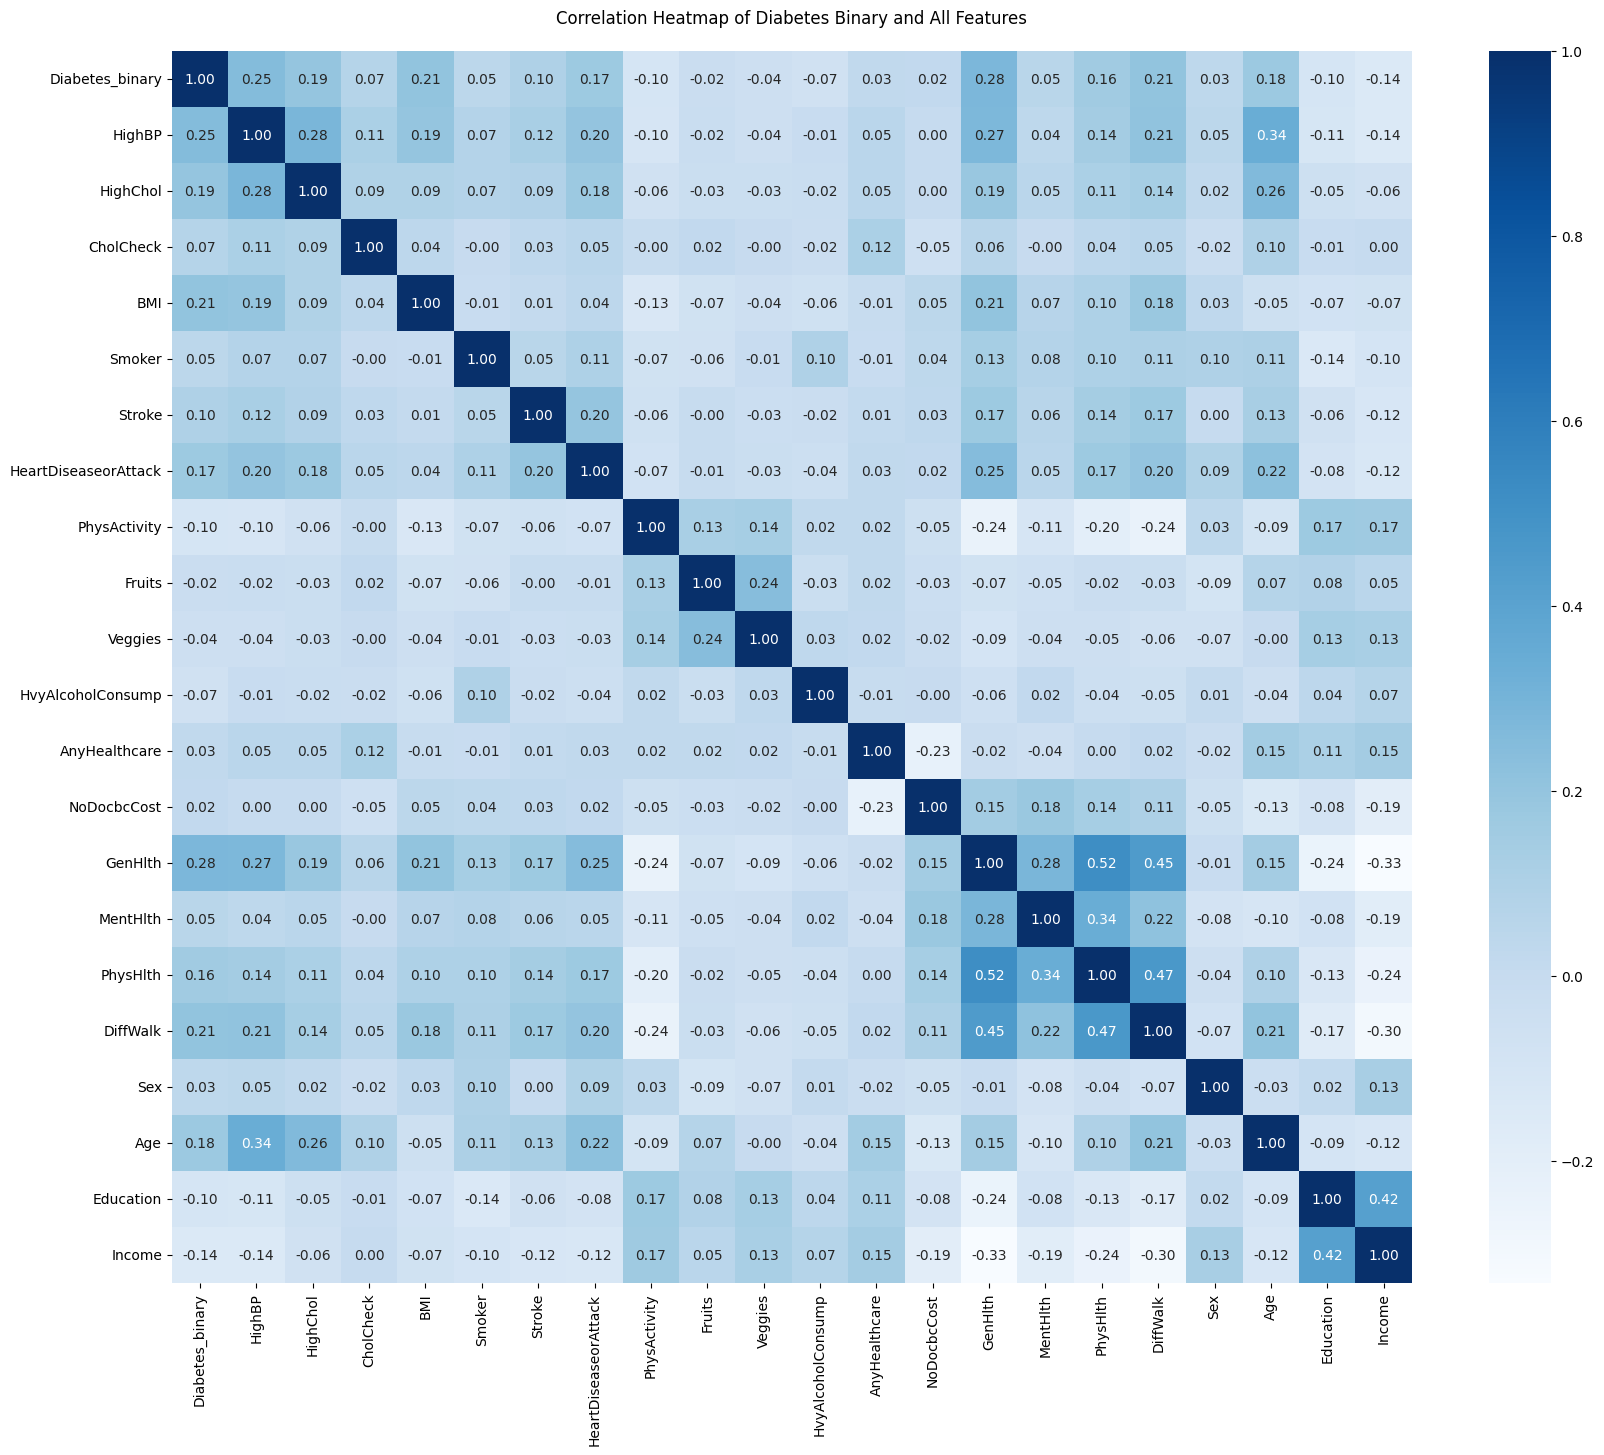

In [38]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_diabetes_binary.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap of Diabetes Binary and All Features', pad=20)
plt.show()

(-1.0, 1.0)

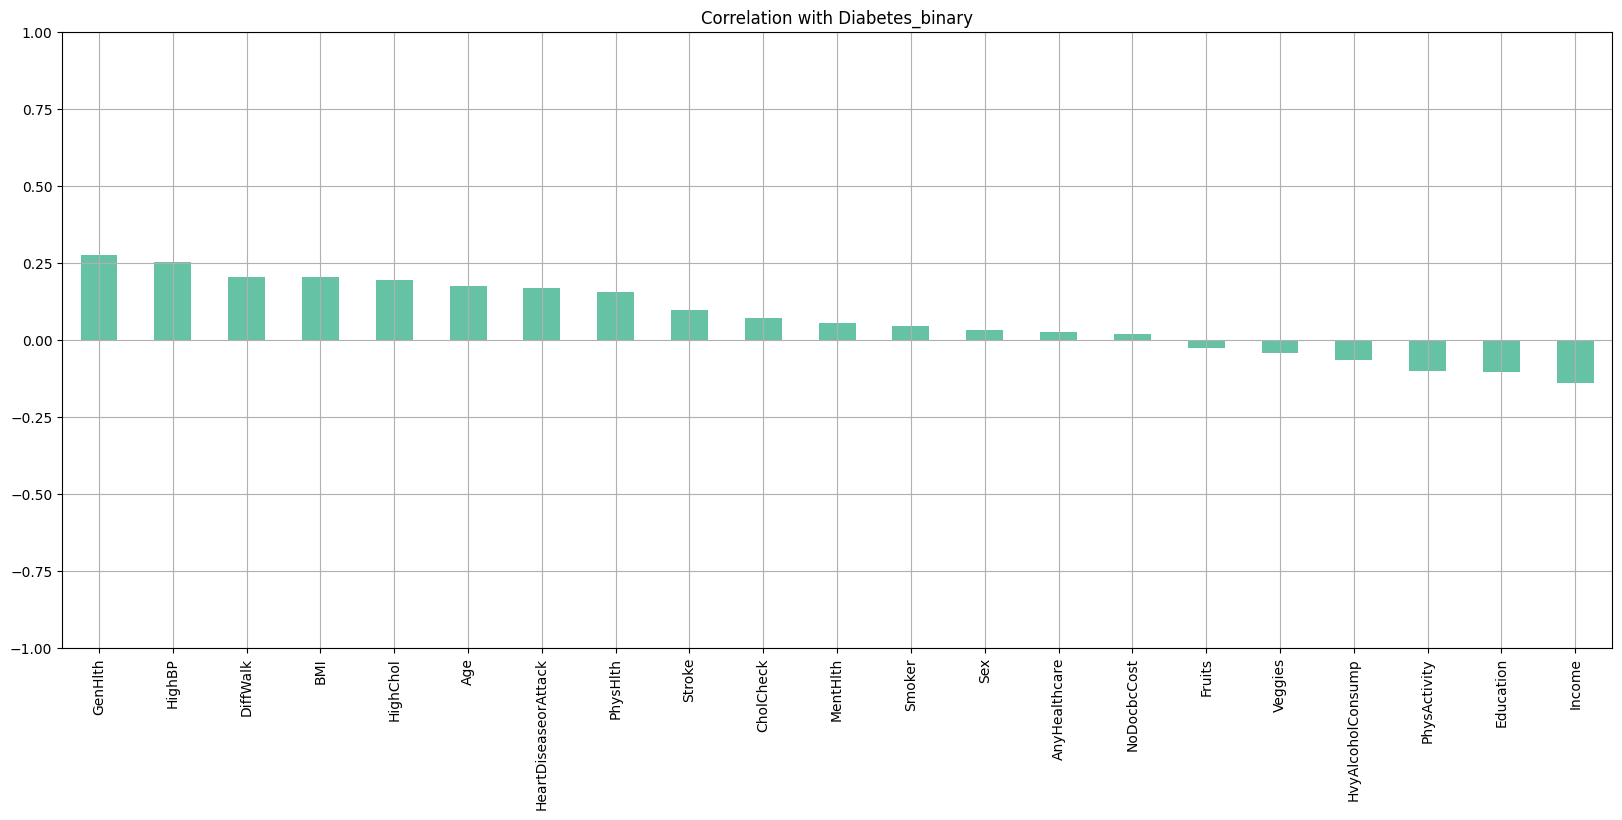

In [39]:
df_diabetes_binary.drop('Diabetes_binary', axis=1).corrwith(df_diabetes_binary.Diabetes_binary).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary")
plt.ylim(-1, 1)

### 3. add extra columns for further analysis

In [36]:
diab_mappping = {
    0 : 'no diabetes',
    1 : 'diabetes'
}

df_diabetes_binary['Diabetes_bin_cat'] = np.select([df_diabetes_binary['Diabetes_binary'] == key for key in diab_mappping], diab_mappping.values())

In [37]:
# 비만도 분류 작업 (CDC 기준)
obese_order_list = ['underweight', 'healthy', 'overweight', 'obese']

# 4개 카테고리로 분류 (str)
def cat_obesity(bmi) : 
    if bmi >= 30:
        return 'obese'
    elif bmi >= 25:
        return 'overweight'
    elif bmi >= 18.5 : 
        return 'healthy'
    else :
        return 'underweight'

# 4개 카테고리 -> int
def obese_cat_to_num(obesity):
    if obesity == 'obese':
        return 3
    elif obesity =='overweight':
        return 2
    elif obesity == 'healthy':
        return 1
    else :
        return 0

# binary category 1 : overweight&obese / healthy&underweight    
def obese_cat_to_bin(obesity):
    if obesity == 'obese':
        return 1
    elif obesity =='overweight':
        return 1
    elif obesity == 'healthy':
        return 0
    else :
        return 0

# binary category 2 : obese or not
def obese_or_not(obesity) :
    if obesity == 'obese':
        return 1
    else :
        return 0

In [38]:
df_diabetes_binary['Obesity_cat'] = df_diabetes_binary['BMI'].apply(cat_obesity)
df_diabetes_binary['Obesity_cat_num'] = df_diabetes_binary['Obesity_cat'].apply(obese_cat_to_num)
df_diabetes_binary['Obesity_cat_bin'] = df_diabetes_binary['Obesity_cat'].apply(obese_cat_to_bin)
df_diabetes_binary['Obese'] = df_diabetes_binary['Obesity_cat'].apply(obese_or_not)

### 4. barplots

<Axes: xlabel='Diabetes_binary', ylabel='HighBP'>

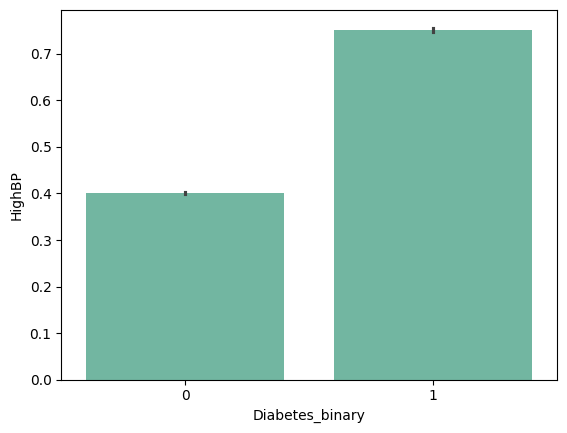

In [8]:
sns.barplot(data = df_diabetes_binary, y = 'HighBP', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='HighChol'>

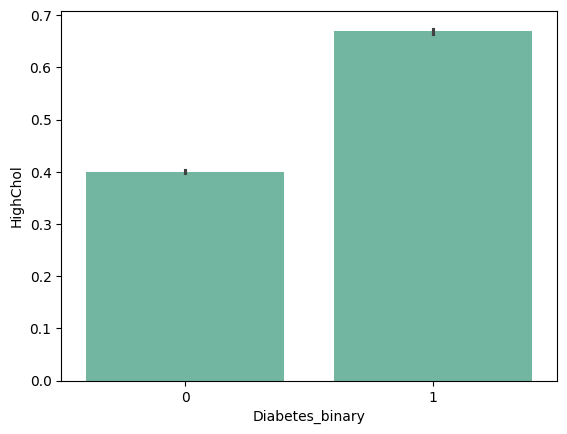

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'HighChol', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='CholCheck'>

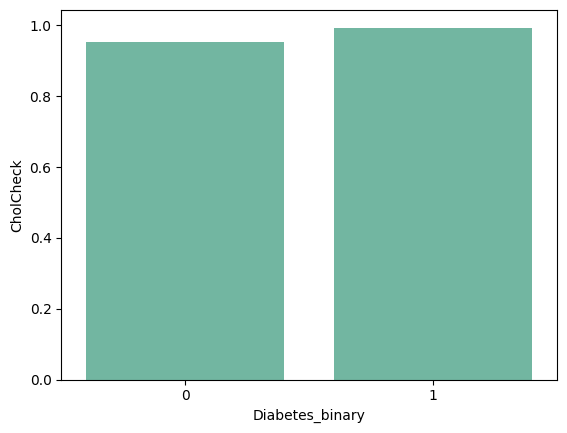

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'CholCheck', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='BMI'>

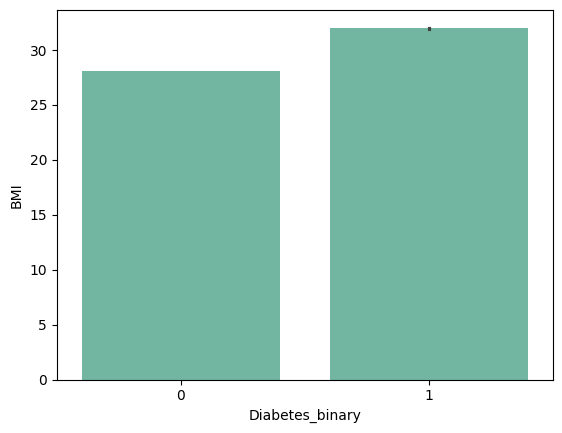

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'BMI', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='Smoker'>

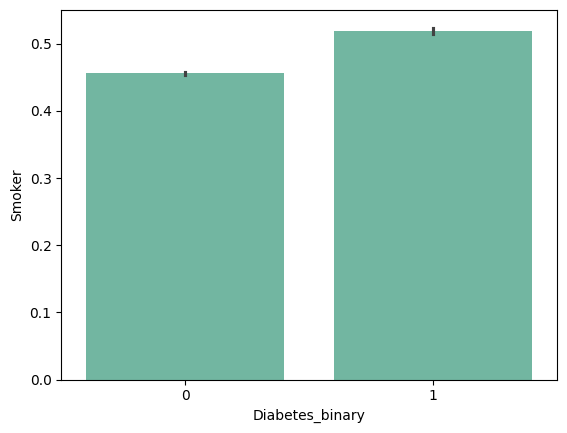

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'Smoker', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='Stroke'>

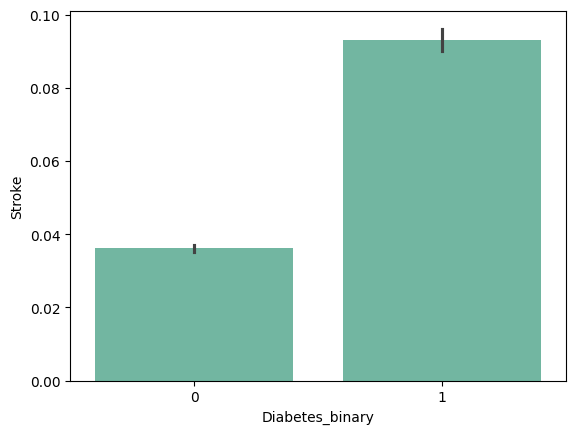

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'Stroke', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='HeartDiseaseorAttack'>

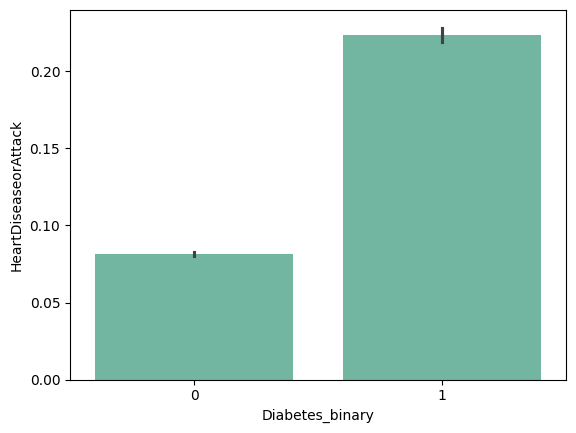

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'HeartDiseaseorAttack', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='PhysActivity'>

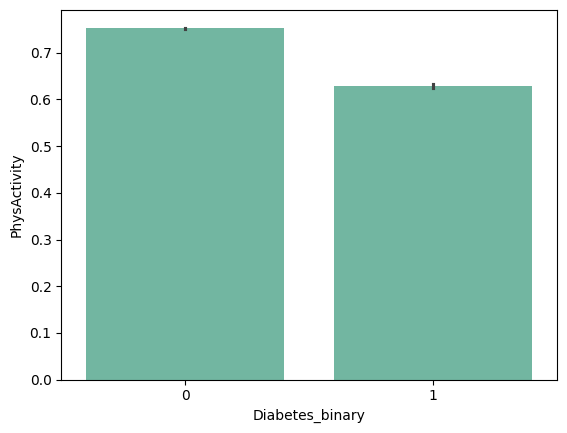

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'PhysActivity', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='Fruits'>

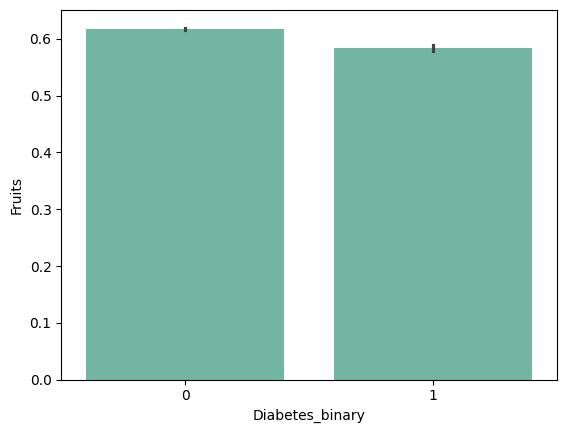

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'Fruits', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='Veggies'>

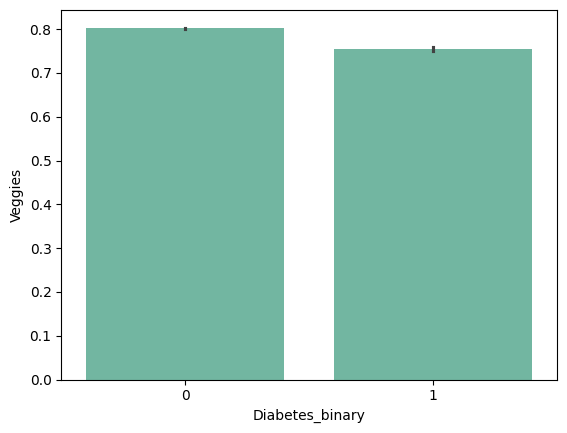

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'Veggies', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='HvyAlcoholConsump'>

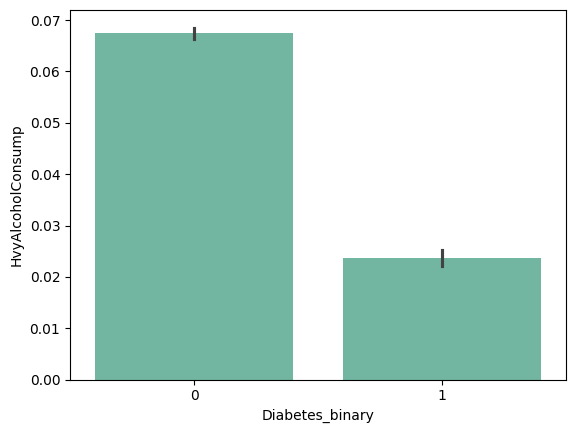

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'HvyAlcoholConsump', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='AnyHealthcare'>

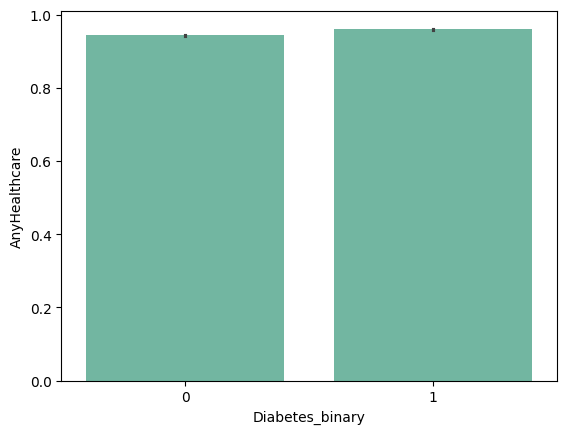

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'AnyHealthcare', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='NoDocbcCost'>

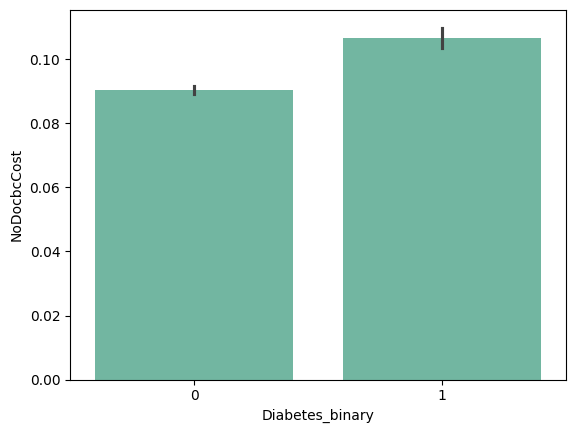

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'NoDocbcCost', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='GenHlth'>

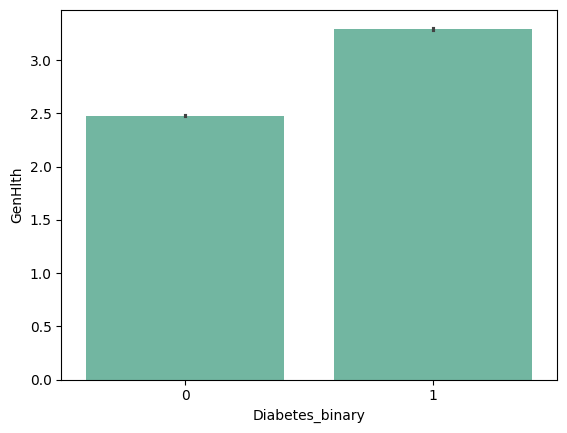

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'GenHlth', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='MentHlth'>

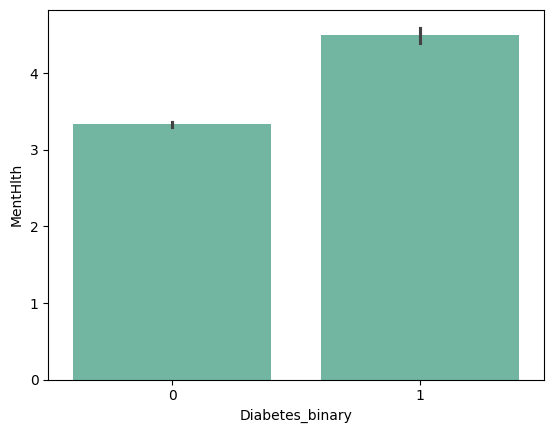

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'MentHlth', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='PhysHlth'>

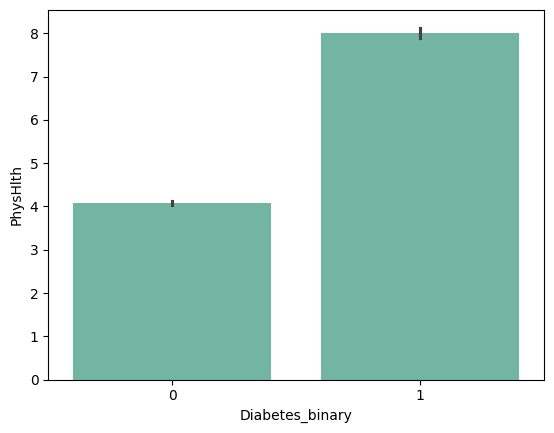

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'PhysHlth', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='DiffWalk'>

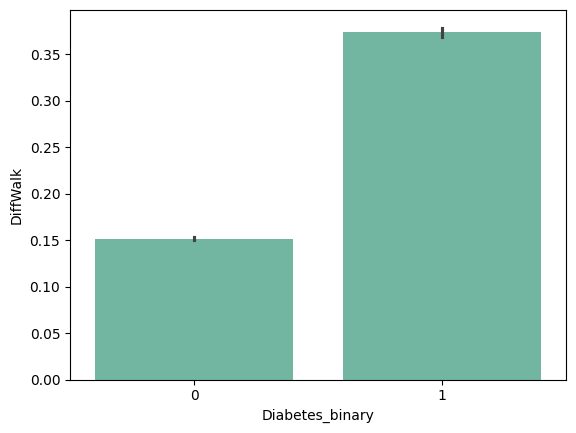

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'DiffWalk', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='Age'>

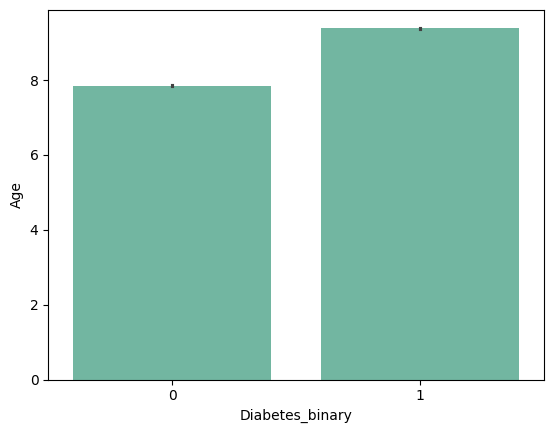

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'Age', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='Education'>

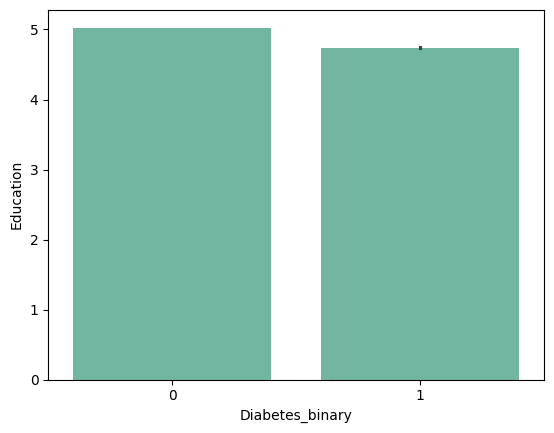

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'Education', x = 'Diabetes_binary')

<Axes: xlabel='Diabetes_binary', ylabel='Income'>

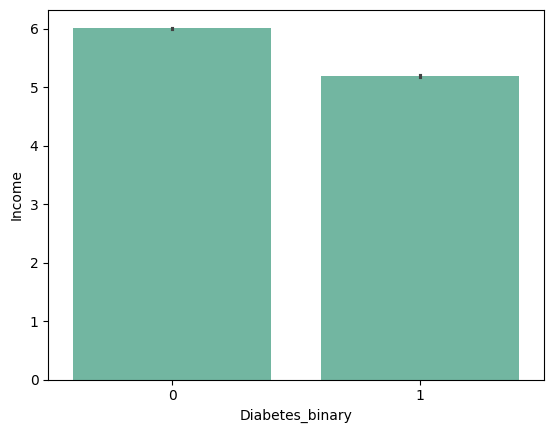

In [ ]:
sns.barplot(data = df_diabetes_binary, y = 'Income', x = 'Diabetes_binary')

C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\2486396984.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, y = var, ax=axes[row_index, col_index], x = 'Diabetes_bin_cat', palette='Set2')
C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\2486396984.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, y = var, ax=axes[row_index, col_index], x = 'Diabetes_bin_cat', palette='Set2')
C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\2486396984.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, y = var, ax=

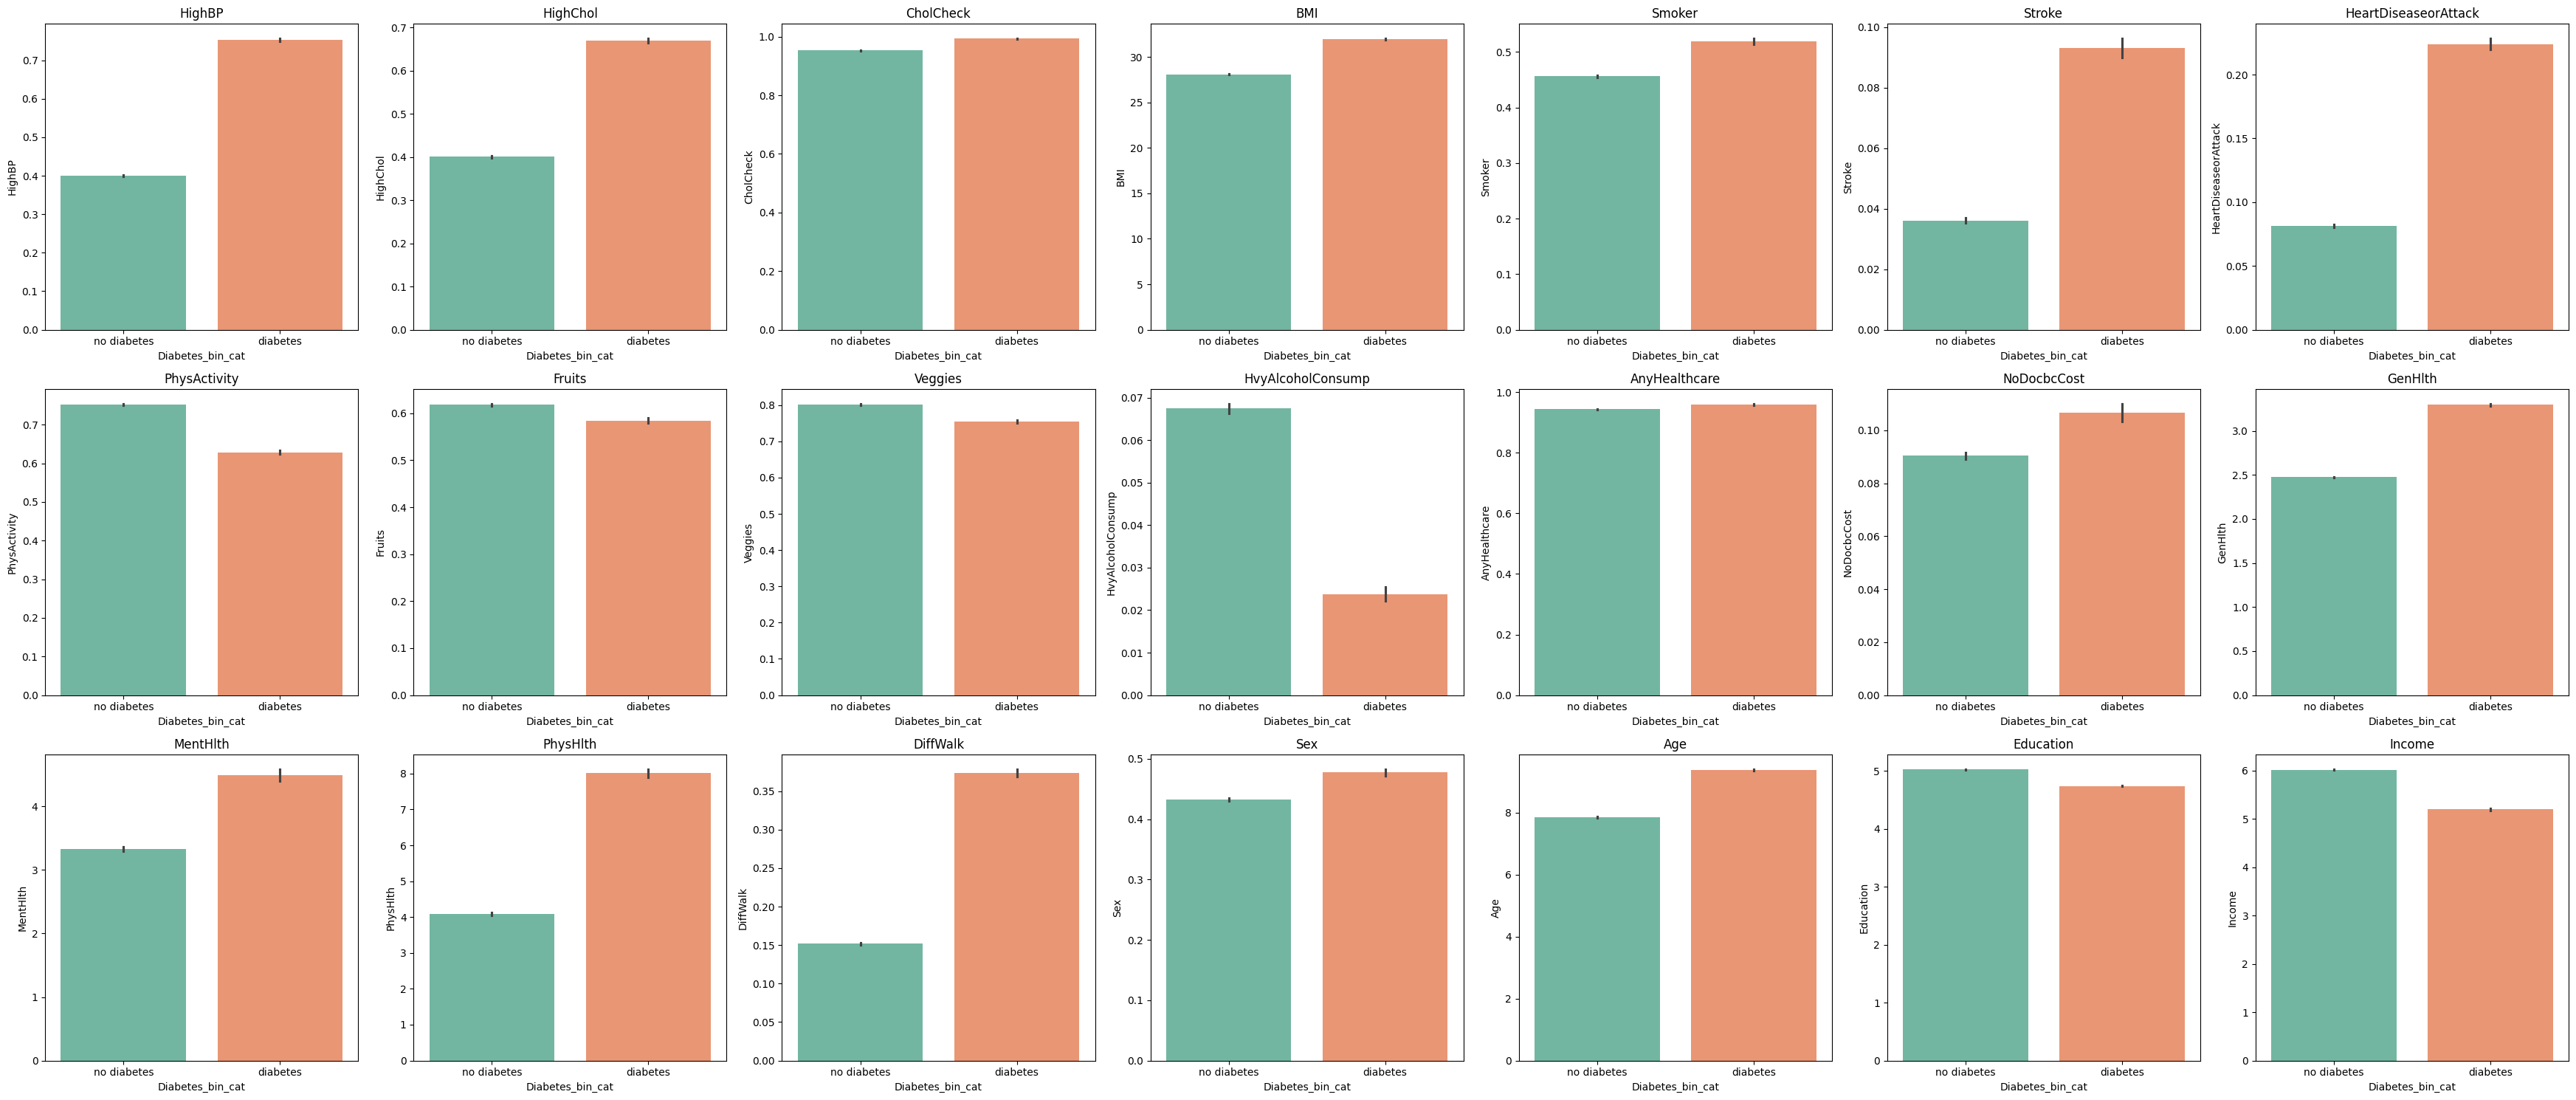

In [93]:
# code from 재민님
def barplots_all(data, n_rows, n_cols):
    vars = data.drop(columns=['Diabetes_binary', 'Diabetes_bin_cat'])
    vars = vars.columns.tolist()
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (5*n_cols,5*n_rows))
        
    for i, var in enumerate(vars):
        row_index = i // n_cols
        col_index = i % n_cols
        
        sns.barplot(data=data, y = var, ax=axes[row_index, col_index], x = 'Diabetes_bin_cat', palette='Set2')
        axes[row_index, col_index].set_title(var)
        
    plt.tight_layout()
    plt.show()

n_rows = 3
n_cols = 7
    
original_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_bin_cat']

barplots_all(data=df_diabetes_binary[original_vars], n_rows=n_rows, n_cols=n_cols)

### 5. histplot / countplot

#### histplot - BMI

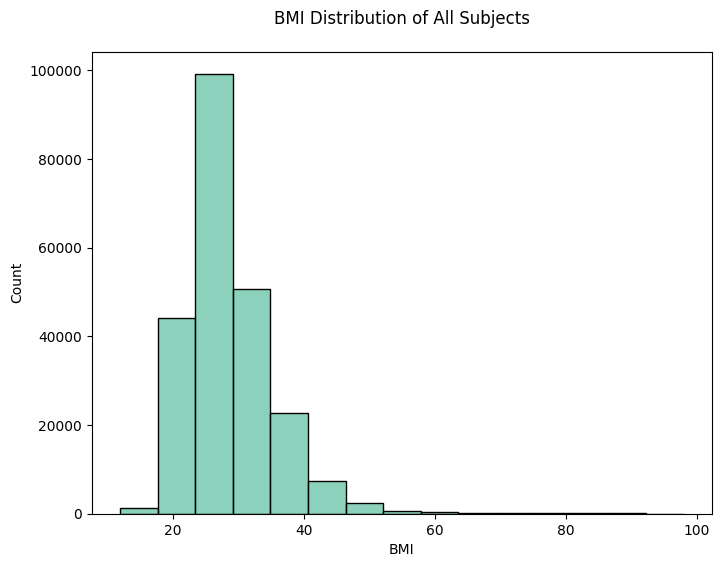

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_diabetes_binary, x='BMI', bins=15)
plt.title('BMI Distribution of All Subjects', pad=20)
plt.show()

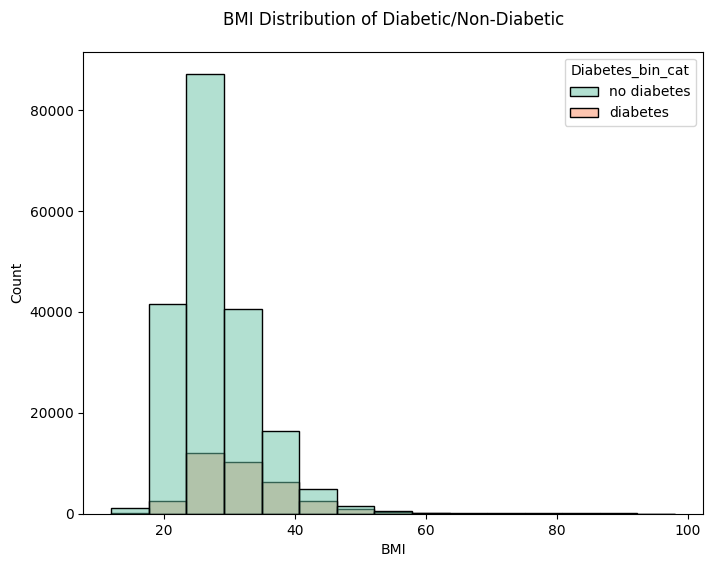

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_diabetes_binary, x='BMI', bins=15, hue='Diabetes_bin_cat')
plt.title('BMI Distribution of Diabetic/Non-Diabetic', pad=20)
plt.show()

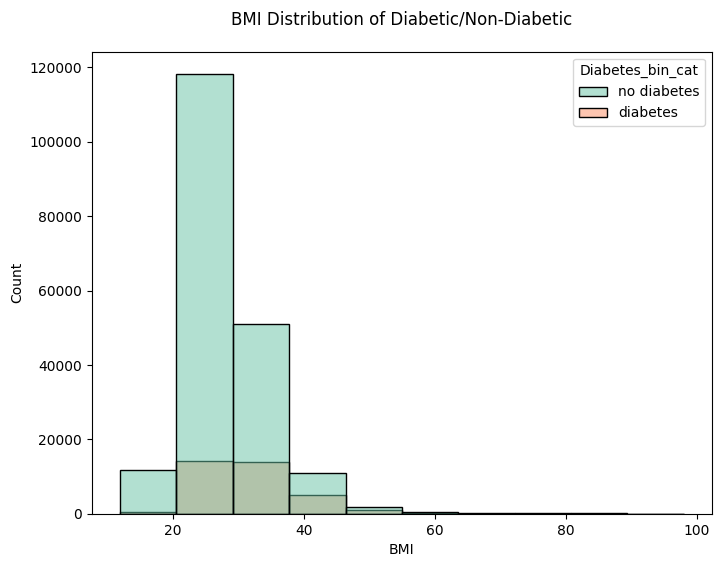

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_diabetes_binary, x='BMI', bins=10, hue='Diabetes_bin_cat')
plt.title('BMI Distribution of Diabetic/Non-Diabetic', pad=20)
plt.show()

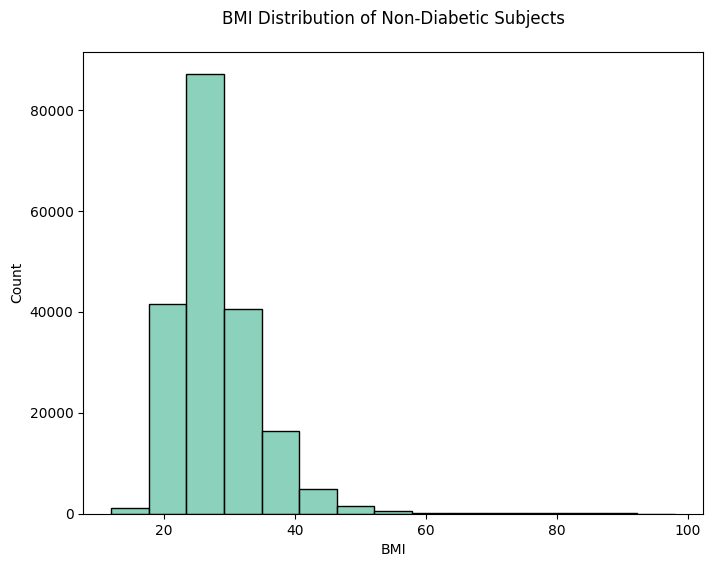

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='BMI', bins=15)
plt.title('BMI Distribution of Non-Diabetic Subjects', pad=20)
plt.show()

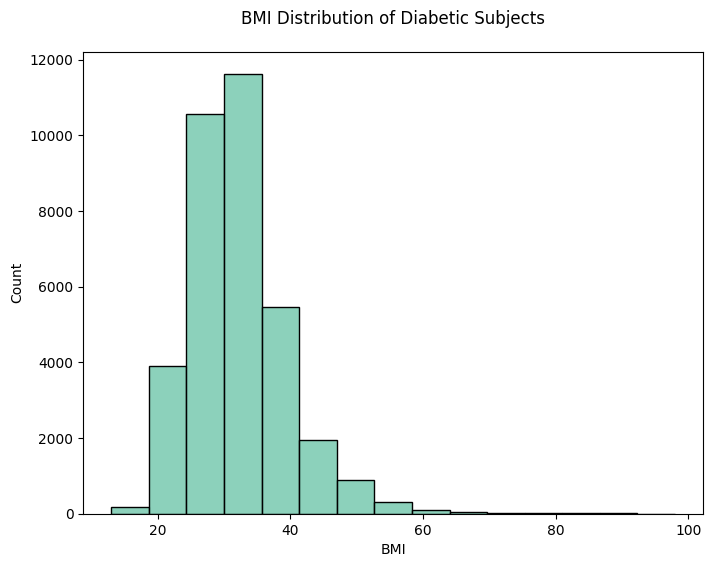

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='BMI', bins=15)
plt.title('BMI Distribution of Diabetic Subjects', pad=20)
plt.show()

#### countplot - Mental Health

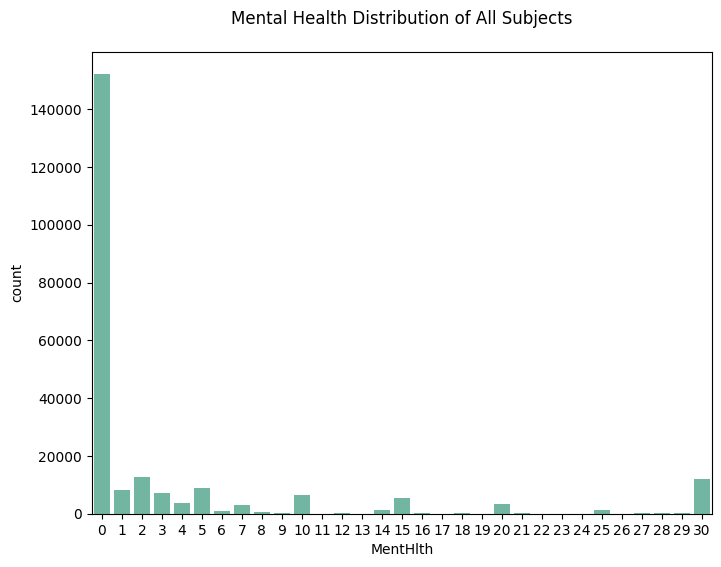

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary, x='MentHlth')
plt.title('Mental Health Distribution of All Subjects', pad=20)
plt.show()

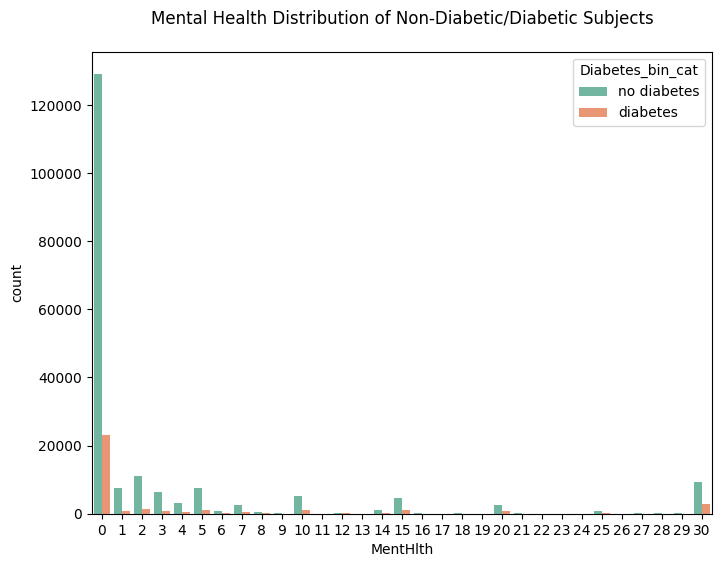

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary, x='MentHlth', hue='Diabetes_bin_cat')
plt.title('Mental Health Distribution of Non-Diabetic/Diabetic Subjects', pad=20)
plt.show()

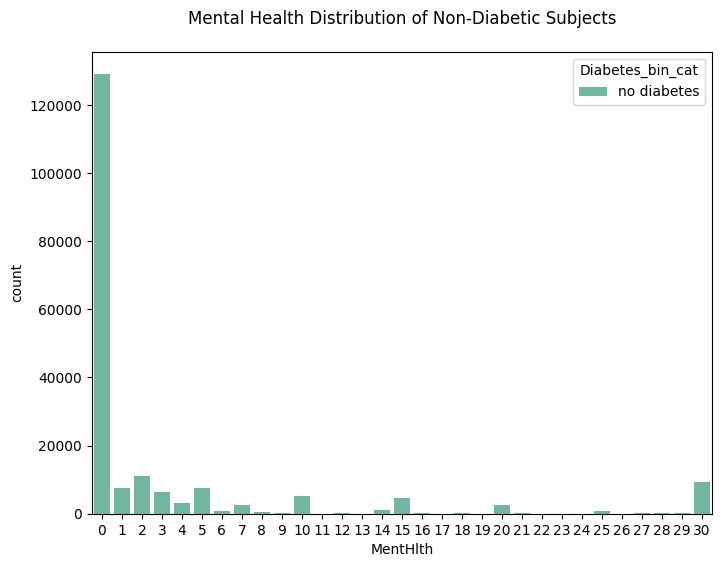

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='MentHlth', hue='Diabetes_bin_cat')
plt.title('Mental Health Distribution of Non-Diabetic Subjects', pad=20)
plt.show()

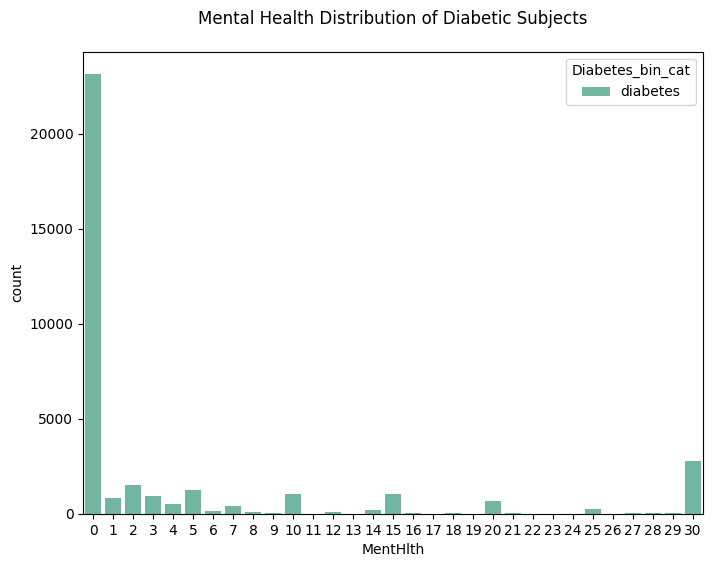

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='MentHlth', hue='Diabetes_bin_cat')
plt.title('Mental Health Distribution of Diabetic Subjects', pad=20)
plt.show()

#### countplot - Physical Health

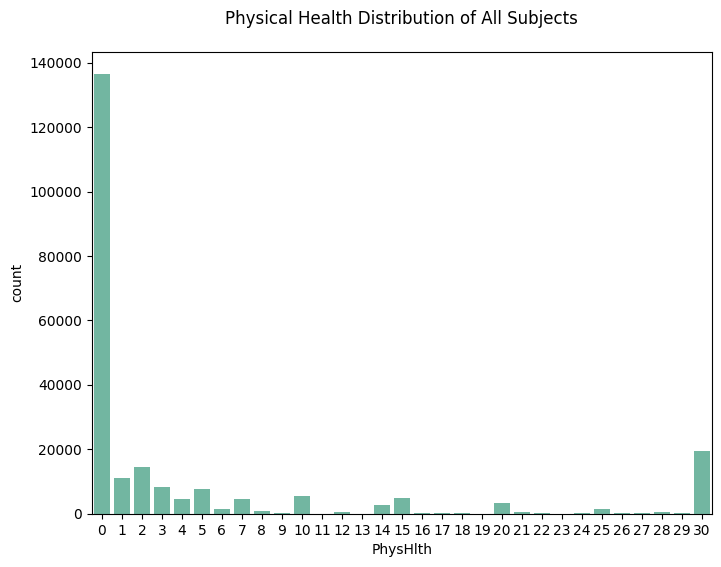

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary, x='PhysHlth')
plt.title('Physical Health Distribution of All Subjects', pad=20)
plt.show()

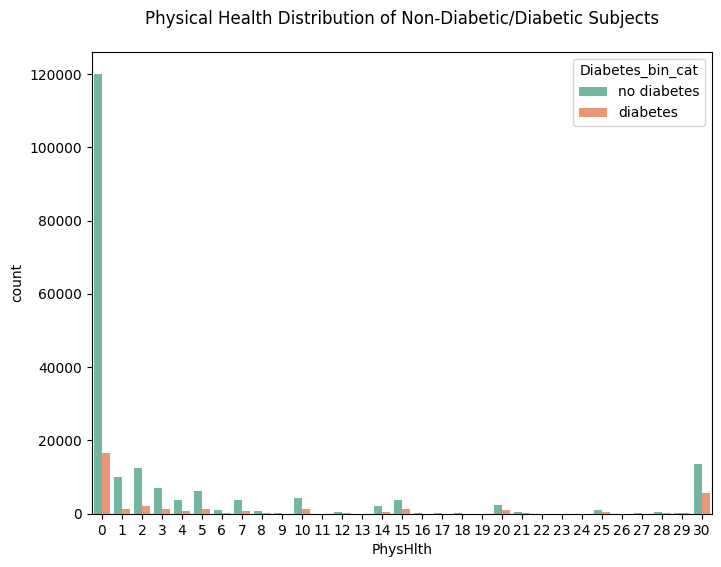

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary, x='PhysHlth', hue='Diabetes_bin_cat')
plt.title('Physical Health Distribution of Non-Diabetic/Diabetic Subjects', pad=20)
plt.show()

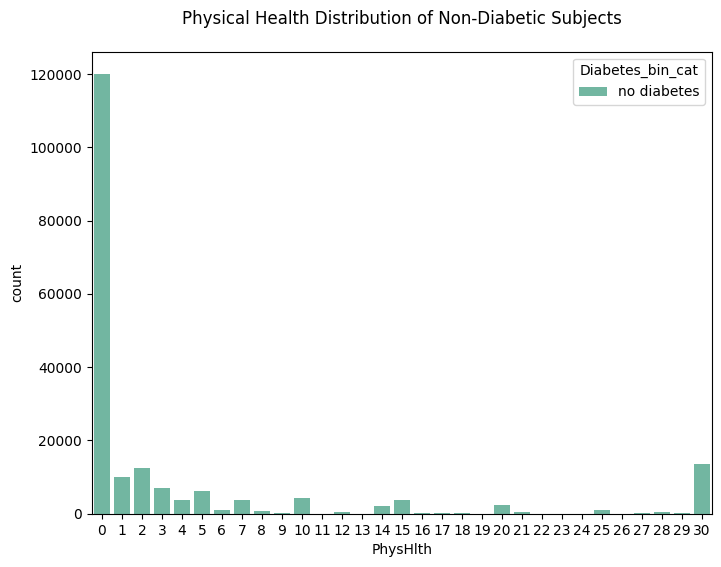

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='PhysHlth', hue='Diabetes_bin_cat')
plt.title('Physical Health Distribution of Non-Diabetic Subjects', pad=20)
plt.show()

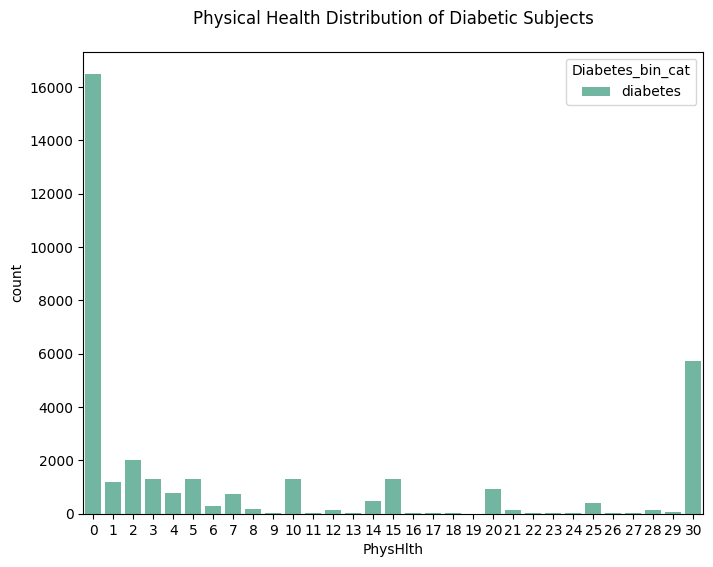

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='PhysHlth', hue='Diabetes_bin_cat')
plt.title('Physical Health Distribution of Diabetic Subjects', pad=20)
plt.show()

#### countplot - General Health

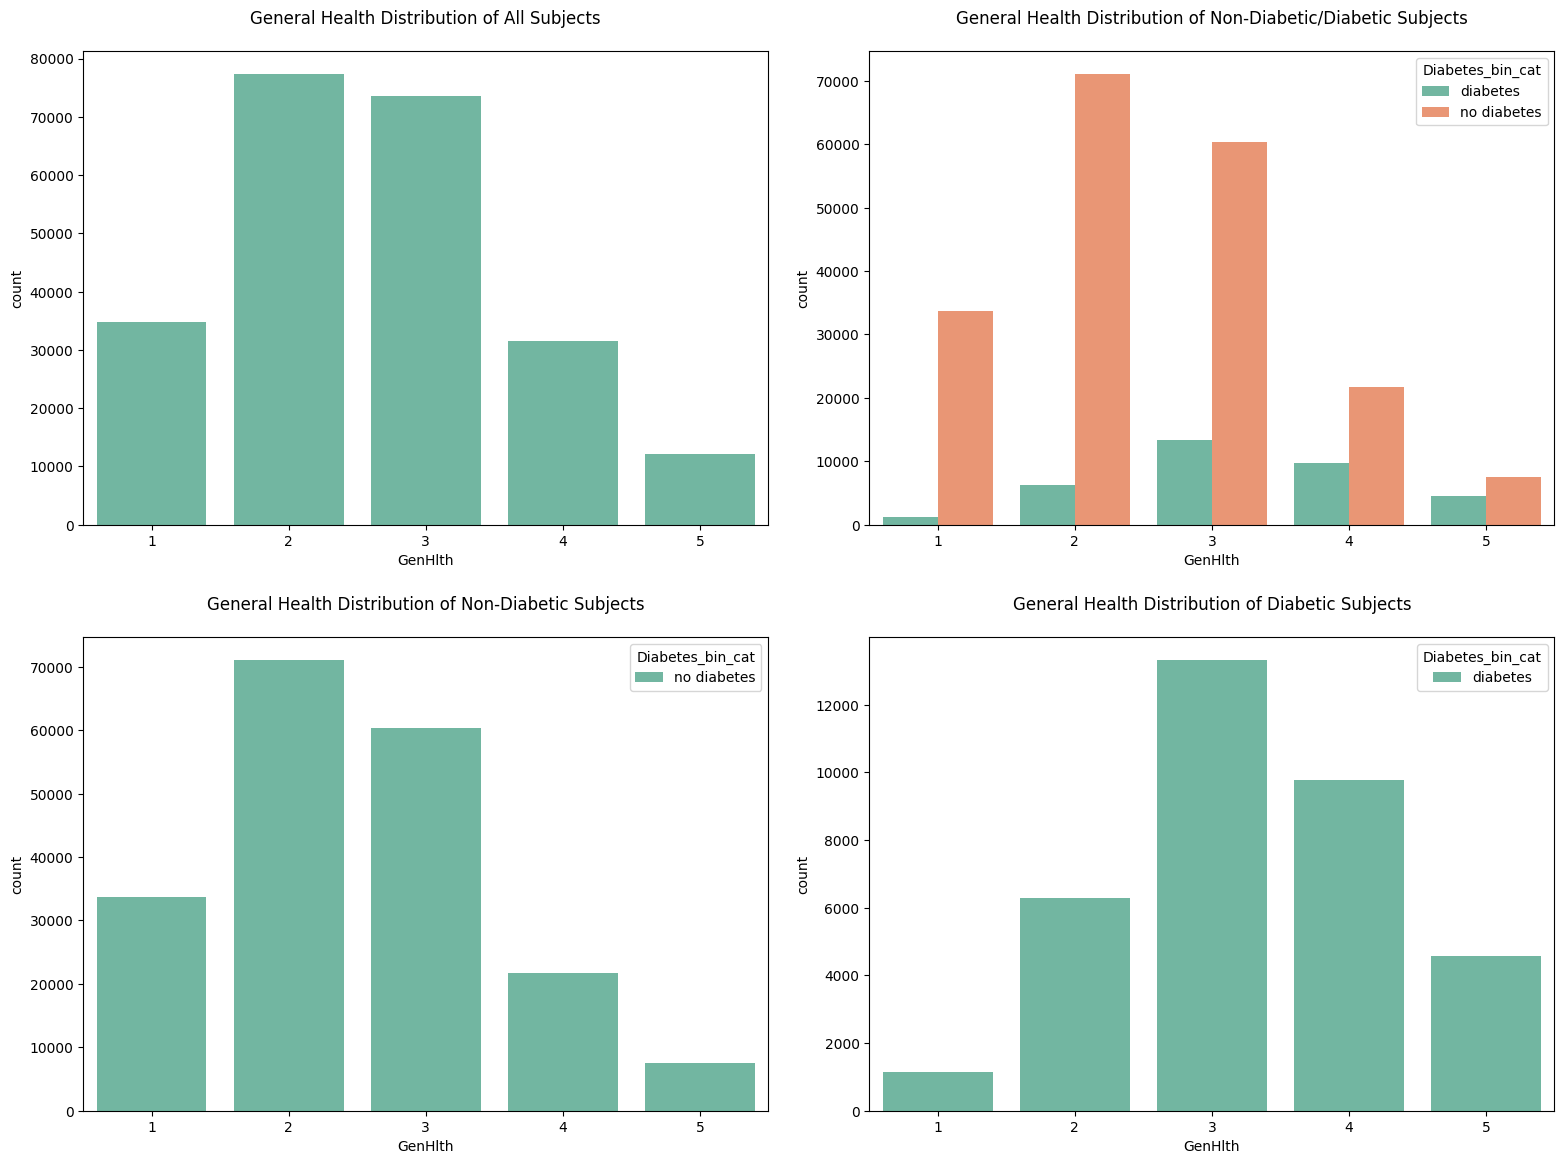

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df_diabetes_binary, x='GenHlth', ax=axes[0, 0])
axes[0, 0].set_title('General Health Distribution of All Subjects', pad=20)

sns.countplot(data=df_diabetes_binary, x='GenHlth', hue='Diabetes_bin_cat', ax=axes[0, 1])
axes[0, 1].set_title('General Health Distribution of Non-Diabetic/Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='GenHlth', hue='Diabetes_bin_cat', ax=axes[1, 0])
axes[1, 0].set_title('General Health Distribution of Non-Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='GenHlth', hue='Diabetes_bin_cat', ax=axes[1, 1])
axes[1, 1].set_title('General Health Distribution of Diabetic Subjects', pad=20)

plt.tight_layout(pad=2.0)
plt.show()

# In the plt.tight_layout(pad=3.0) code, the pad parameter represents the padding between subplots, and its unit is fraction of the font size. The value 3.0 is a relative measure, indicating three times the height of the font size.

#### countplot - Age

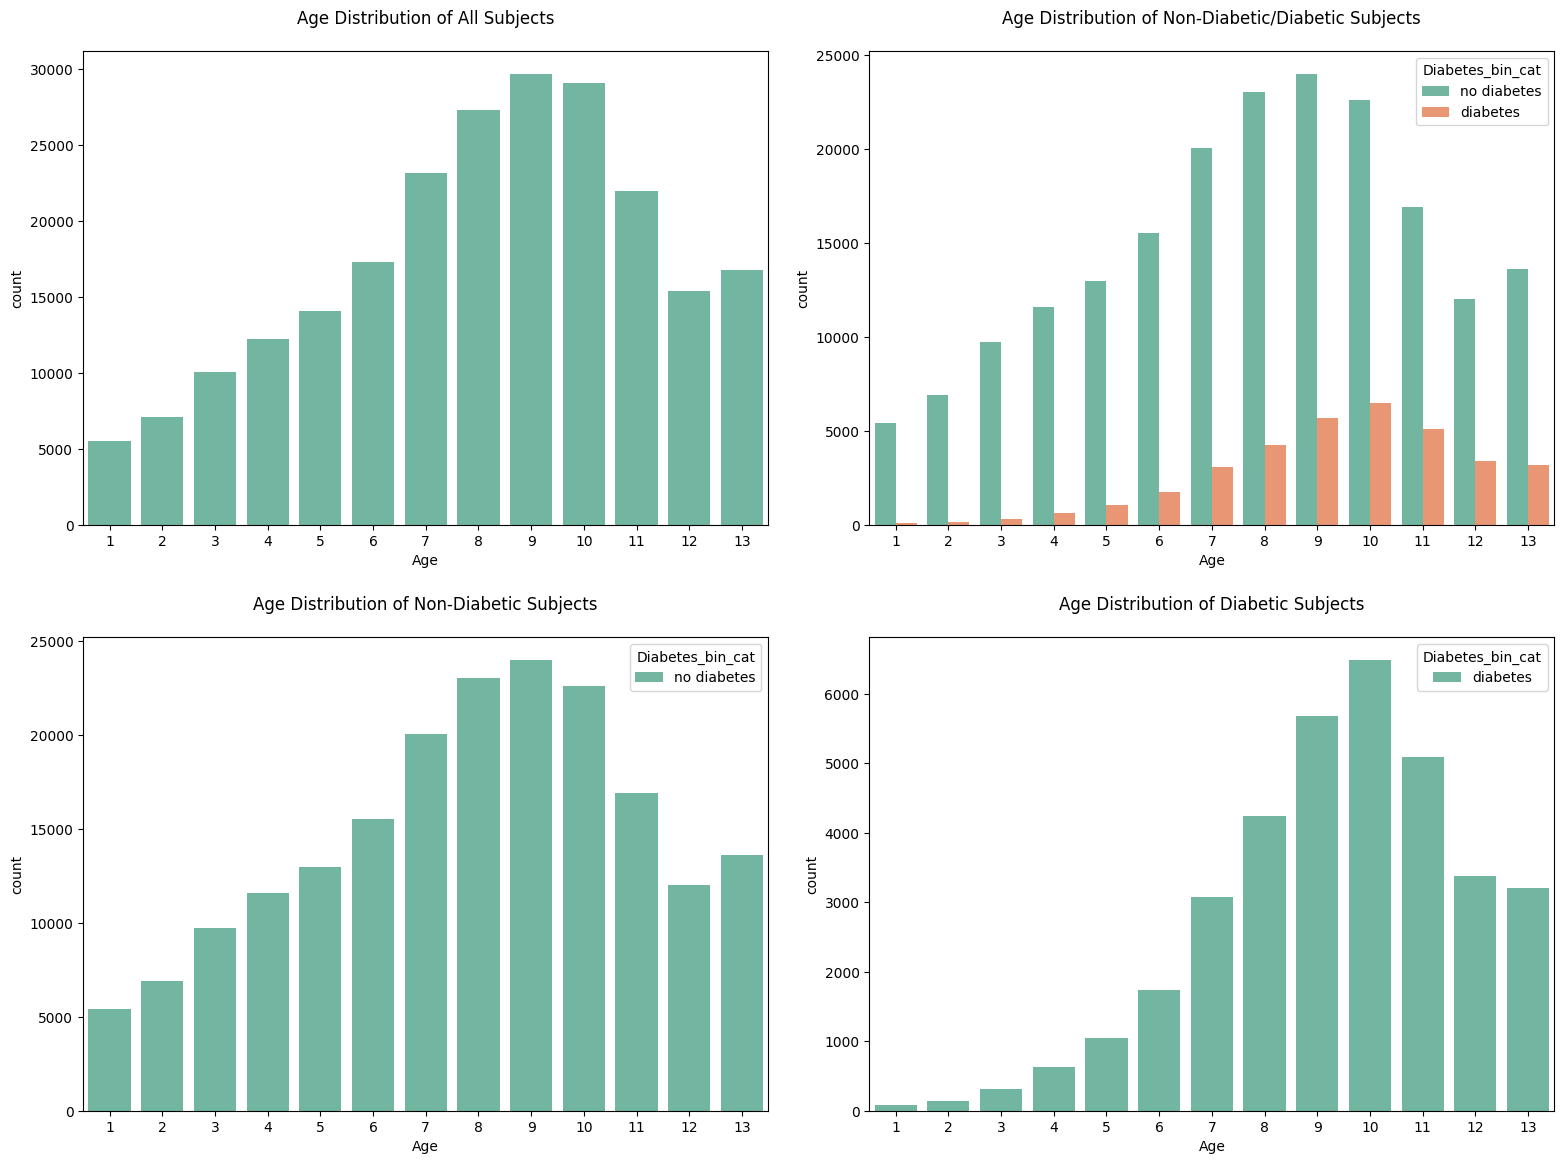

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df_diabetes_binary, x='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution of All Subjects', pad=20)

sns.countplot(data=df_diabetes_binary, x='Age', hue='Diabetes_bin_cat', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Age Distribution of Non-Diabetic/Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='Age', hue='Diabetes_bin_cat', ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution of Non-Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='Age', hue='Diabetes_bin_cat', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution of Diabetic Subjects', pad=20)

plt.tight_layout(pad=2.0)
plt.show()

#### countplot - Education

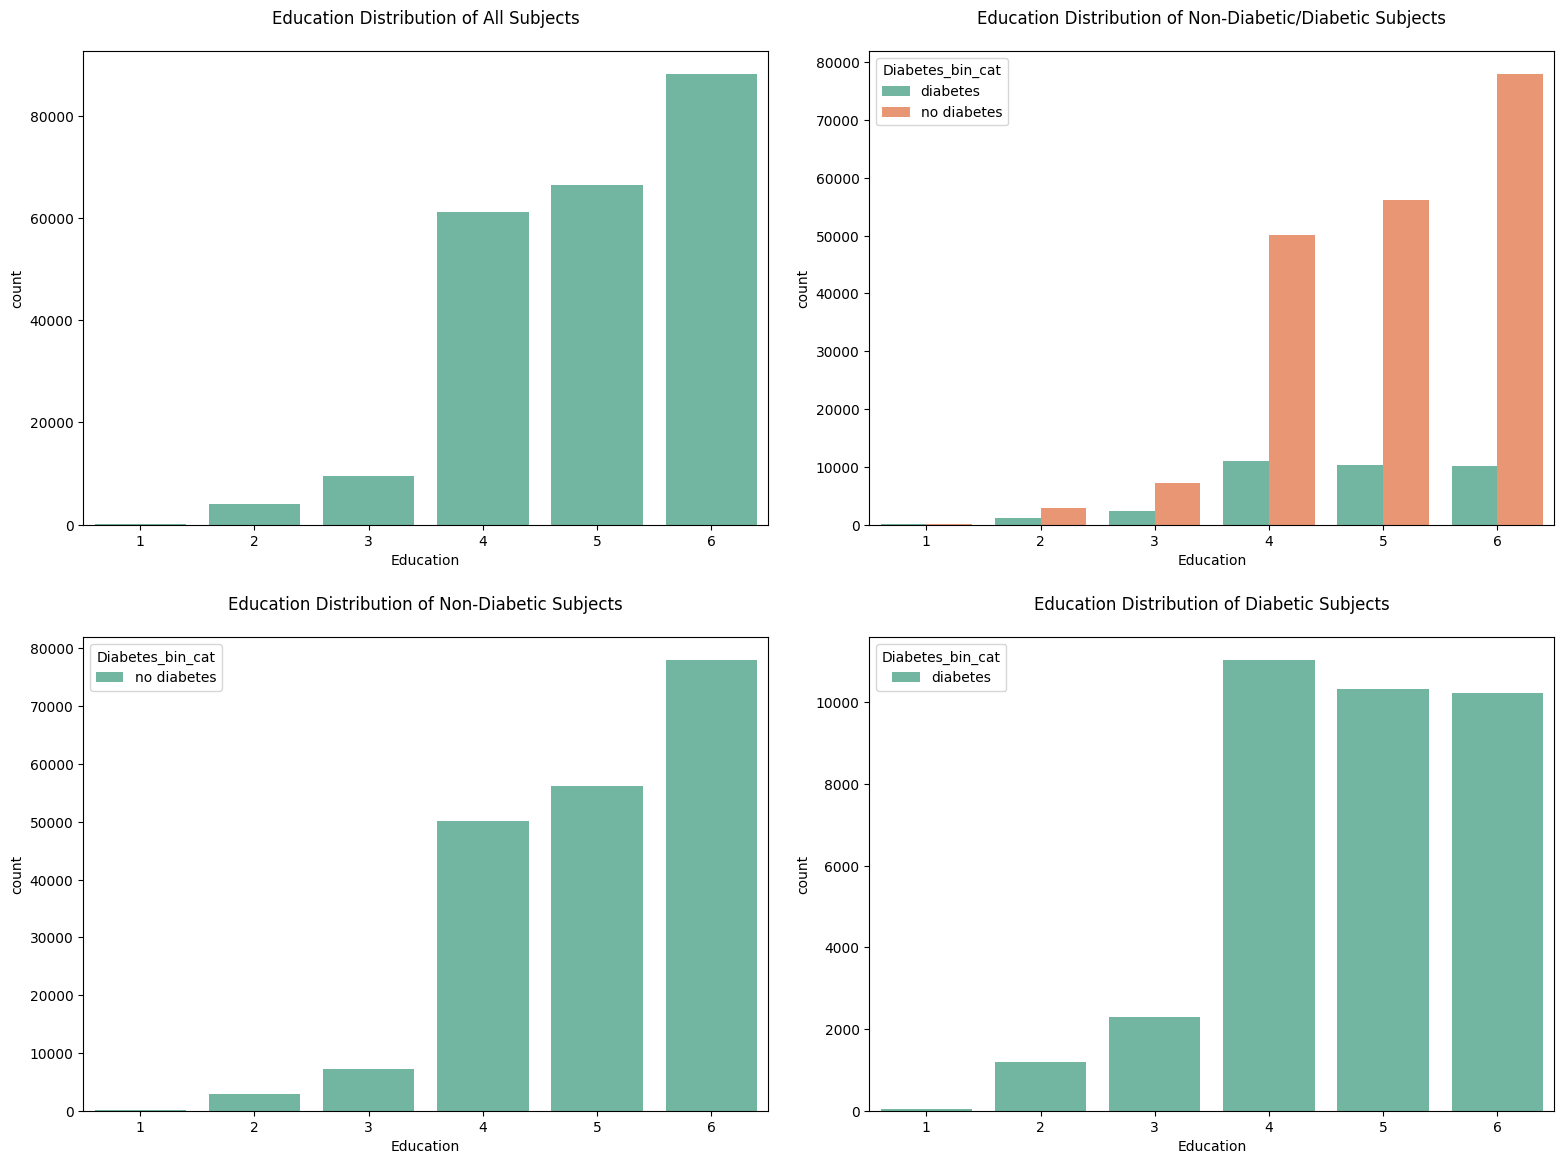

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df_diabetes_binary, x='Education', ax=axes[0, 0])
axes[0, 0].set_title('Education Distribution of All Subjects', pad=20)

sns.countplot(data=df_diabetes_binary, x='Education', hue='Diabetes_bin_cat', ax=axes[0, 1])
axes[0, 1].set_title('Education Distribution of Non-Diabetic/Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='Education', hue='Diabetes_bin_cat', ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution of Non-Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='Education', hue='Diabetes_bin_cat', ax=axes[1, 1])
axes[1, 1].set_title('Education Distribution of Diabetic Subjects', pad=20)

plt.tight_layout(pad=2.0)
plt.show()

#### countplot - Income

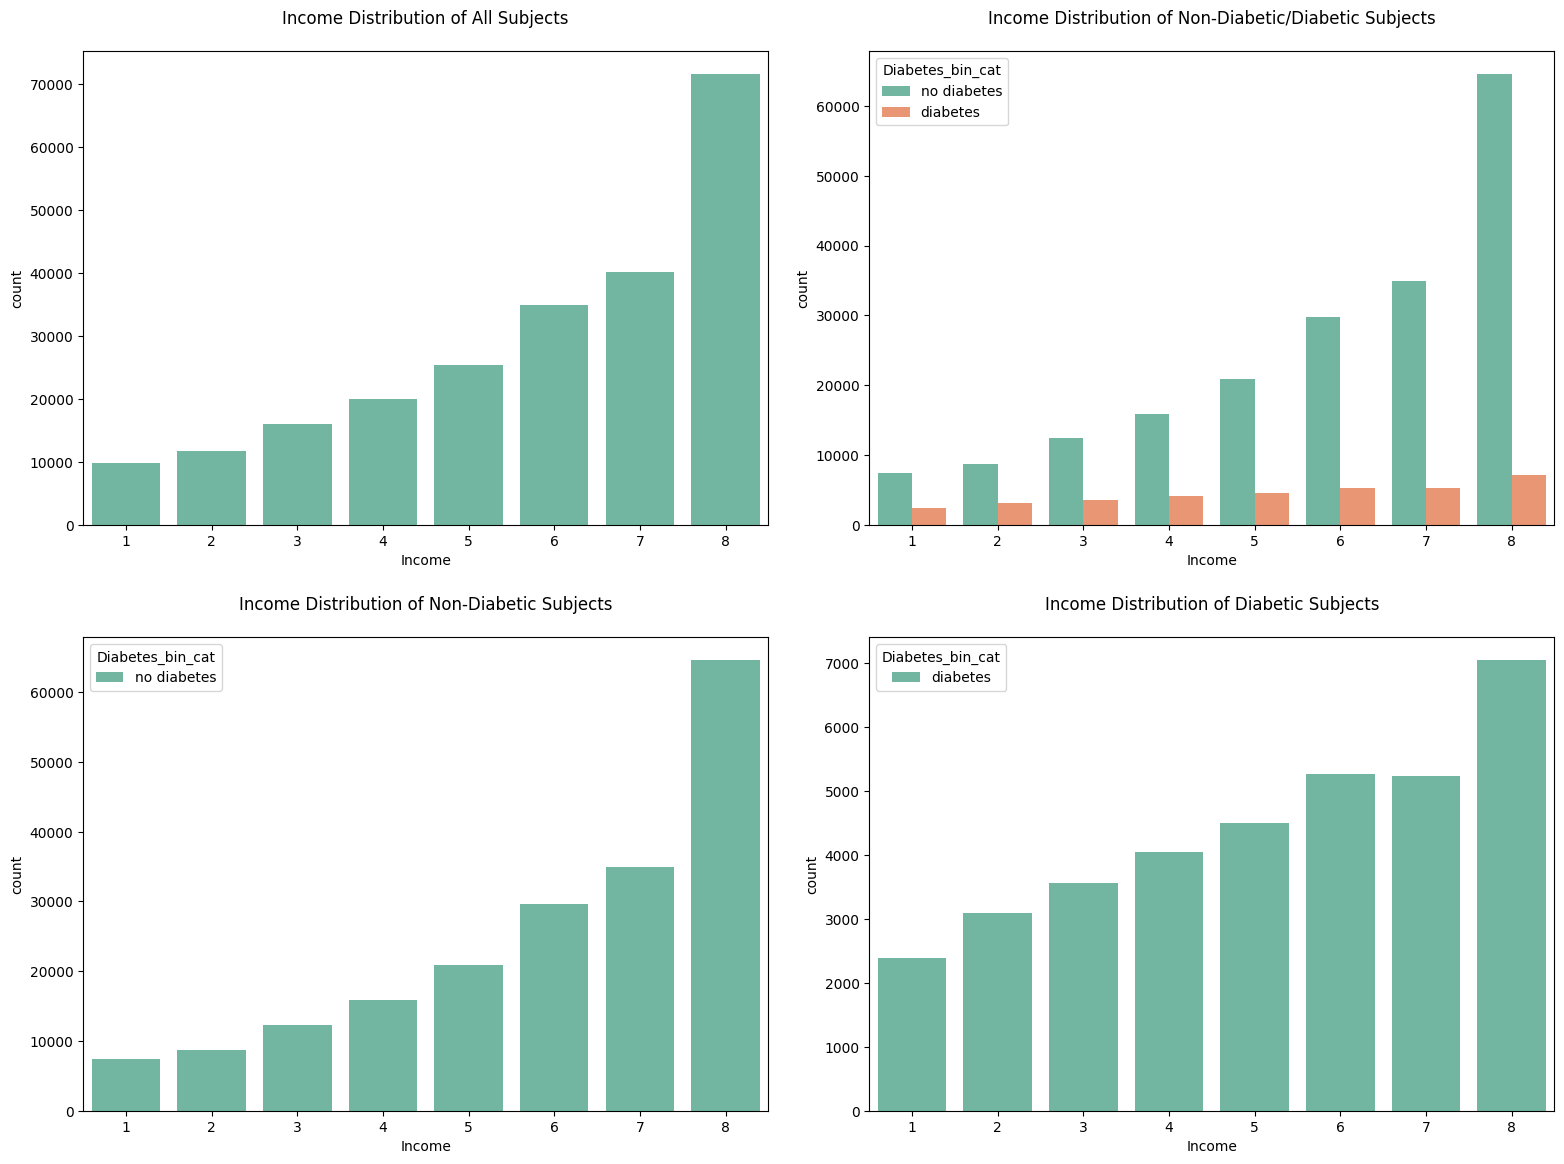

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df_diabetes_binary, x='Income', ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution of All Subjects', pad=20)

sns.countplot(data=df_diabetes_binary, x='Income', hue='Diabetes_bin_cat', ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution of Non-Diabetic/Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='Income', hue='Diabetes_bin_cat', ax=axes[1, 0])
axes[1, 0].set_title('Income Distribution of Non-Diabetic Subjects', pad=20)

sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='Income', hue='Diabetes_bin_cat', ax=axes[1, 1])
axes[1, 1].set_title('Income Distribution of Diabetic Subjects', pad=20)

plt.tight_layout(pad=2.0)
plt.show()

### 6. 기본 통계 검정 (t-test and chi-squared)

In [19]:
from scipy.stats import chi2_contingency, ttest_ind

#### ttest

In [23]:
ttest_results = []

for column in pt_all.columns:
    group0 = df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0][column]
    group1 = df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1][column]
    
    t_stat, p_value = ttest_ind(group0, group1)
    ttest_results.append({
        'Variable' : column,
        'T_stat' : t_stat,
        'P-value' : f'{p_value:.8f}'
    })
    

ttest_results_df = pd.DataFrame(ttest_results)
ttest_results_df

Variable      T_stat     P-value
0                    Age  -86.281277  0.00000000
1          AnyHealthcare  -12.138425  0.00000000
2                    BMI -100.376417  0.00000000
3              CholCheck  -34.832771  0.00000000
4               DiffWalk -100.486899  0.00000000
5              Education   49.451399  0.00000000
6                 Fruits   11.886216  0.00000000
7                GenHlth -138.063162  0.00000000
8   HeartDiseaseorAttack  -81.744358  0.00000000
9                 HighBP -125.968320  0.00000000
10              HighChol  -95.211225  0.00000000
11     HvyAlcoholConsump   31.661121  0.00000000
12                Income   68.056698  0.00000000
13              MentHlth  -25.979005  0.00000000
14           NoDocbcCost   -9.605703  0.00000000
15                 Obese  -91.419343  0.00000000
16       Obesity_cat_bin  -71.174882  0.00000000
17       Obesity_cat_num  -94.922768  0.00000000
18          PhysActivity   48.341206  0.00000000
19              PhysHlth  -75.760091  0.00000000
20                   Sex  -15.684333  0.00000000
21                Smoker  -21.820486  0.00000000
22                Stroke  -47.752304  0.00000000
23               Veggies   20.009256  0.00000000

#### chi-squared

In [24]:
chi_squred_results = []
# categorical
# dep : 'Diabetes_binary'
# indep : 'GenHlth', 'Age', 'Education', 'Income', 'BMI',  'MentHlth', 'PhysHlth'


for column in df_diabetes_binary[['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']]:
    contingency_table = pd.crosstab(df_diabetes_binary[column], df_diabetes_binary['Diabetes_binary'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_squred_results.append({
        'Variable' : column,
        'Chi-squared' : chi2,
        'P-value' : f'{p:.8f}'
    })
    
chi2_results_df = pd.DataFrame(chi_squred_results)
chi2_results_df

Variable   Chi-squared     P-value
0        Age   8207.831590  0.00000000
1        BMI  12022.379031  0.00000000
2    GenHlth  18193.703885  0.00000000
3   MentHlth   1121.485733  0.00000000
4   PhysHlth   6010.906025  0.00000000
5  Education   2508.405362  0.00000000
6     Income   4637.195742  0.00000000

#### logistic regression for individual variables

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [26]:
# binary
# dep : 'Diabetes_binary'
# indep : 'HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Sex'

indep_vars = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Sex']
X = df_diabetes_binary[indep_vars]
y = df_diabetes_binary['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg_model = LogisticRegression()

test_results = []


In [27]:
for column in X.columns:
    logreg_model.fit(X_train[[column]], y_train)
    y_pred_temp = logreg_model.predict(X_test[[column]])
    
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    f1_temp = f1_score(y_test, y_pred_temp)
    
    test_results.append({
        'Variable' : column,
        'Accuracy' : f'{accuracy_temp:.4f}',
        'F1_Score' : f'{f1_temp}'
    })


test_results_df = pd.DataFrame(test_results)
test_results_df

Variable Accuracy F1_Score
0                 HighBP   0.8457      0.0
1               HighChol   0.8457      0.0
2                 Smoker   0.8457      0.0
3                 Stroke   0.8457      0.0
4   HeartDiseaseorAttack   0.8457      0.0
5           PhysActivity   0.8457      0.0
6                 Fruits   0.8457      0.0
7                Veggies   0.8457      0.0
8      HvyAlcoholConsump   0.8457      0.0
9               DiffWalk   0.8457      0.0
10                   Sex   0.8457      0.0

- 결론 : class imbalance 문제로 로지스틱회귀는 binary 5050 로 진행하기로 결정

## 3. EDA (further)

### 1. mental health와 physical health

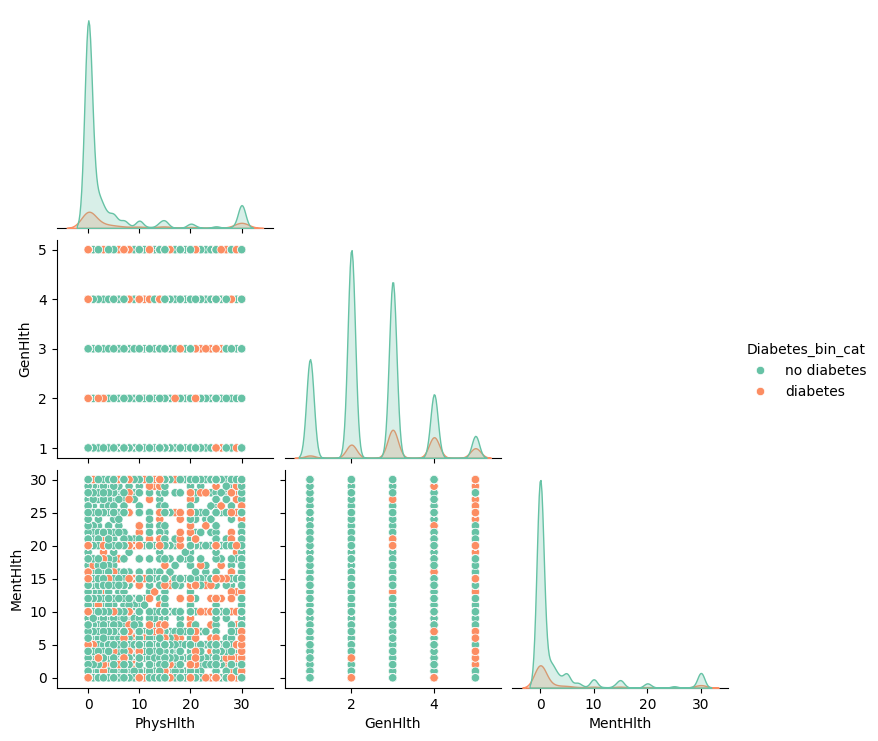

In [ ]:
sns.pairplot(data=df_diabetes_binary[['Diabetes_bin_cat', 'PhysHlth', 'GenHlth', 'MentHlth']], hue='Diabetes_bin_cat', corner=True)

In [ ]:
df_diabetes_binary[['Diabetes_bin_cat', 'PhysHlth', 'GenHlth', 'MentHlth']].corr()

C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\1490083399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_diabetes_binary[['Diabetes_bin_cat', 'PhysHlth', 'GenHlth', 'MentHlth']].corr()


PhysHlth   GenHlth  MentHlth
PhysHlth  1.000000  0.516476  0.340191
GenHlth   0.516476  1.000000  0.283822
MentHlth  0.340191  0.283822  1.000000

C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\3606768152.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_diabetes_binary[['Diabetes_bin_cat', 'PhysHlth', 'GenHlth', 'MentHlth']].corr(), cmap='Blues', annot=True)


<Axes: >

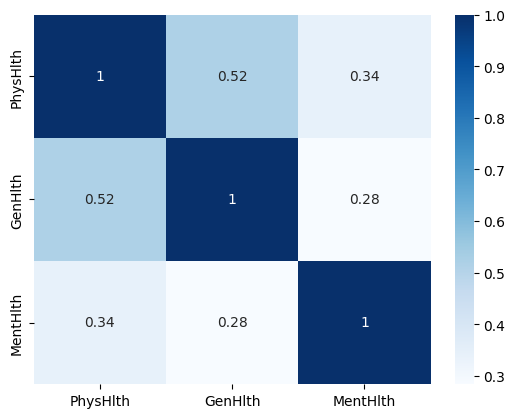

In [ ]:
sns.heatmap(data=df_diabetes_binary[['Diabetes_bin_cat', 'PhysHlth', 'GenHlth', 'MentHlth']].corr(), cmap='Blues', annot=True)

### 2. eda 과정으로부터 제거할 7개 변수 선택

#### 0. 1차적으로 제거한 7개 변수에 대한 설명

- (21 features -> 14 features)
- 'CholCheck'/ 'AnyHealthcare' / 'NoDocbcCost' 변수는 영향이 없을 것이다.
    -  a. 'CholCheck' : 
        - 'Diabetes_binary'와 상관계수 : 0.072523
        - Non-Diabetic과 Diabetic의 'CholCheck' mean -> check barplot
    - b. 'AnyHealthcare' :
        - 'Diabetes_binary'와 상관계수 : 0.025331
        - Non-Diabetic과 Diabetic의 'AnyHealthcare' mean -> check barplot
    - c. 'NoDocbcCost' :
        - 'Diabetes_binary'와 상관계수 : 0.020048
        - Non-Diabetic과 Diabetic의 'NoDocbcCost' mean -> check barplot

- 'Stroke'/ 'HeartDiseaseorAttack' 변수는 당뇨병에 대한 설명 변수보다는 당뇨병에 의한 결과
- 'GenHlth' / 'MentHlth' / 'PhysHlth' 를 별도로 구분하지 않아도 될 것이다.
    - a. 세 변수간 상관관계가 높은 편
        - 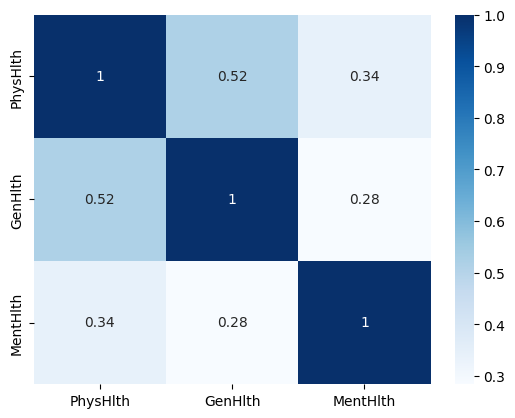
    - b. 'MentHlth' 중 응답 0 의 비율 : 0.663801 / 'PhysHlth' 중 응답 0 의 비율 : 0.595179 -> 무응답이었음.
        - 출처 : Behavioral Risk Factor Surveillance System 2015 Codebook Report
        - 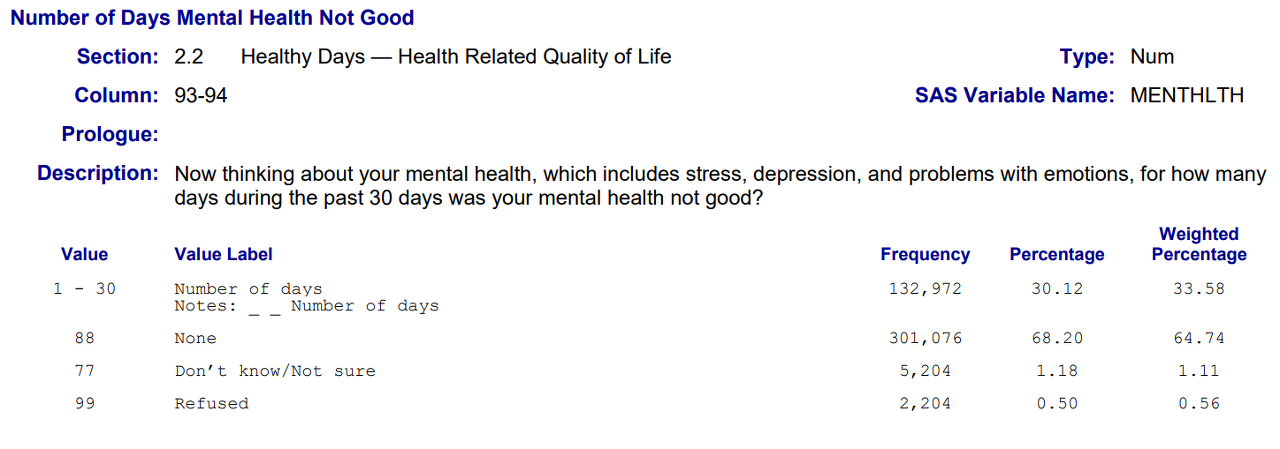
        - 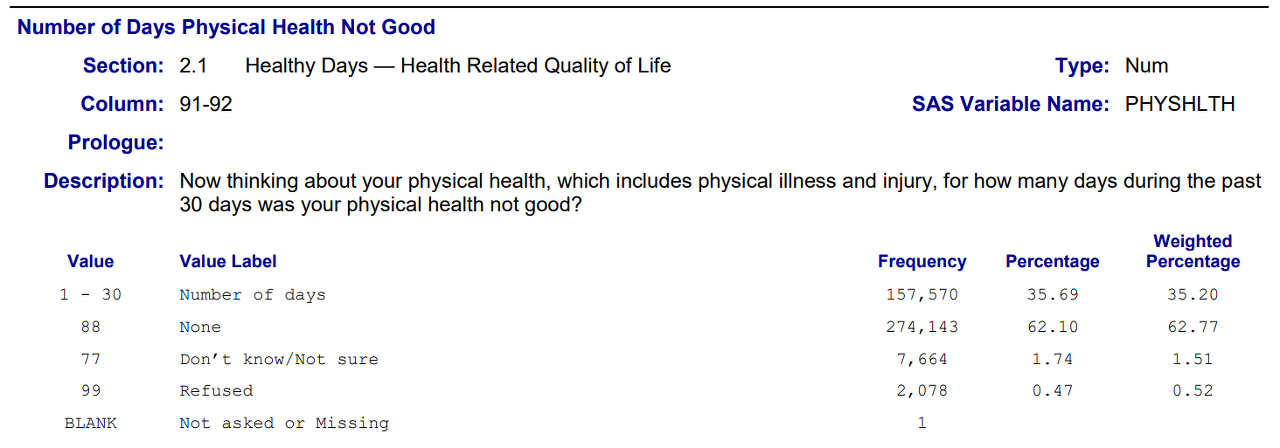

- 1차 변수 제거 후 기본 정보 확인

In [46]:
df_diabetes_binary.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_bin_cat', 'Obesity_cat', 'Obesity_cat_num', 'Obesity_cat_bin',
       'Obese'],
      dtype='object')

In [47]:
vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']
# 종속변수 'Diabetes_binary'
# 설명면수 ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']]
# 비만도에 대한 변수는 다음 중 선택하여 사용 'Obesity_cat', 'Obesity_cat_num', 'Obesity_cat_bin', 'Obese'

(-1.0, 1.0)

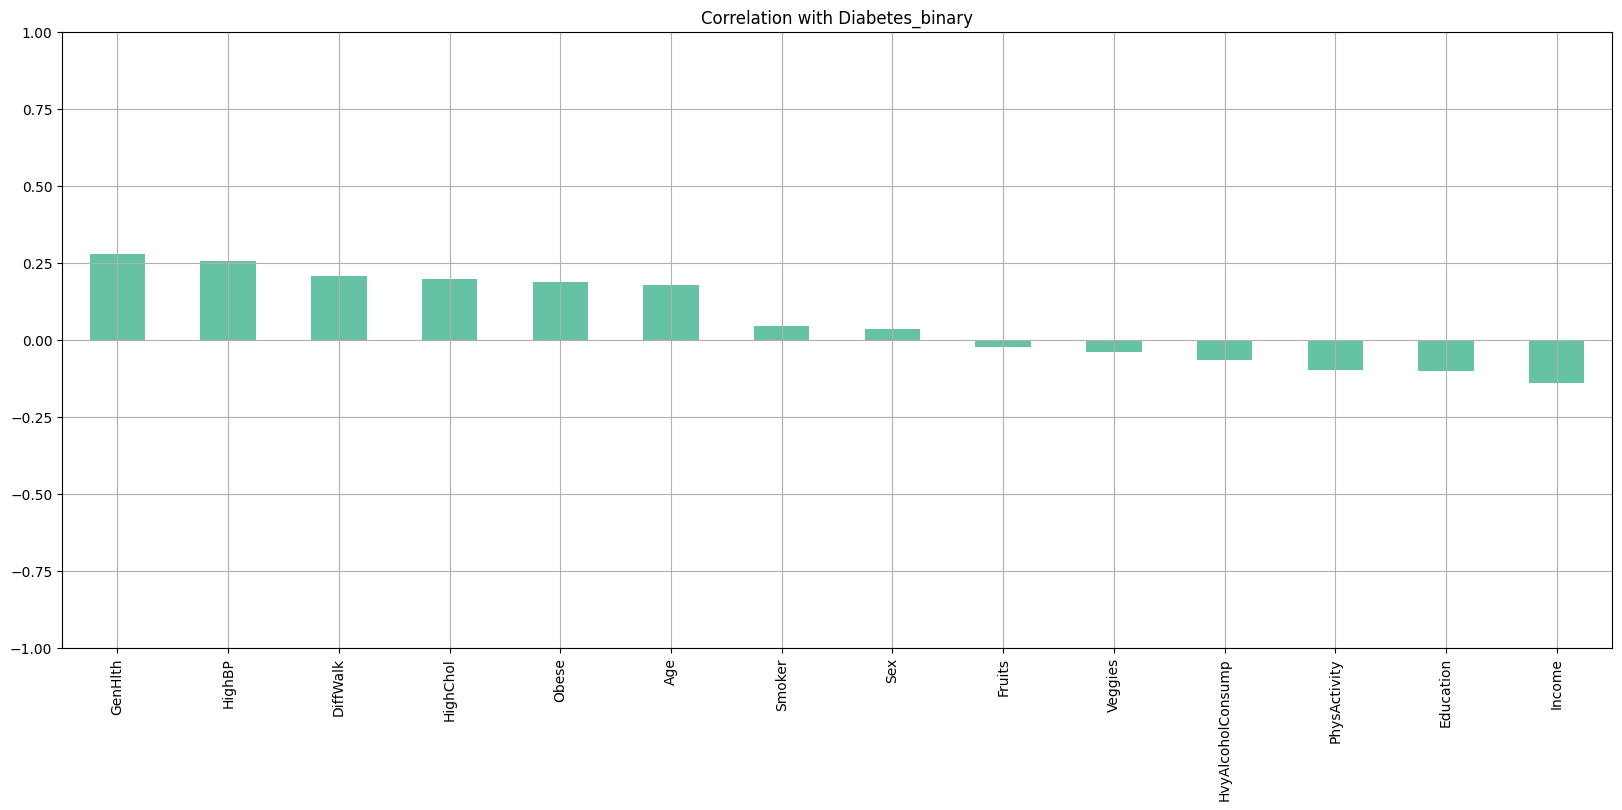

In [48]:
df_diabetes_binary[vars].drop('Diabetes_binary', axis=1).corrwith(df_diabetes_binary.Diabetes_binary).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary")
plt.ylim(-1, 1)

In [49]:
df_diabetes_binary.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_bin_cat', 'Obesity_cat', 'Obesity_cat_num', 'Obesity_cat_bin',
       'Obese'],
      dtype='object')

#### 1. High Cholesterol-Age-Diabetes

(0.0, 1.0)

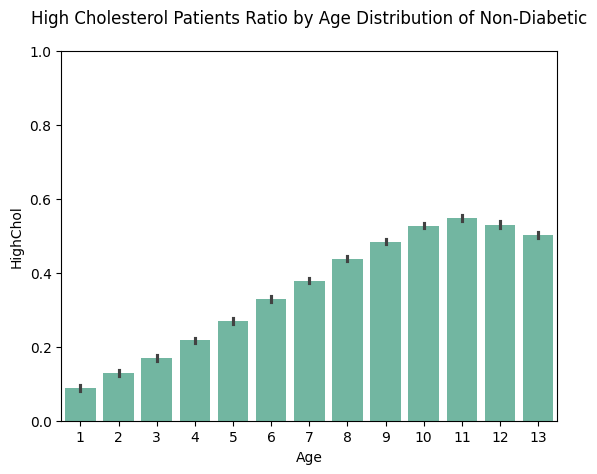

In [51]:
sns.barplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==0], x='Age', y='HighChol')
plt.title('High Cholesterol Patients Ratio by Age Distribution of Non-Diabetic', pad=20)
plt.ylim(0, 1)

(0.0, 1.0)

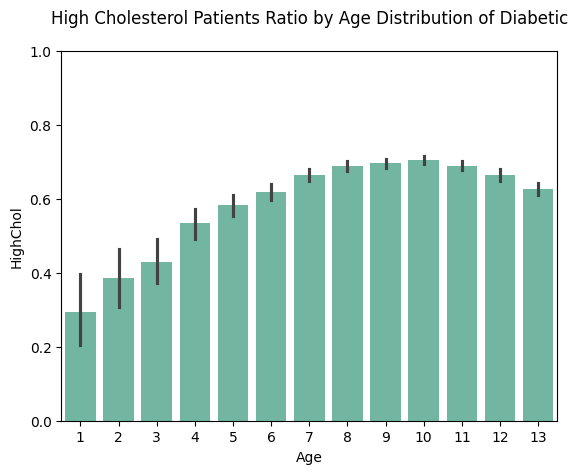

In [52]:
sns.barplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==1], x='Age', y='HighChol')
plt.title('High Cholesterol Patients Ratio by Age Distribution of Diabetic', pad=20)
plt.ylim(0, 1)

Text(0.5, 1.0, 'Age Distribution of Non-Diabetic')

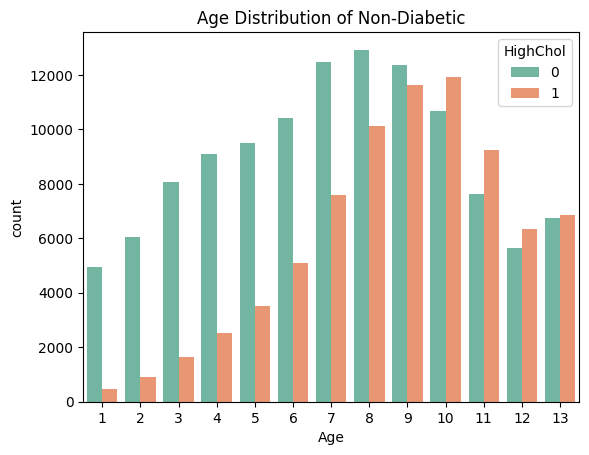

In [53]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==0], x='Age', hue='HighChol')
plt.title('Age Distribution of Non-Diabetic')

Text(0.5, 1.0, 'Age Distribution of Diabetic')

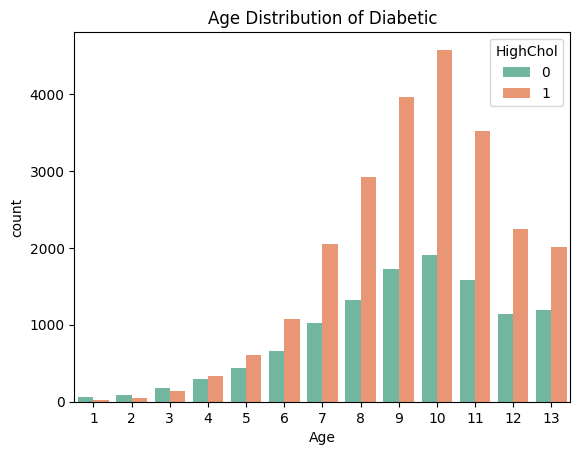

In [54]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==1], x='Age', hue='HighChol')
plt.title('Age Distribution of Diabetic')

#### 2. HighBP-HighChol

<Axes: xlabel='HighBP', ylabel='HighChol'>

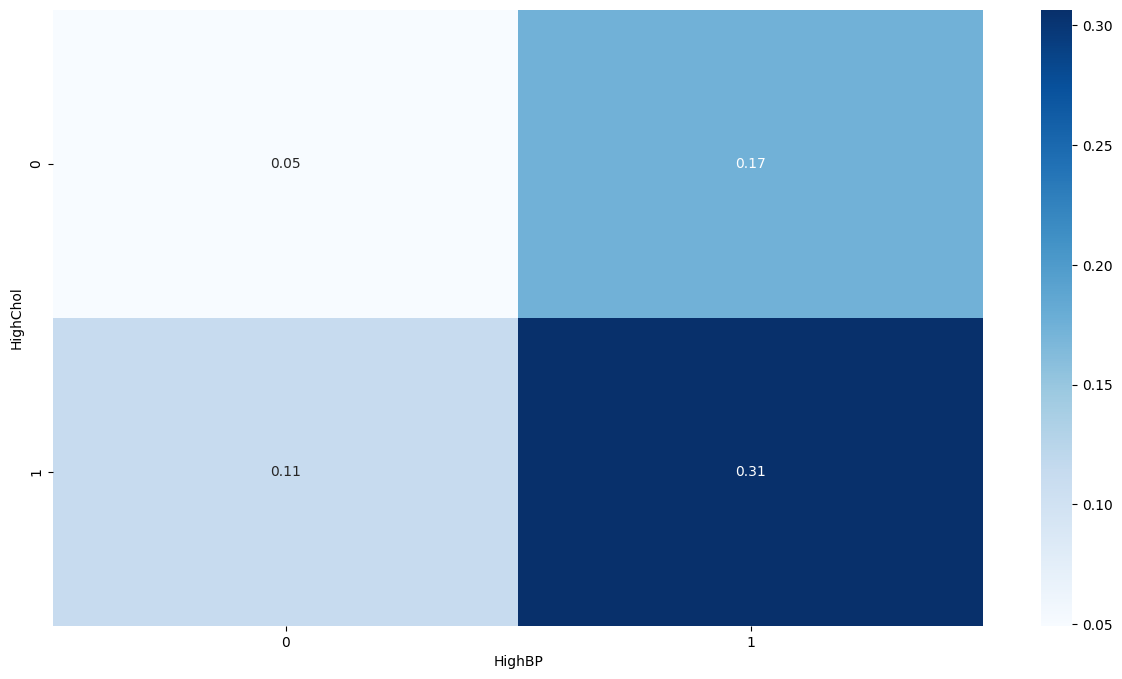

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.pivot_table(df_diabetes_binary, values='Diabetes_binary', index='HighChol', columns='HighBP'), annot=True, fmt='.2f', cmap='Blues')

#### 3. Education/Income-Age-Diabetes

Text(0.5, 1.0, 'Income Distribution of Non-Diabetic by Age Group')

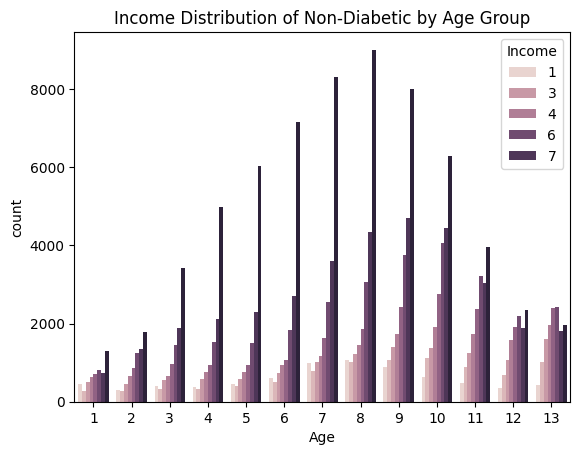

In [67]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==0], x='Age', hue='Income')
plt.title('Income Distribution of Non-Diabetic by Age Group')

Text(0.5, 1.0, 'Income Distribution of Diabetic by Age Group')

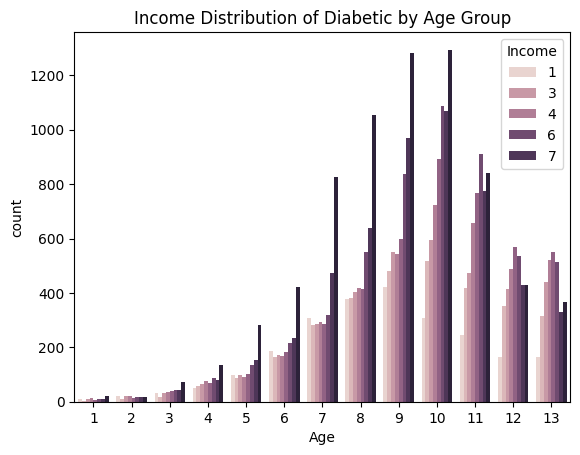

In [68]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==1], x='Age', hue='Income')
plt.title('Income Distribution of Diabetic by Age Group')

Text(0.5, 1.0, 'Education Distribution of Non-Diabetic by Age Group')

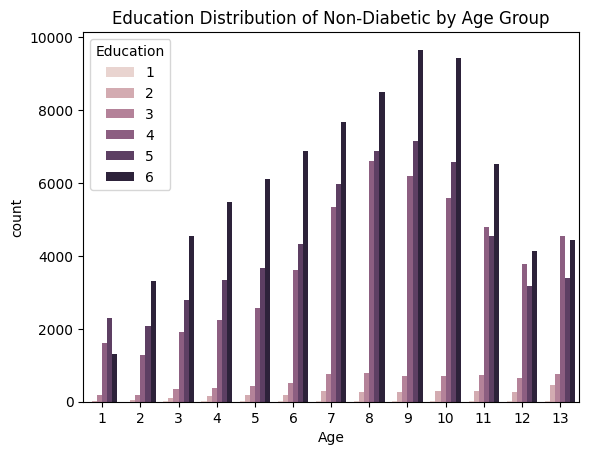

In [69]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==0], x='Age', hue='Education')
plt.title('Education Distribution of Non-Diabetic by Age Group')

Text(0.5, 1.0, 'Education Distribution of Diabetic by Age Group')

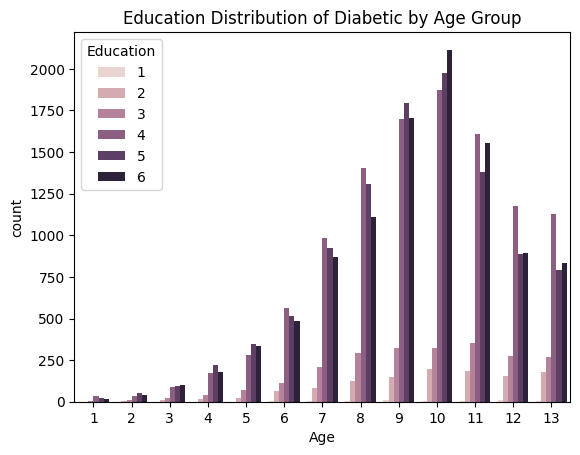

In [70]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==1], x='Age', hue='Education')
plt.title('Education Distribution of Diabetic by Age Group')

In [60]:
age_cat_str = {1 : '18 to 24', 2:'25 to 29', 3:'30 to 34', 4:'35 to 39', 5:'40 to 44',
               6:'45 to 49', 7:'50 to 54', 8:'55 to 59', 9:'60 to 64', 10:'65 to 69',
               11:'70 to 74', 12:'75 to 79', 13:'80 or older'}

def age_10s(age_cat) :
    if (age_cat == 1) or (age_cat == 2):
        return 1
    elif (age_cat == 3) or (age_cat == 4):
        return 2
    elif (age_cat == 5) or (age_cat == 6):
        return 3
    elif (age_cat == 7) or (age_cat == 8):
        return 4
    elif (age_cat == 9) or (age_cat == 10):
        return 5
    elif (age_cat == 11) or (age_cat == 12):
        return 6
    else:
        return 7

In [61]:
df_diabetes_binary['Age_in_10s'] = df_diabetes_binary['Age'].apply(age_10s)

Text(0.5, 1.0, 'Education Distribution of Non-Diabetic by Age Group')

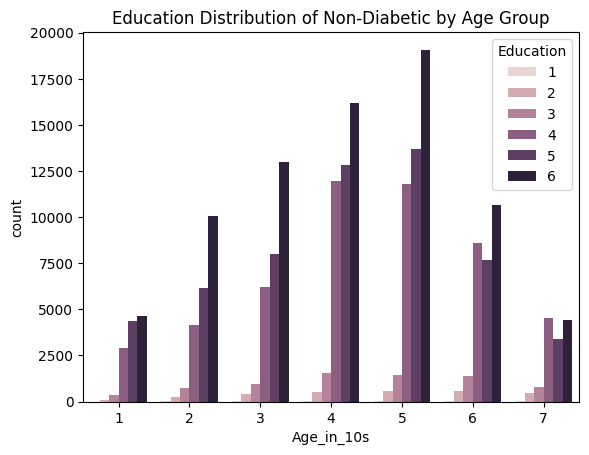

In [71]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==0], x='Age_in_10s', hue='Education')
plt.title('Education Distribution of Non-Diabetic by Age Group')

Text(0.5, 1.0, 'Education Distribution of Diabetic by Age Group')

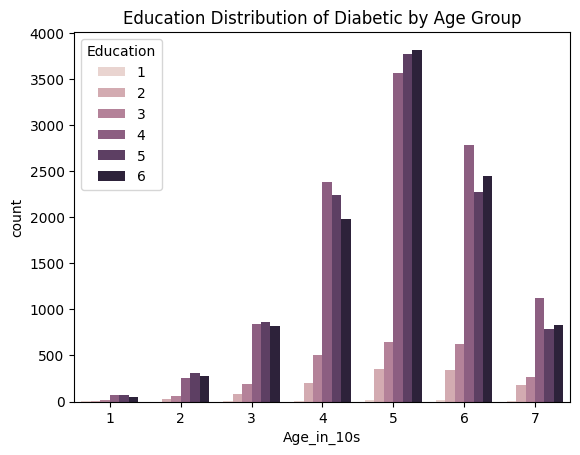

In [72]:
sns.countplot(data=df_diabetes_binary[df_diabetes_binary['Diabetes_binary']==1], x='Age_in_10s', hue='Education')
plt.title('Education Distribution of Diabetic by Age Group')

In [73]:
df = df_diabetes_binary[['Age', 'Education', 'Income', 'Diabetes_binary']]

<Axes: >

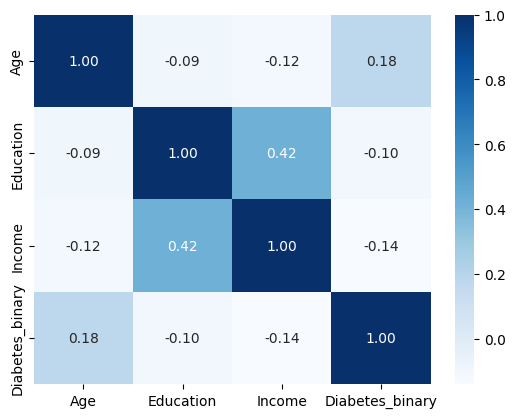

In [74]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')

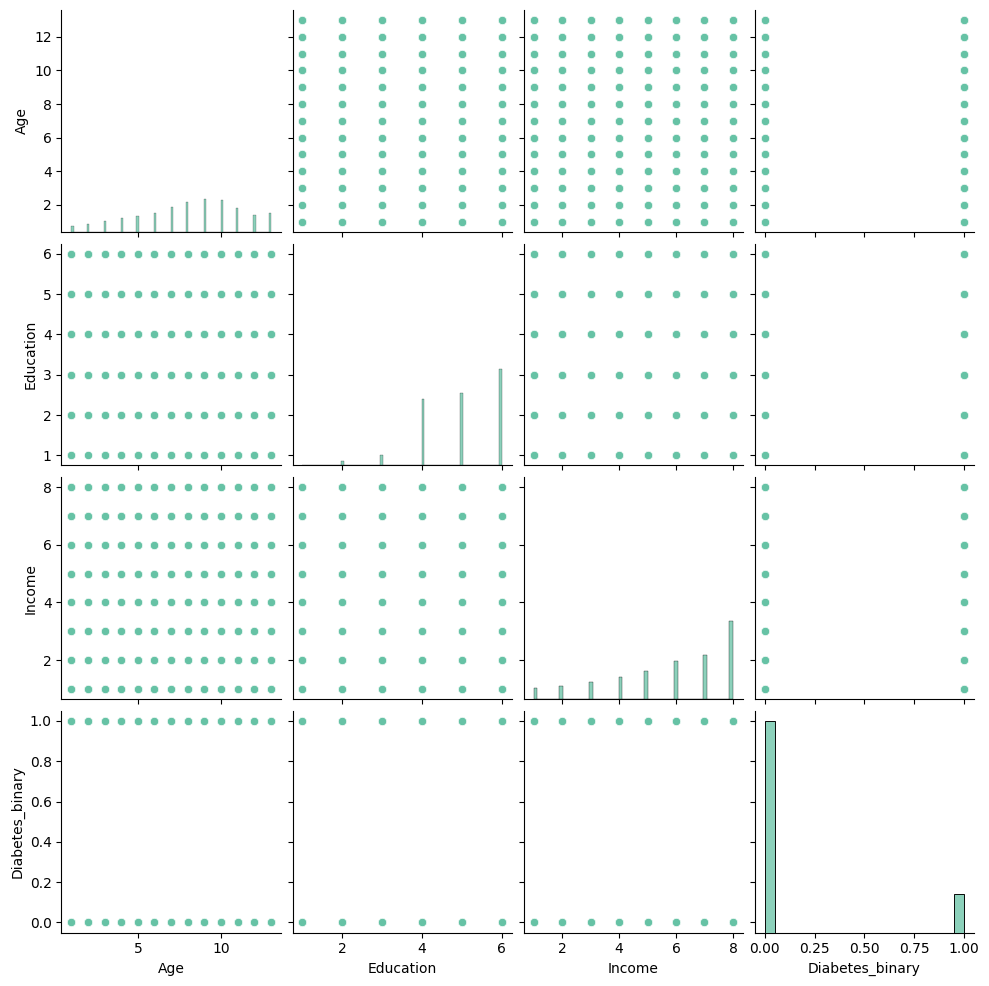

In [82]:
sns.pairplot(df)

In [76]:
df.groupby('Diabetes_binary')['Income'].value_counts(normalize=True)

Diabetes_binary  Income
0                8         0.332334
                 7         0.179574
                 6         0.152780
                 5         0.107199
                 4         0.081831
                 3         0.063567
                 2         0.044604
                 1         0.038112
1                8         0.200644
                 6         0.149870
                 7         0.148902
                 5         0.127903
                 4         0.115309
                 3         0.101547
                 2         0.087928
                 1         0.067898
Name: Income, dtype: float64

In [94]:
pd.pivot_table(df_diabetes_binary, values='Diabetes_binary', index='Education', columns='Age', aggfunc='mean')

Age              1         2         3         4         5         6   \
Education                                                               
1          0.250000  0.000000  0.000000  0.000000  0.100000  0.166667   
2          0.000000  0.078431  0.084906  0.085366  0.094787  0.243137   
3          0.020725  0.052083  0.061828  0.091127  0.137864  0.186084   
4          0.020036  0.027047  0.043260  0.072765  0.097510  0.134289   
5          0.010790  0.023474  0.032147  0.061676  0.085893  0.106471   
6          0.011295  0.011908  0.022117  0.031399  0.051954  0.065781   

Age              7         8         9         10        11        12  \
Education                                                               
1          0.181818  0.250000  0.461538  0.235294  0.333333  0.473684   
2          0.219512  0.322835  0.352804  0.393281  0.381633  0.355972   
3          0.214359  0.268877  0.310745  0.313112  0.323583  0.300000   
4          0.155303  0.175529  0.215182  0.250636  0.250819  0.236397   
5          0.134292  0.160210  0.200827  0.231148  0.233733  0.218572   
6          0.101864  0.115204  0.149952  0.183228  0.192513  0.177773   

Age              13  
Education            
1          0.272727  
2          0.287302  
3          0.255769  
4          0.198835  
5          0.189222  
6          0.158194

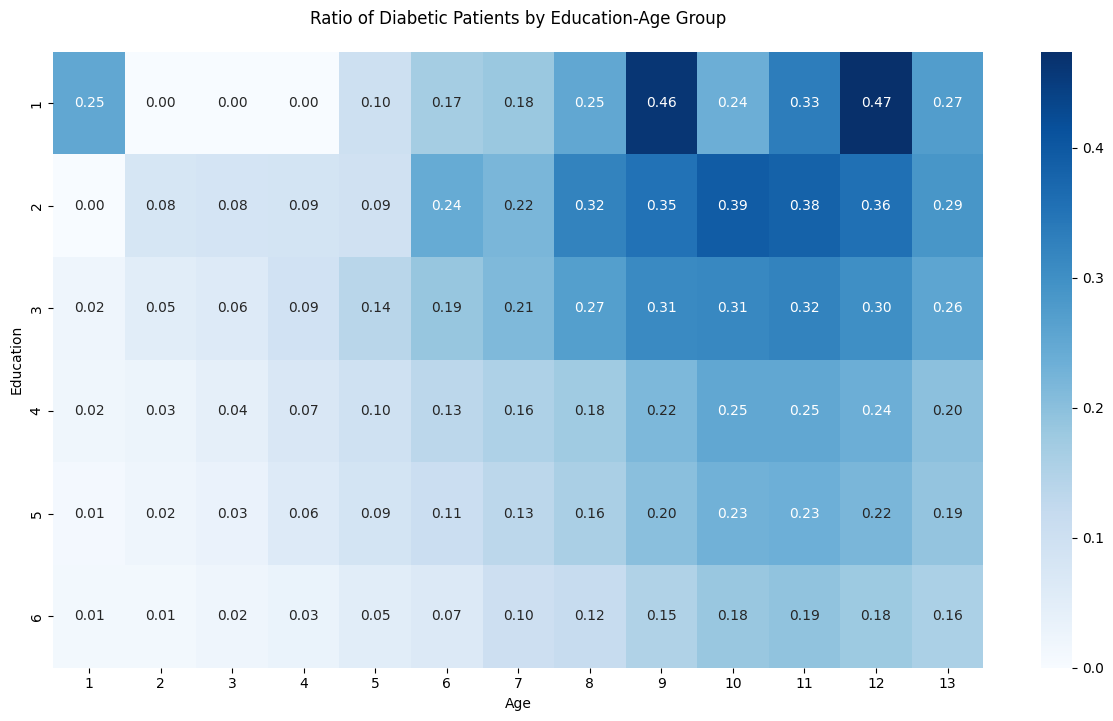

In [96]:
pt_age_edu = pd.pivot_table(df_diabetes_binary, values='Diabetes_binary', index='Education', columns='Age', aggfunc='mean')

plt.figure(figsize=(15,8))
sns.heatmap(pt_age_edu, annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetic Patients by Education-Age Group', pad=20)
plt.show()

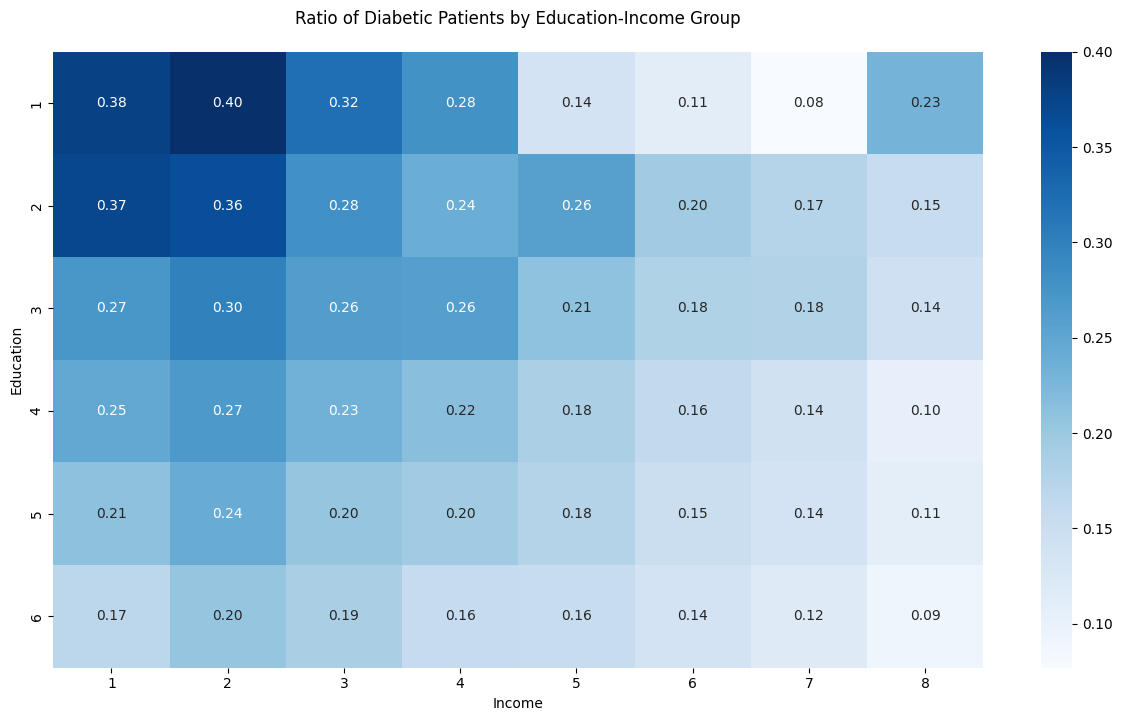

In [97]:
pt_edu_income = pd.pivot_table(df_diabetes_binary, values='Diabetes_binary', index='Education', columns='Income')
plt.figure(figsize=(15,8))
sns.heatmap(pt_edu_income, annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetic Patients by Education-Income Group', pad=20)
plt.show()

In [98]:
# Assuming df_diabetes_binary is your DataFrame
X = df_diabetes_binary[['Age', 'Education', 'Income']]
y = df_diabetes_binary['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = linear_model.predict(X_test)

# Apply threshold (0.5) to classify into groups 0 and 1
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.8456912517703453
F1 Score: 0.0


## 4. Logistic regression

### 0. (Logistic Regression 진행하기 전 21개 변수 모두 VIF 계산)

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# Variance Inflation Factor, VIF
# 만약 VIF 값이 10을 넘는 변수가 있다면, 해당 변수들 간에 공선성이 있을 수 있습니다. 
def calculat_vif(df) :
    vif_data = pd.DataFrame()
    vif_data['Variable'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [110]:
vif_result = calculat_vif(df_diabetes_binary[original_vars].drop(columns=['Diabetes_binary', 'Diabetes_bin_cat']))
vif_result.sort_values(by='VIF', ascending=False)

Variable        VIF
19             Education  27.029365
2              CholCheck  21.459247
11         AnyHealthcare  18.929624
3                    BMI  17.343226
20                Income  12.577823
13               GenHlth  10.962762
18                   Age   9.754024
9                Veggies   5.279982
7           PhysActivity   4.136394
8                 Fruits   2.825639
0                 HighBP   2.352183
1               HighChol   2.066881
15              PhysHlth   2.011309
4                 Smoker   1.985653
17                   Sex   1.903811
16              DiffWalk   1.850008
14              MentHlth   1.469319
6   HeartDiseaseorAttack   1.296633
12           NoDocbcCost   1.218706
5                 Stroke   1.128022
10     HvyAlcoholConsump   1.091476

### 1. Load data for Logistic Regression
- class imbalance 문제로 binary5050 자료로 로지스틱 회귀 진행

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [256]:
diabetes_binary_5050 = pd.read_csv('.\data\diabetes\original data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
diabetes_binary_5050

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[70692 rows x 22 columns]

In [257]:
df_diabetes_binary_5050 = diabetes_binary_5050.drop_duplicates()
df_diabetes_binary_5050

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[69057 rows x 22 columns]

In [258]:
df_diabetes_binary_5050.corr()

Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.372048  0.281399   0.118900   
HighBP                       0.372048  1.000000  0.308987   0.106593   
HighChol                     0.281399  0.308987  1.000000   0.088231   
CholCheck                    0.118900  0.106593  0.088231   1.000000   
BMI                          0.285643  0.232372  0.123917   0.047779   
Smoker                       0.075853  0.078123  0.086522  -0.002854   
Stroke                       0.122727  0.126869  0.098166   0.023368   
HeartDiseaseorAttack         0.207229  0.206776  0.178207   0.044795   
PhysActivity                -0.150281 -0.128307 -0.084469  -0.010072   
Fruits                      -0.044560 -0.031818 -0.040783   0.015853   
Veggies                     -0.072181 -0.059824 -0.037801  -0.001040   
HvyAlcoholConsump           -0.098709 -0.029764 -0.027259  -0.026850   
AnyHealthcare                0.027034  0.039659  0.034352   0.106549   
NoDocbcCost                  0.036145  0.021802  0.029976  -0.061975   
GenHlth                      0.396571  0.308459  0.227588   0.063116   
MentHlth                     0.080688  0.058133  0.079929  -0.009365   
PhysHlth                     0.206868  0.167821  0.138266   0.036442   
DiffWalk                     0.267082  0.229638  0.157859   0.046421   
Sex                          0.042538  0.037824  0.013250  -0.008116   
Age                          0.274550  0.333721  0.235779   0.103414   
Education                   -0.158522 -0.130037 -0.075364  -0.011266   
Income                      -0.212846 -0.176360 -0.098712   0.005067   

                           BMI    Smoker    Stroke  HeartDiseaseorAttack  \
Diabetes_binary       0.285643  0.075853  0.122727              0.207229   
HighBP                0.232372  0.078123  0.126869              0.206776   
HighChol              0.123917  0.086522  0.098166              0.178207   
CholCheck             0.047779 -0.002854  0.023368              0.044795   
BMI                   1.000000  0.002761  0.019503              0.055345   
Smoker                0.002761  1.000000  0.061957              0.120457   
Stroke                0.019503  0.061957  1.000000              0.222062   
HeartDiseaseorAttack  0.055345  0.120457  0.222062              1.000000   
PhysActivity         -0.164179 -0.072401 -0.076771             -0.093858   
Fruits               -0.076933 -0.068192 -0.005811             -0.014931   
Veggies              -0.050163 -0.023760 -0.044869             -0.032327   
HvyAlcoholConsump    -0.060795  0.076394 -0.024496             -0.038745   
AnyHealthcare        -0.010527 -0.010228  0.007801              0.017603   
NoDocbcCost           0.061861  0.031896  0.034305              0.033397   
GenHlth               0.256642  0.140658  0.186537              0.271502   
MentHlth              0.099286  0.086354  0.084800              0.071530   
PhysHlth              0.155661  0.114730  0.161824              0.194963   
DiffWalk              0.240667  0.113713  0.189714              0.229188   
Sex                  -0.002822  0.113422  0.004149              0.099020   
Age                  -0.045130  0.099699  0.123344              0.220790   
Education            -0.089112 -0.130790 -0.069602             -0.090403   
Income               -0.113706 -0.093897 -0.132637             -0.140702   

                      PhysActivity    Fruits  ...  AnyHealthcare  NoDocbcCost  \
Diabetes_binary          -0.150281 -0.044560  ...       0.027034     0.036145   
HighBP                   -0.128307 -0.031818  ...       0.039659     0.021802   
HighChol                 -0.084469 -0.040783  ...       0.034352     0.029976   
CholCheck                -0.010072  0.015853  ...       0.106549    -0.061975   
BMI                      -0.164179 -0.076933  ...      -0.010527     0.061861   
Smoker                   -0.072401 -0.068192  ...      -0.010228     0.031896   
Stroke                   -0.076771 -0.005811  ...

<Axes: >

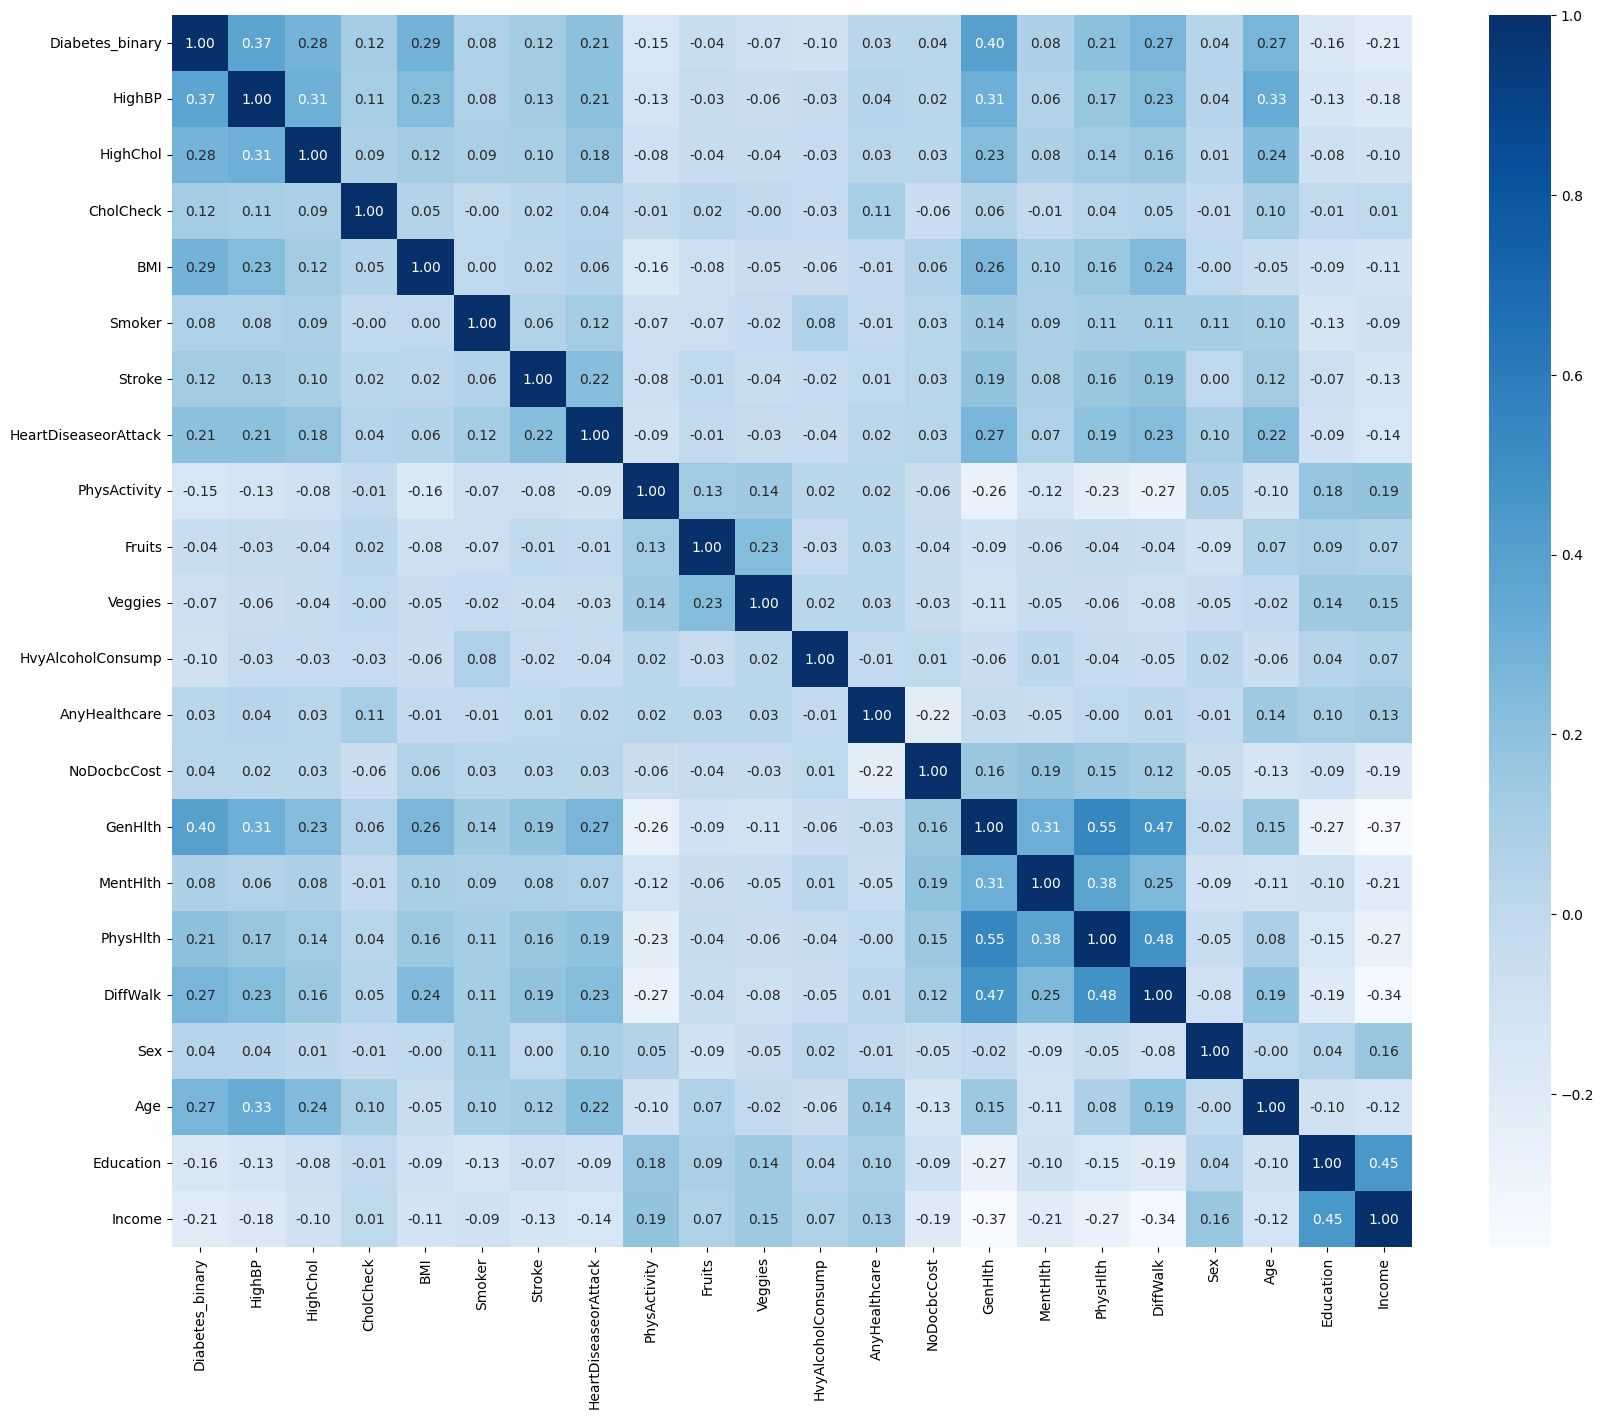

In [259]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_diabetes_binary_5050.corr(), annot=True, fmt='.2f', cmap='Blues')

In [260]:
# 모든 변수 간 상관관계 in sorted order
corr_matrix = df_diabetes_binary_5050.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
corr_series = upper_tri.unstack()
sorted_corr_series = corr_series.sort_values(ascending=False)
sorted_corr_series.dropna()

PhysHlth   GenHlth            0.550138
DiffWalk   PhysHlth           0.484092
           GenHlth            0.472338
Income     Education          0.450376
GenHlth    Diabetes_binary    0.396571
                                ...   
DiffWalk   PhysActivity      -0.270988
Education  GenHlth           -0.271037
Income     PhysHlth          -0.271148
           DiffWalk          -0.335819
           GenHlth           -0.370204
Length: 231, dtype: float64

In [261]:
# 'Diabetes_binary' 와의 상관관계 in sorted order
corr_series = df_diabetes_binary_5050.drop('Diabetes_binary', axis=1).corrwith(df_diabetes_binary_5050.Diabetes_binary).sort_values(ascending=False)
corr_series

GenHlth                 0.396571
HighBP                  0.372048
BMI                     0.285643
HighChol                0.281399
Age                     0.274550
DiffWalk                0.267082
HeartDiseaseorAttack    0.207229
PhysHlth                0.206868
Stroke                  0.122727
CholCheck               0.118900
MentHlth                0.080688
Smoker                  0.075853
Sex                     0.042538
NoDocbcCost             0.036145
AnyHealthcare           0.027034
Fruits                 -0.044560
Veggies                -0.072181
HvyAlcoholConsump      -0.098709
PhysActivity           -0.150281
Education              -0.158522
Income                 -0.212846
dtype: float64

In [262]:
corr_series.abs().sort_values()

AnyHealthcare           0.027034
NoDocbcCost             0.036145
Sex                     0.042538
Fruits                  0.044560
Veggies                 0.072181
Smoker                  0.075853
MentHlth                0.080688
HvyAlcoholConsump       0.098709
CholCheck               0.118900
Stroke                  0.122727
PhysActivity            0.150281
Education               0.158522
PhysHlth                0.206868
HeartDiseaseorAttack    0.207229
Income                  0.212846
DiffWalk                0.267082
Age                     0.274550
HighChol                0.281399
BMI                     0.285643
HighBP                  0.372048
GenHlth                 0.396571
dtype: float64

In [263]:
df_diabetes_binary_5050

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[69057 rows x 22 columns]

In [264]:
df_diabetes_binary_5050['Diabetes_binary'].value_counts()

1.0    35097
0.0    33960
Name: Diabetes_binary, dtype: int64

In [265]:
df_diabetes_binary_5050['Diabetes_binary'].value_counts(normalize=True)

1.0    0.508232
0.0    0.491768
Name: Diabetes_binary, dtype: float64

### 2. preprocess data

- add categorical columns
- scale : StandardScaler, MinMaxScaler

In [266]:
diab_mappping = {
    0 : 'no diabetes',
    1 : 'diabetes'
}

df_diabetes_binary_5050['Diabetes_bin_cat'] = np.select([df_diabetes_binary_5050['Diabetes_binary'] == key for key in diab_mappping], diab_mappping.values())

C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\779681194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_binary_5050['Diabetes_bin_cat'] = np.select([df_diabetes_binary_5050['Diabetes_binary'] == key for key in diab_mappping], diab_mappping.values())


In [267]:
df_diabetes_binary_5050.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_bin_cat'],
      dtype='object')

In [268]:
df_diabetes_binary_5050['Obesity_cat'] = df_diabetes_binary_5050['BMI'].apply(cat_obesity)
df_diabetes_binary_5050['Obesity_cat_num'] = df_diabetes_binary_5050['Obesity_cat'].apply(obese_cat_to_num)
df_diabetes_binary_5050['Obesity_cat_bin'] = df_diabetes_binary_5050['Obesity_cat'].apply(obese_cat_to_bin)
df_diabetes_binary_5050['Obese'] = df_diabetes_binary_5050['Obesity_cat'].apply(obese_or_not)

C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\652900806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_binary_5050['Obesity_cat'] = df_diabetes_binary_5050['BMI'].apply(cat_obesity)
C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\652900806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_binary_5050['Obesity_cat_num'] = df_diabetes_binary_5050['Obesity_cat'].apply(obese_cat_to_num)
C:\Users\hyj89\AppData\Local\Temp\ipykernel_18764\652900806.py:3: SettingWithCopyWarning:

In [269]:
df_diabetes_binary_5050

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  DiffWalk  Sex   Age  \
0                       0.0           1.0     0.0  ...       0.0  1.0   4.0   
1                       0.0           0.0     1.0  ...       0.0  1.0  12.0   
2                       0.0           1.0     1.0  ...       0.0  1.0  13.0   
3                       0.0           1.0     1.0  ...       0.0  1.0  11.0   
4                       0.0           1.0     1.0  ...       0.0  0.0   8.0   
...                     ...           ...     ...  ...       ...  ...   ...   
70687                   0.0           0.0     0.0  ...       0.0  0.0   6.0   
70688                   1.0           0.0     1.0  ...       1.0  1.0  10.0   
70689                   1.0           0.0     1.0  ...       1.0  0.0  13.0   
70690                   0.0           0.0     0.0  ...       1.0  0.0  11.0   
70691                   1.0           1.0     1.0  ...       0.0  0.0   9.0   

       Education  Income  Diabetes_bin_cat  Obesity_cat  Obesity_cat_num  \
0            6.0     8.0       no diabetes   overweight                2   
1            6.0     8.0       no diabetes   overweight                2   
2            6.0     8.0       no diabetes   overweight                2   
3            6.0     8.0       no diabetes   overweight                2   
4            5.0     8.0       no diabetes   overweight                2   
...          ...     ...               ...          ...              ...   
70687        4.0     1.0          diabetes        obese                3   
70688        3.0     6.0          diabetes   overweight                2   
70689        6.0     4.0          diabetes   overweight                2   
70690        2.0     4.0          diabetes  underweight                0   
70691        6.0     2.0          diabetes   overweight                2   

       Obesity_cat_bin  Obese  
0                    1      0  
1                    1      0  
2                    1      0  
3                    1      0  
4                    1      0  
...                ...    ...  
70687                1      1  
70688                1      0  
70689                1      0  
70690                0      0  
70691                1      0  

[69057 rows x 27 columns]

In [270]:
df_diabetes_binary_5050.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_bin_cat', 'Obesity_cat', 'Obesity_cat_num', 'Obesity_cat_bin',
       'Obese'],
      dtype='object')

In [271]:
len(df_diabetes_binary_5050.columns)

27

#### check vif before lr

In [272]:
vars_14 = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obesity_cat_num']
# 'Obesity_cat_num' 는 테스트해보면서 binary data인 'Obesity_cat_bin'이나 'Obese'로 대체, binary라 scaling 필요하지 않음

In [273]:
len(vars_14)

14

In [274]:
vif_result = calculat_vif(df_diabetes_binary_5050[vars_14])
vif_result.sort_values(by='VIF', ascending=False)

Variable        VIF
11          Education  21.355463
12             Income  11.004932
10                Age  10.204760
7             GenHlth   9.448657
13    Obesity_cat_num   8.827424
5             Veggies   4.997879
3        PhysActivity   3.635329
0              HighBP   3.090527
4              Fruits   2.763437
1            HighChol   2.477878
2              Smoker   2.030551
9                 Sex   1.969790
8            DiffWalk   1.902939
6   HvyAlcoholConsump   1.066131

In [275]:
vars_14.append('Obesity_cat_bin')
vars_14.append('Obese')

#### train test split

In [276]:
y = df_diabetes_binary_5050['Diabetes_binary']
X = df_diabetes_binary_5050[vars_14]

In [277]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55245, 16) (13812, 16) (55245,) (13812,)


#### scale

In [279]:
# scaling
# 'GenHlth', 'Age', 'Education', 'Income', 'Obesity_cat_num'

scaler = StandardScaler()
X_train_gh = X_train['GenHlth'].values.reshape(-1, 1)
X_train['GenHlth'] = scaler.fit_transform(X_train_gh)
X_test_gh = X_test['GenHlth'].values.reshape(-1, 1)
X_test['GenHlth'] = scaler.transform(X_test_gh)

scaler = StandardScaler()
X_train_age = X_train['Age'].values.reshape(-1, 1)
X_train['Age'] = scaler.fit_transform(X_train_age)
X_test_age = X_test['Age'].values.reshape(-1, 1)
X_test['Age'] = scaler.transform(X_test_age)

scaler = MinMaxScaler()
X_train_edu = X_train['Education'].values.reshape(-1, 1)
X_train['Education'] = scaler.fit_transform(X_train_edu)
X_test_edu = X_test['Education'].values.reshape(-1, 1)
X_test['Education'] = scaler.transform(X_test_edu)

scaler = MinMaxScaler()
X_train_income = X_train['Income'].values.reshape(-1, 1)
X_train['Income'] = scaler.fit_transform(X_train_income)
X_test_income = X_test['Income'].values.reshape(-1, 1)
X_test['Income'] = scaler.transform(X_test_income)

scaler = MinMaxScaler()
X_train_obs = X_train['Obesity_cat_num'].values.reshape(-1, 1)
X_train['Obesity_cat_num'] = scaler.fit_transform(X_train_obs)
X_test_obs = X_test['Obesity_cat_num'].values.reshape(-1, 1)
X_test['Obesity_cat_num'] = scaler.transform(X_test_obs)


### 3. Logistic Regression

In [603]:
lr_test_results = []

#### trial 1 : 14 variables selected from EDA

In [604]:
# 'Obese'를 포함
ind_var_list = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity',
 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
 'DiffWalk', 'Sex', 'Age',
 'Education', 'Income', 'Obese']

In [605]:
len(ind_var_list)

14

In [606]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}]
Accuracy: 0.7481175789168839
F1 Score: 0.7585201638092595


In [607]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...

#### trial 2 : drop variable with highest VIF
- 'Education'
- no. of features : 14 -> 13

In [608]:
# 'Obese'를 포함
# vif 높은 education 제거
ind_var_list = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']

In [609]:
len(ind_var_list)

13

In [610]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}]
Accuracy: 0.7476107732406603
F1 Score: 0.7580846634281748


In [611]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...

In [612]:
df = df_diabetes_binary_5050[ind_var_list]
vif_result = calculat_vif(df)
vif_result.sort_values(by='VIF', ascending=False)

Variable       VIF
10                Age  9.581352
7             GenHlth  8.203125
11             Income  6.885989
5             Veggies  4.824159
3        PhysActivity  3.443506
0              HighBP  3.082452
4              Fruits  2.744862
1            HighChol  2.472529
2              Smoker  2.030045
12              Obese  2.009279
9                 Sex  1.960427
8            DiffWalk  1.909288
6   HvyAlcoholConsump  1.064669

#### trial 3-1 : drop variable with lowest absolute corrleation
- 'Fruits'
- no. of features : 13 -> 12

In [613]:
# 'Obese' 포함
# 'Fruits' 제거
ind_var_list = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']

In [614]:
len(ind_var_list)

12

In [615]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}]
Accuracy: 0.7481175789168839
F1 Score: 0.7586206896551725


In [616]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...

#### trial 3-2 : drop variable with highest VIF
- 'Age'
- no. of features : 13 -> 12


In [617]:
# 'Obese' 포함
# 'Age' 제거
ind_var_list = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']

In [618]:
len(ind_var_list)

12

In [619]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}]
Accuracy: 0.738560671879525
F1 Score: 0.745327597150716


In [620]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   
3   0.7386   0.7453               12   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3  [HighBP, HighChol, Smoker, PhysActivity, Fruit...

#### trial 4-1 : drop variable with lowest absolute corrleation
- 'Sex'
- no. of features : 12 -> 11

In [621]:
# 'Obese' 포함
# 'Sex' 제거
ind_var_list = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',  'Age', 'Income', 'Obese']

In [622]:
len(ind_var_list)

11

In [623]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [624]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   
3   0.7386   0.7453               12   
4   0.7464   0.7559               11   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4  [HighBP, HighChol, Smoker, PhysActivity, Veggi...

#### trial 4-2 : drop variable with highest VIF
- 'Age'
- no. of features : 12 -> 11

In [625]:
# 'Obese' 포함
# 'Age' 제거
ind_var_list = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']

In [626]:
len(ind_var_list)

11

In [627]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [628]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   
3   0.7386   0.7453               12   
4   0.7464   0.7559               11   
5   0.7390   0.7454               11   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5  [HighBP, HighChol, Smoker, PhysActivity, Veggi...

#### trial 5 : drop variable with lowest absolute corrleation
- 'Veggies'
- no. of features : 11 -> 10

In [629]:
# 'Obese' 포함
# 'Veggies' 제거
ind_var_list = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity',  'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',  'Age', 'Income', 'Obese']

In [630]:
len(ind_var_list)

10

In [631]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [632]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   
3   0.7386   0.7453               12   
4   0.7464   0.7559               11   
5   0.7390   0.7454               11   
6   0.7461   0.7560               10   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6  [HighBP, HighChol, Smoker, PhysActivity, HvyAl...

#### trial 6 : drop variable with lowest absolute corrleation
- 'Smoker'
- no. of features : 10 -> 9

In [633]:
# 'Obese' 포함
# 'Smoker' 제거
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity',  'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obese']

In [634]:
len(ind_var_list)

9

In [635]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [636]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   
3   0.7386   0.7453               12   
4   0.7464   0.7559               11   
5   0.7390   0.7454               11   
6   0.7461   0.7560               10   
7   0.7465   0.7561                9   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6  [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

#### trial 7 : drop variable with lowest absolute corrleation
- 'HvyAlcoholConsump'
- no. of features : 9 -> 8

In [637]:
# 'Obese' 포함
# 'HvyAlcoholConsump' 제거
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity',  'GenHlth', 'DiffWalk',  'Age', 'Income', 'Obese']

In [638]:
len(ind_var_list)

8

In [639]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [640]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   
3   0.7386   0.7453               12   
4   0.7464   0.7559               11   
5   0.7390   0.7454               11   
6   0.7461   0.7560               10   
7   0.7465   0.7561                9   
8   0.7453   0.7554                8   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6  [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8  [HighBP, HighChol, PhysActivity, GenHlth, Diff...

#### trial 8 : hyperparameter tuning
- start from trial 6
- no. of features : 9

In [641]:
# 'Obese' 포함
# 'Smoker' 제거
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity',  'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obese']

In [642]:
len(ind_var_list)

9

##### trial 8-0 : check before hyperparameter tuning

In [643]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
# lr_test_results.append({
#     'Accuracy' : f'{accuracy:.4f}',
#     'F1_Score' : f'{f1}',
#     'no. of features' : len(ind_var_list),
#     'features' : ind_var_list
#     })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

##### trial 8-1 : multi_class = 'multinomial'
- solver 선택에 따른 성능 차이 비교

In [644]:
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

# Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
# ‘lbfgs’ - [‘l2’, None]
# ‘newton-cg’ - [‘l2’, None]
# ‘sag’ - [‘l2’, None]
# ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

# multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
# If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary.
# ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
# New in version 0.18: Stochastic Average Gradient descent solver for ‘multinomial’ case.
# Changed in version 0.22: Default changed from ‘ovr’ to ‘auto’ in 0.22.

In [645]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='newton-cg')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [646]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0   0.7481   0.7585               14   
1   0.7476   0.7581               13   
2   0.7481   0.7586               12   
3   0.7386   0.7453               12   
4   0.7464   0.7559               11   
5   0.7390   0.7454               11   
6   0.7461   0.7560               10   
7   0.7465   0.7561                9   
8   0.7453   0.7554                8   
9   0.7465   0.7561                9   

                                            features  
0  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3  [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5  [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6  [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8  [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [647]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='lbfgs')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [648]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [649]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='sag')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [650]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [651]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [652]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

##### trial 8-2 : multi_class = 'multinomial', solver='saga'
- penalty 선택에 따른 성능 차이 비교

In [653]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', penalty='l1', solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [654]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [655]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', penalty='elasticnet', l1_ratio=0.1, solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [656]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [657]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', penalty='elasticnet', l1_ratio=0.5, solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [658]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [659]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', penalty='elasticnet', l1_ratio=0.9, solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [660]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [661]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', penalty='elasticnet', l1_ratio=0.01, solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [662]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

#### trial 9 : 비만도 카테고리 비교

- 'Obesity_cat_bin'

In [663]:
# 'Obese' 대신 'Obesity_cat_bin'
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity',  'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_bin']

In [664]:
len(ind_var_list)

9

In [665]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [666]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

- 'Obesity_cat_num' (scaled)

In [667]:
# 'Obese' 대신 'Obesity_cat_num'

scaler = MinMaxScaler()
X_train_obs = X_train['Obesity_cat_num'].values.reshape(-1, 1)
X_train['Obesity_cat_num'] = scaler.fit_transform(X_train_obs)
X_test_obs = X_test['Obesity_cat_num'].values.reshape(-1, 1)
X_test['Obesity_cat_num'] = scaler.transform(X_test_obs)

ind_var_list = ['HighBP', 'HighChol', 'PhysActivity',  'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num']

In [668]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [669]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

#### trial 10 : class_weight tuning

In [670]:
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num']

In [671]:
len(ind_var_list)

9

In [672]:
logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', class_weight='balanced')
logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')


[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [673]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [674]:
class_weights = {0: 2, 1: 2, 2 : 1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1}

logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', class_weight=class_weights)

logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')


[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [675]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [676]:
# AGE 제거
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Income', 'Obesity_cat_num']

class_weights = {0: 2, 1: 2, 2 : 1, 3:1, 4:1, 5:1, 6:1, 7:1}

logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', class_weight=class_weights)

logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [677]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   
22   0.7396   0.7478                8   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
22  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [678]:
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num']

class_weights = {0: 3, 1: 3, 2 : 1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:2}

logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', class_weight=class_weights)

logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [679]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   
22   0.7396   0.7478                8   
23   0.7507   0.7612                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
22  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
23  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [680]:
class_weights = {0: 5, 1: 5, 2 : 1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:3}

logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', class_weight=class_weights, random_state=42, max_iter=1000)

logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

c:\Users\hyj89\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [681]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   
22   0.7396   0.7478                8   
23   0.7507   0.7612                9   
24   0.6759   0.6121                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
22  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
23  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
24  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

In [682]:
class_weights = {0: 10, 1: 10, 2 : 1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:5}

logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', class_weight=class_weights, random_state=42, max_iter=1000)

logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

c:\Users\hyj89\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [683]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   
22   0.7396   0.7478                8   
23   0.7507   0.7612                9   
24   0.6759   0.6121                9   
25   0.6144   0.4711                9   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
22  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
23  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
24  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
25  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...

#### final check to see if f1 score drops if important variables are dropped

In [684]:
ind_var_list = ['HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num']

class_weights = {0: 3, 1: 3, 2 : 1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:2}

logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', class_weight=class_weights)

logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
# lr_test_results.append({
#     'Accuracy' : f'{accuracy:.4f}',
#     'F1_Score' : f'{f1:.4f}',
#     'no. of features' : len(ind_var_list),
#     'features' : ind_var_list
#     })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [685]:
ind_var_list = ['PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income']

logreg_model = LogisticRegression(n_jobs=-1, multi_class= 'multinomial', solver='saga', random_state=42, max_iter=1000, class_weight='balanced')

logreg_model.fit(X_train[ind_var_list], y_train)

y_pred = logreg_model.predict(X_test[ind_var_list])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
lr_test_results.append({
    'Accuracy' : f'{accuracy:.4f}',
    'F1_Score' : f'{f1:.4f}',
    'no. of features' : len(ind_var_list),
    'features' : ind_var_list
    })

print(lr_test_results)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

[{'Accuracy': '0.7481', 'F1_Score': '0.7585', 'no. of features': 14, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Obese']}, {'Accuracy': '0.7476', 'F1_Score': '0.7581', 'no. of features': 13, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7481', 'F1_Score': '0.7586', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'Obese']}, {'Accuracy': '0.7386', 'F1_Score': '0.7453', 'no. of features': 12, 'features': ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Obese']}, {'Accuracy': '0.7464', 'F1_Score': '0.7559', 'no. of features': 11, 'features': ['HighB

In [686]:
pd.DataFrame(lr_test_results)

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   
22   0.7396   0.7478                8   
23   0.7507   0.7612                9   
24   0.6759   0.6121                9   
25   0.6144   0.4711                9   
26   0.7055   0.7087                6   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
22  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
23  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
24  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
25  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
26  [PhysActivity, HvyAlcoholConsump, GenHlth, Dif...

### Final Result of Logistic Regression

In [688]:
lr_test_results_df = pd.DataFrame(lr_test_results)
lr_test_results_df

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   
22   0.7396   0.7478                8   
23   0.7507   0.7612                9   
24   0.6759   0.6121                9   
25   0.6144   0.4711                9   
26   0.7055   0.7087                6   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
22  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
23  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
24  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
25  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
26  [PhysActivity, HvyAlcoholConsump, GenHlth, Dif...

In [696]:
lr_test_results_df = lr_test_results_df.drop(index=24, axis=0)
lr_test_results_df = lr_test_results_df.drop(index=25, axis=0)
lr_test_results_df

Accuracy F1_Score  no. of features  \
0    0.7481   0.7585               14   
1    0.7476   0.7581               13   
2    0.7481   0.7586               12   
3    0.7386   0.7453               12   
4    0.7464   0.7559               11   
5    0.7390   0.7454               11   
6    0.7461   0.7560               10   
7    0.7465   0.7561                9   
8    0.7453   0.7554                8   
9    0.7465   0.7561                9   
10   0.7465   0.7561                9   
11   0.7465   0.7561                9   
12   0.7465   0.7561                9   
13   0.7465   0.7561                9   
14   0.7465   0.7561                9   
15   0.7465   0.7561                9   
16   0.7465   0.7561                9   
17   0.7465   0.7561                9   
18   0.7419   0.7531                9   
19   0.7507   0.7612                9   
20   0.7505   0.7587                9   
21   0.7507   0.7612                9   
22   0.7396   0.7478                8   
23   0.7507   0.7612                9   
26   0.7055   0.7087                6   

                                             features  
0   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
1   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
2   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
3   [HighBP, HighChol, Smoker, PhysActivity, Fruit...  
4   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
5   [HighBP, HighChol, Smoker, PhysActivity, Veggi...  
6   [HighBP, HighChol, Smoker, PhysActivity, HvyAl...  
7   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
8   [HighBP, HighChol, PhysActivity, GenHlth, Diff...  
9   [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
10  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
11  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
12  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
13  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
14  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
15  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
16  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
17  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
18  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
19  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
20  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
21  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
22  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
23  [HighBP, HighChol, PhysActivity, HvyAlcoholCon...  
26  [PhysActivity, HvyAlcoholConsump, GenHlth, Dif...

In [725]:
lr_test_results_df.to_csv('./output/logistic_regression_results.csv')

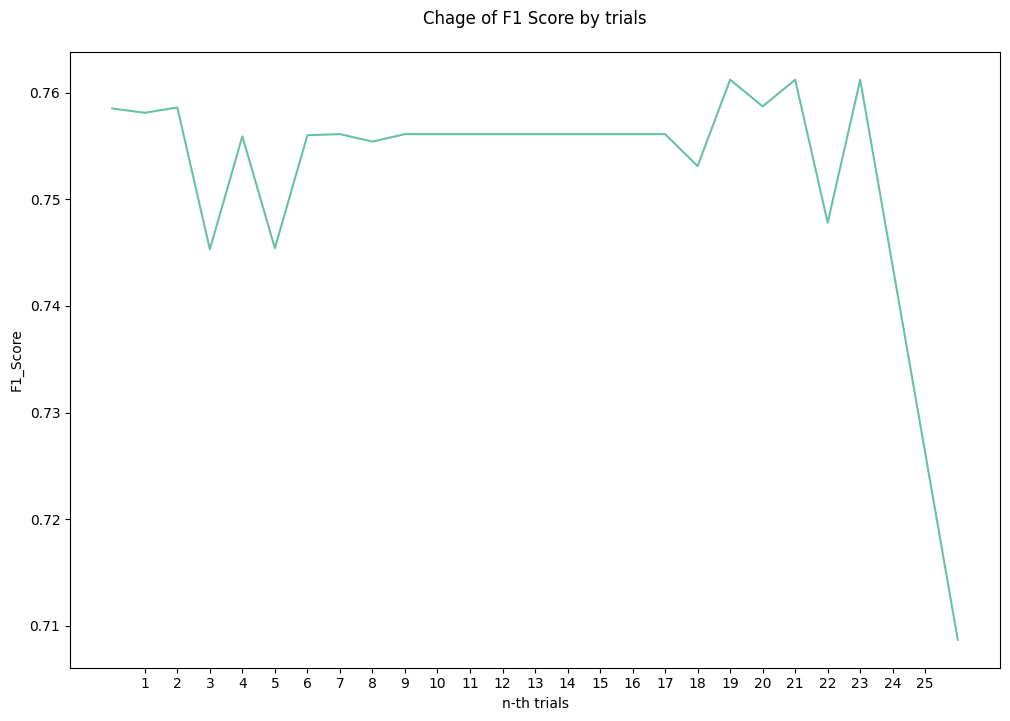

In [724]:
plt.figure(figsize=(12,8))
sns.lineplot(data=lr_test_results_df, x=lr_test_results_df.index.astype(int), y=lr_test_results_df['F1_Score'].astype(float))
plt.xticks(list(range(1, len(lr_test_results_df) + 1)))
plt.xlabel('n-th trials')
plt.title('Chage of F1 Score by trials', pad=20)
plt.show()

In [698]:
df_diabetes_binary[['Diabetes_binary', 'HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num']].corr()

Diabetes_binary    HighBP  HighChol  PhysActivity  \
Diabetes_binary           1.000000  0.254318  0.194944     -0.100404   
HighBP                    0.254318  1.000000  0.283963     -0.104382   
HighChol                  0.194944  0.283963  1.000000     -0.063443   
PhysActivity             -0.100404 -0.104382 -0.063443      1.000000   
HvyAlcoholConsump        -0.065950 -0.014178 -0.019057      0.023378   
GenHlth                   0.276940  0.272784  0.188139     -0.237511   
DiffWalk                  0.205302  0.211759  0.136045     -0.235719   
Age                       0.177263  0.339802  0.263841     -0.087881   
Income                   -0.140659 -0.140030 -0.062089      0.165869   
Obesity_cat_num           0.194376  0.207640  0.115395     -0.108758   

                   HvyAlcoholConsump   GenHlth  DiffWalk       Age    Income  \
Diabetes_binary            -0.065950  0.276940  0.205302  0.177263 -0.140659   
HighBP                     -0.014178  0.272784  0.211759  0.339802 -0.140030   
HighChol                   -0.019057  0.188139  0.136045  0.263841 -0.062089   
PhysActivity                0.023378 -0.237511 -0.235719 -0.087881  0.165869   
HvyAlcoholConsump           1.000000 -0.055783 -0.047655 -0.041018  0.071863   
GenHlth                    -0.055783  1.000000  0.446696  0.145769 -0.331782   
DiffWalk                   -0.047655  0.446696  1.000000  0.205754 -0.299064   
Age                        -0.041018  0.145769  0.205754  1.000000 -0.116361   
Income                      0.071863 -0.331782 -0.299064 -0.116361  1.000000   
Obesity_cat_num            -0.058125  0.183587  0.139361 -0.015986 -0.036542   

                   Obesity_cat_num  
Diabetes_binary           0.194376  
HighBP                    0.207640  
HighChol                  0.115395  
PhysActivity             -0.108758  
HvyAlcoholConsump        -0.058125  
GenHlth                   0.183587  
DiffWalk                  0.139361  
Age                      -0.015986  
Income                   -0.036542  
Obesity_cat_num           1.000000

In [699]:
final_corr_mat = df_diabetes_binary[['Diabetes_binary', 'HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num']].corr()

<Axes: >

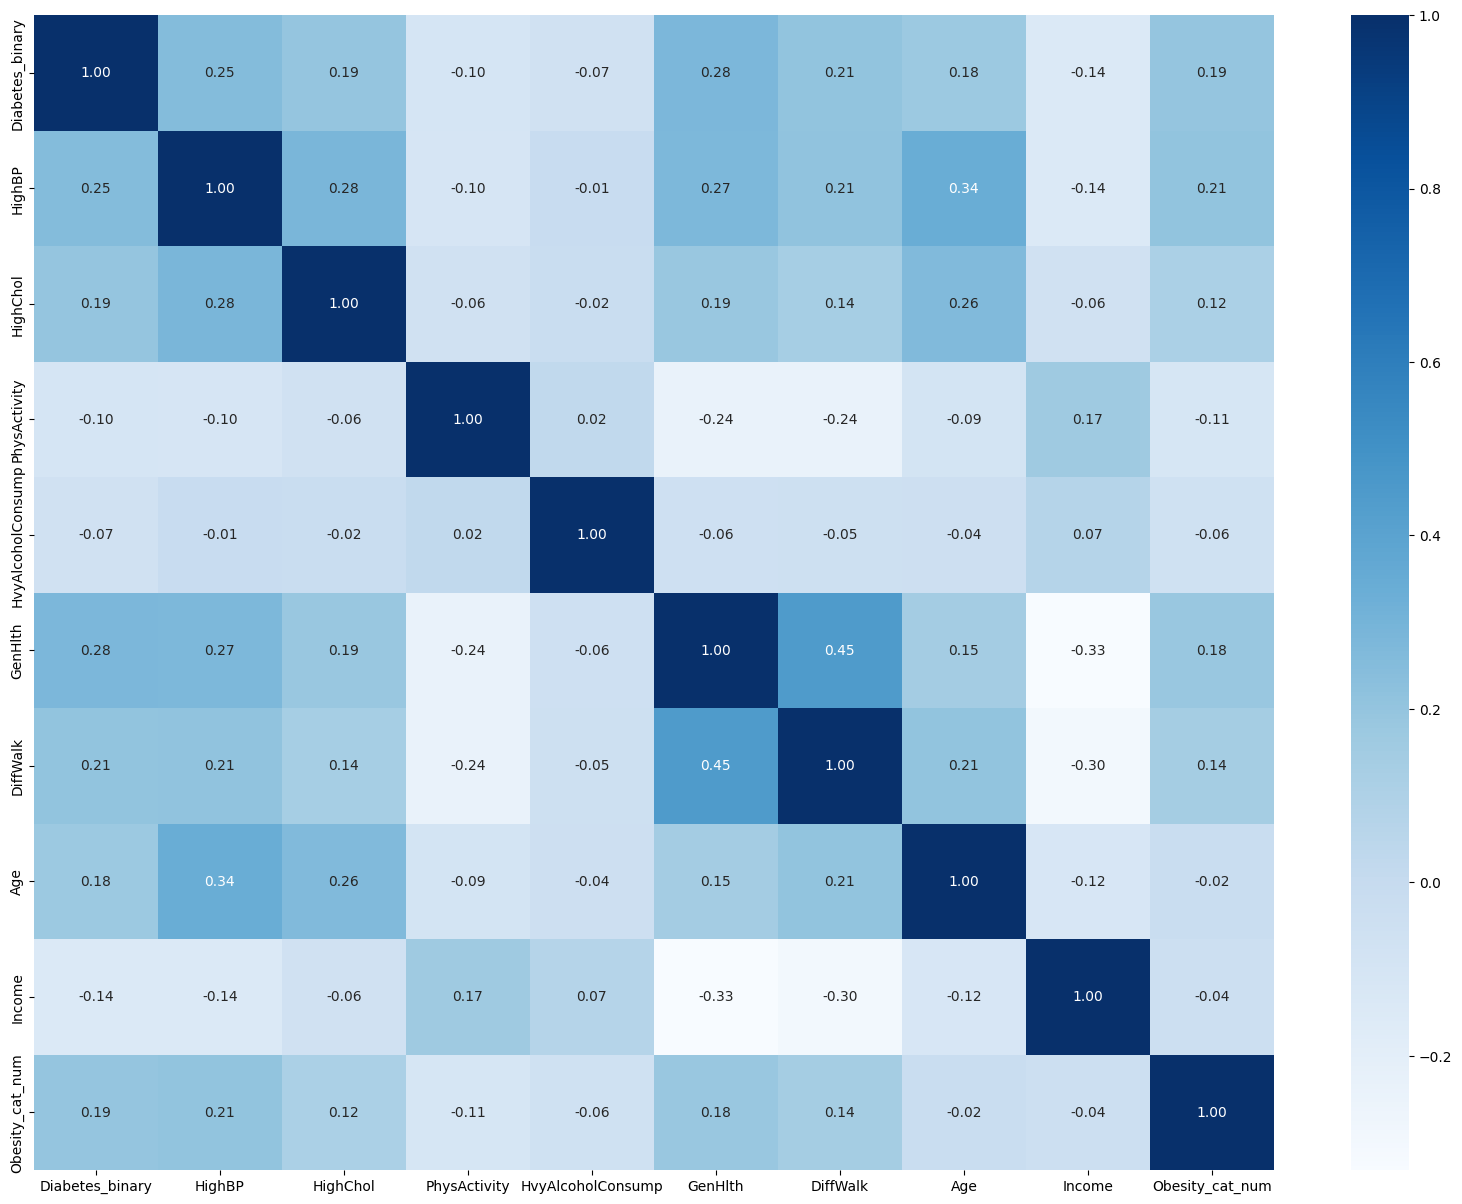

In [700]:
plt.figure(figsize=(20,15))
sns.heatmap(final_corr_mat, annot=True, fmt='.2f', cmap='Blues')

(-1.0, 1.0)

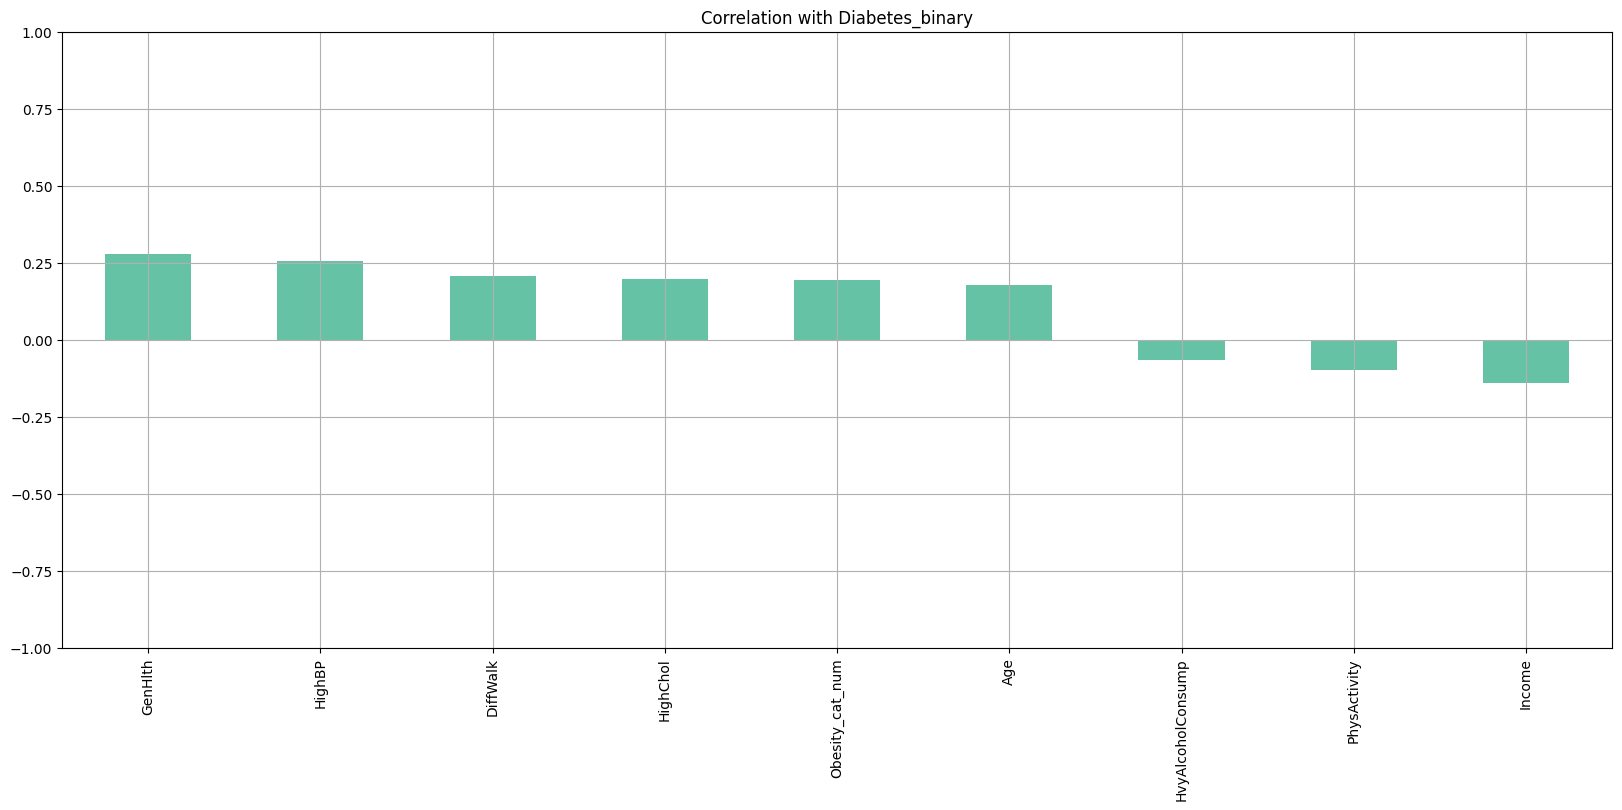

In [701]:
final_vars = ['HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num']

df_diabetes_binary[final_vars].corrwith(df_diabetes_binary.Diabetes_binary).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary")
plt.ylim(-1, 1)

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

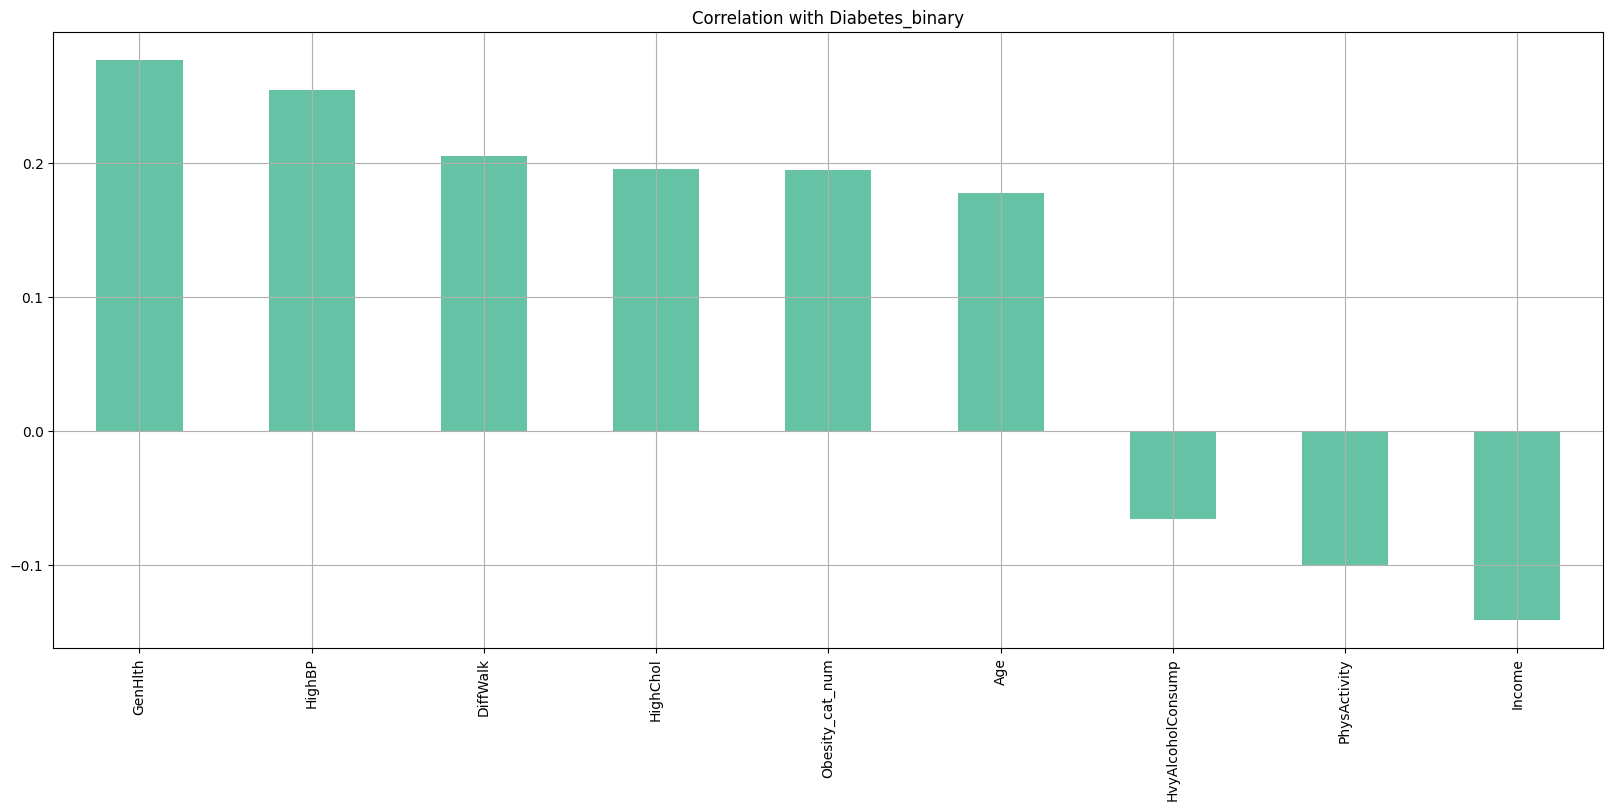

In [702]:
df_diabetes_binary[final_vars].corrwith(df_diabetes_binary.Diabetes_binary).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary")


In [703]:
final_vars_w_diab = ['HighBP', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'Obesity_cat_num', 'Diabetes_binary']


## 5. EDA (Extra)

In [704]:
pd.pivot_table(df_diabetes_binary[final_vars_w_diab], values='Diabetes_binary', index='Obesity_cat_num', columns=['HighBP', 'HighChol', 'DiffWalk', ])

HighBP                  0                                       1            \
HighChol                0                   1                   0             
DiffWalk                0         1         0         1         0         1   
Obesity_cat_num                                                               
0                0.014393  0.048387  0.054441  0.098901  0.071197  0.076923   
1                0.022678  0.066029  0.054978  0.113677  0.079097  0.149254   
2                0.039531  0.109387  0.088729  0.196213  0.126933  0.235521   
3                0.069848  0.191257  0.142168  0.295164  0.195949  0.329791   

HighBP                               
HighChol                1            
DiffWalk                0         1  
Obesity_cat_num                      
0                0.107914  0.244681  
1                0.146316  0.254335  
2                0.215286  0.348092  
3                0.334389  0.504891

In [705]:
pd.pivot_table(df_diabetes_binary[final_vars_w_diab], values='Diabetes_binary', index='Obesity_cat_num', columns=['HighBP', 'HighChol'])

HighBP                  0                   1          
HighChol                0         1         0         1
Obesity_cat_num                                        
0                0.019332  0.063636  0.072893  0.163090
1                0.025698  0.061244  0.092235  0.172314
2                0.045272  0.101775  0.146604  0.247621
3                0.086705  0.173712  0.233462  0.398887

In [706]:
highbp_order = ['No High BP', 'HighBP']

In [707]:
df_diabetes_binary['HighBP'].sort_values(ascending= False, key=lambda x: pd.Categorical(x, categories=highbp_order))

0         1
1         0
2         1
3         1
4         1
         ..
229469    1
229470    1
229471    0
229472    1
229473    1
Name: HighBP, Length: 229474, dtype: int64

Text(0.5, 1.0, 'Ratio of Diabetes by Obesity-HighBP-HighChol')

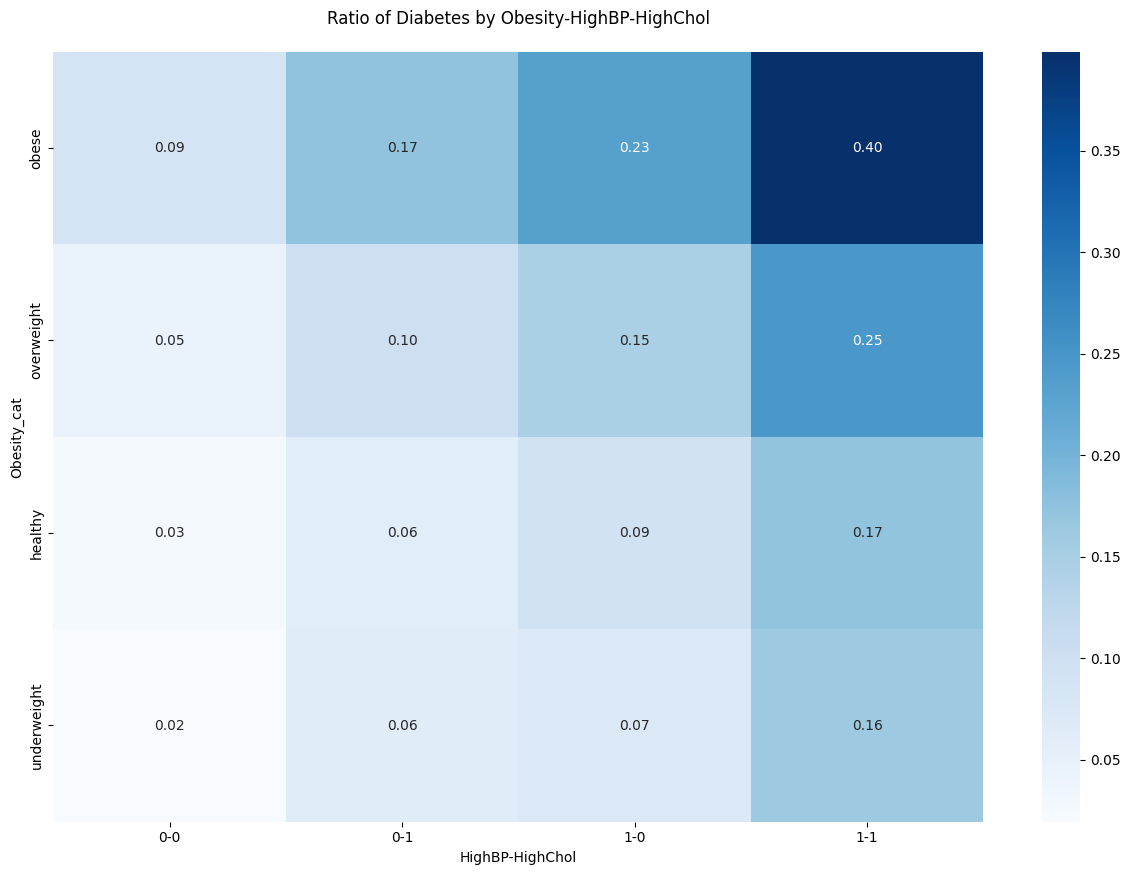

In [708]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.pivot_table(df_diabetes_binary[['Diabetes_binary', 'Obesity_cat', 'HighBP', 'HighChol']], values='Diabetes_binary', index='Obesity_cat', columns=['HighBP', 'HighChol']).sort_index(ascending=False, key=lambda x: pd.Categorical(x, categories=obese_order_list)), annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetes by Obesity-HighBP-HighChol', pad=20)

Text(0.5, 1.0, 'Ratio of Diabetes by Obesity-PhysActivity-DiffWalk')

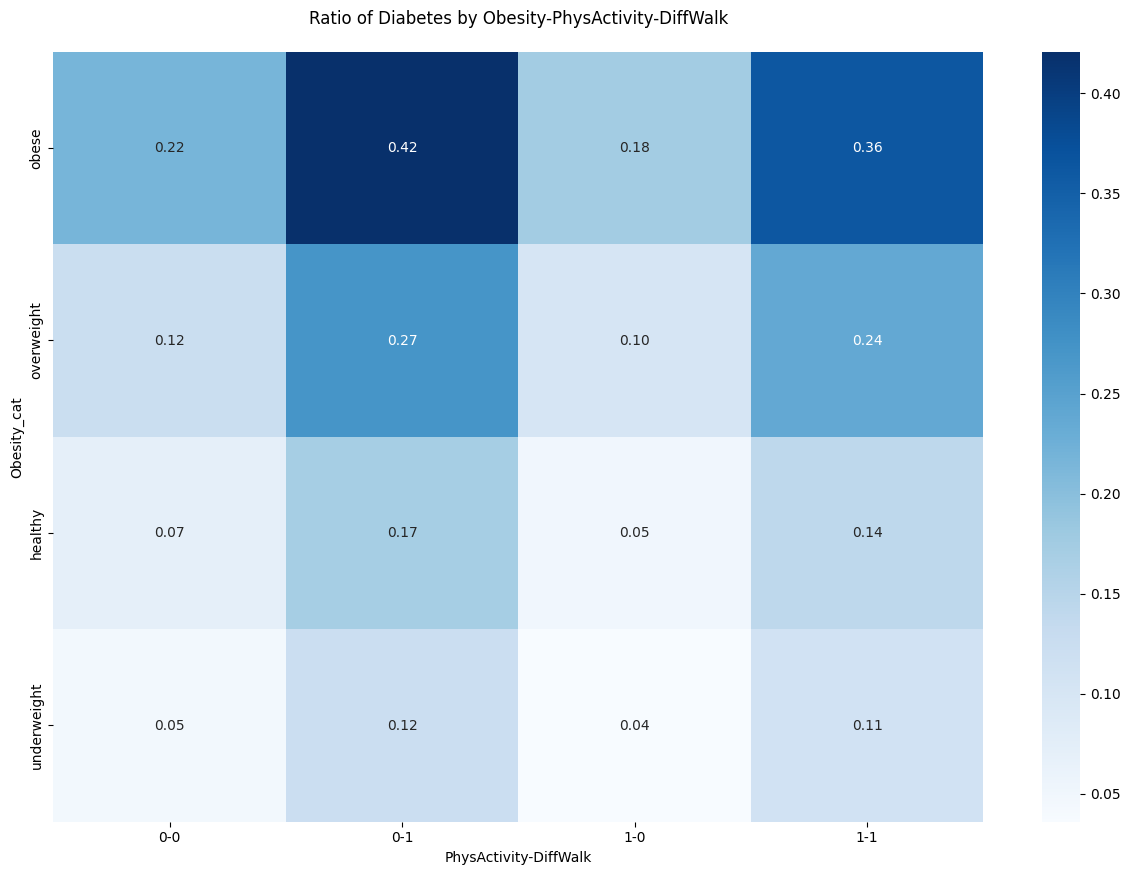

In [709]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.pivot_table(df_diabetes_binary[['Diabetes_binary', 'Obesity_cat', 'PhysActivity', 'DiffWalk']], values='Diabetes_binary', index='Obesity_cat', columns=['PhysActivity', 'DiffWalk']).sort_index(ascending=False, key=lambda x: pd.Categorical(x, categories=obese_order_list)), annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetes by Obesity-PhysActivity-DiffWalk', pad=20)


<Axes: xlabel='Obesity_cat', ylabel='count'>

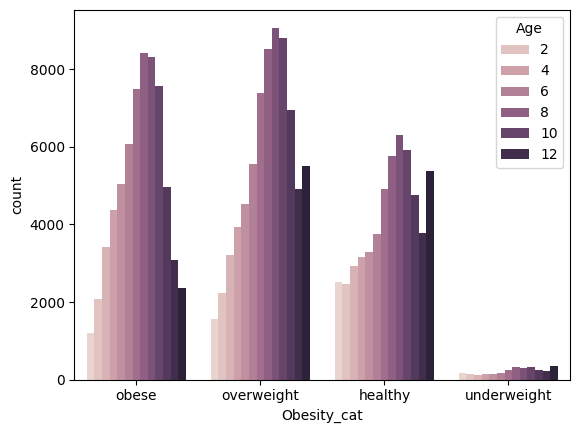

In [710]:
sns.countplot(data = df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='Obesity_cat', hue = 'Age')

<Axes: xlabel='Obesity_cat', ylabel='count'>

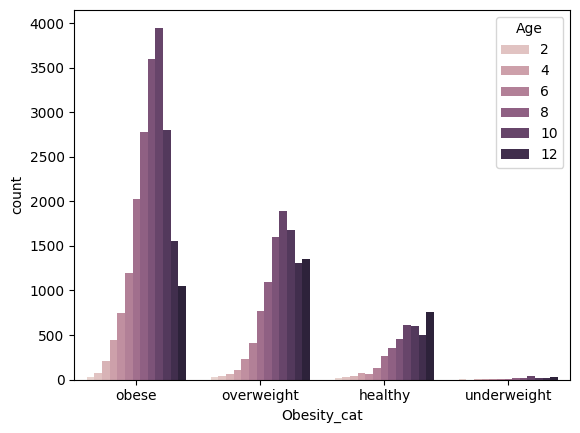

In [711]:
sns.countplot(data = df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='Obesity_cat', hue = 'Age')

In [712]:
pd.pivot_table(df_diabetes_binary, index='Obesity_cat', columns=['Age_in_10s'], values='Diabetes_binary')

Age_in_10s          1         2         3         4         5         6  \
Obesity_cat                                                               
healthy      0.008761  0.018202  0.027165  0.054775  0.080609  0.115129   
obese        0.032087  0.077096  0.148679  0.231954  0.321968  0.350887   
overweight   0.016658  0.022858  0.059763  0.104813  0.163439  0.200782   
underweight  0.003185  0.024911  0.039474  0.043178  0.080292  0.069767   

Age_in_10s          7  
Obesity_cat            
healthy      0.123392  
obese        0.308845  
overweight   0.197614  
underweight  0.088472

Text(0.5, 1.0, 'Ratio of Diabetes by Obesity-Age')

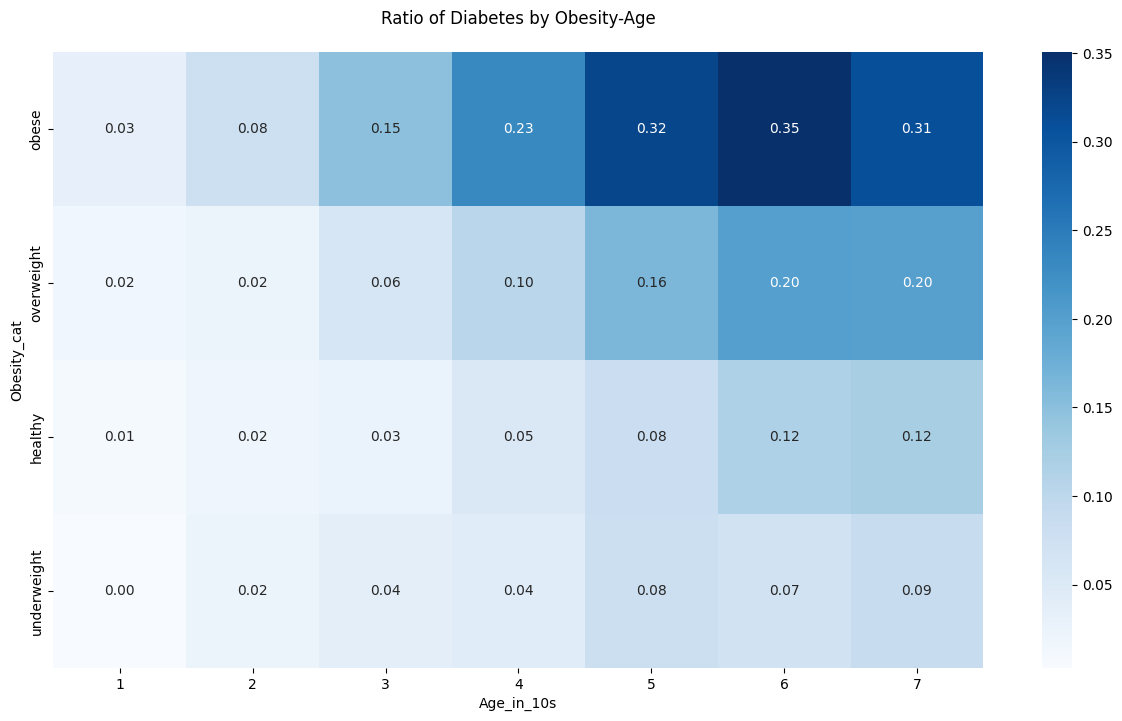

In [713]:
obese_order_list = ['underweight', 'healthy', 'overweight', 'obese']

plt.figure(figsize=(15,8))
sns.heatmap(pd.pivot_table(df_diabetes_binary, index='Obesity_cat', columns=['Age_in_10s'], values='Diabetes_binary')\
    .sort_index(ascending=False, key=lambda x: pd.Categorical(x, categories=obese_order_list)), annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetes by Obesity-Age', pad=20)


In [714]:
obese_order_list = ['underweight', 'healthy', 'overweight', 'obese', 'obese_middle', 'obese_severe']

def cat_obesity_new(bmi) : 
    if bmi >= 40 : 
        return 'obese_severe'
    elif bmi >=35:
        return 'obese_middle'
    elif bmi >= 30:
        return 'obese'
    elif bmi >= 25:
        return 'overweight'
    elif bmi >= 18.5 : 
        return 'healthy'
    else :
        return 'underweight'
    
df_diabetes_binary['Obesity_cat_new'] = df_diabetes_binary['BMI'].apply(cat_obesity_new)

Text(0.5, 1.0, 'Obesity Distribution of All Subjects')

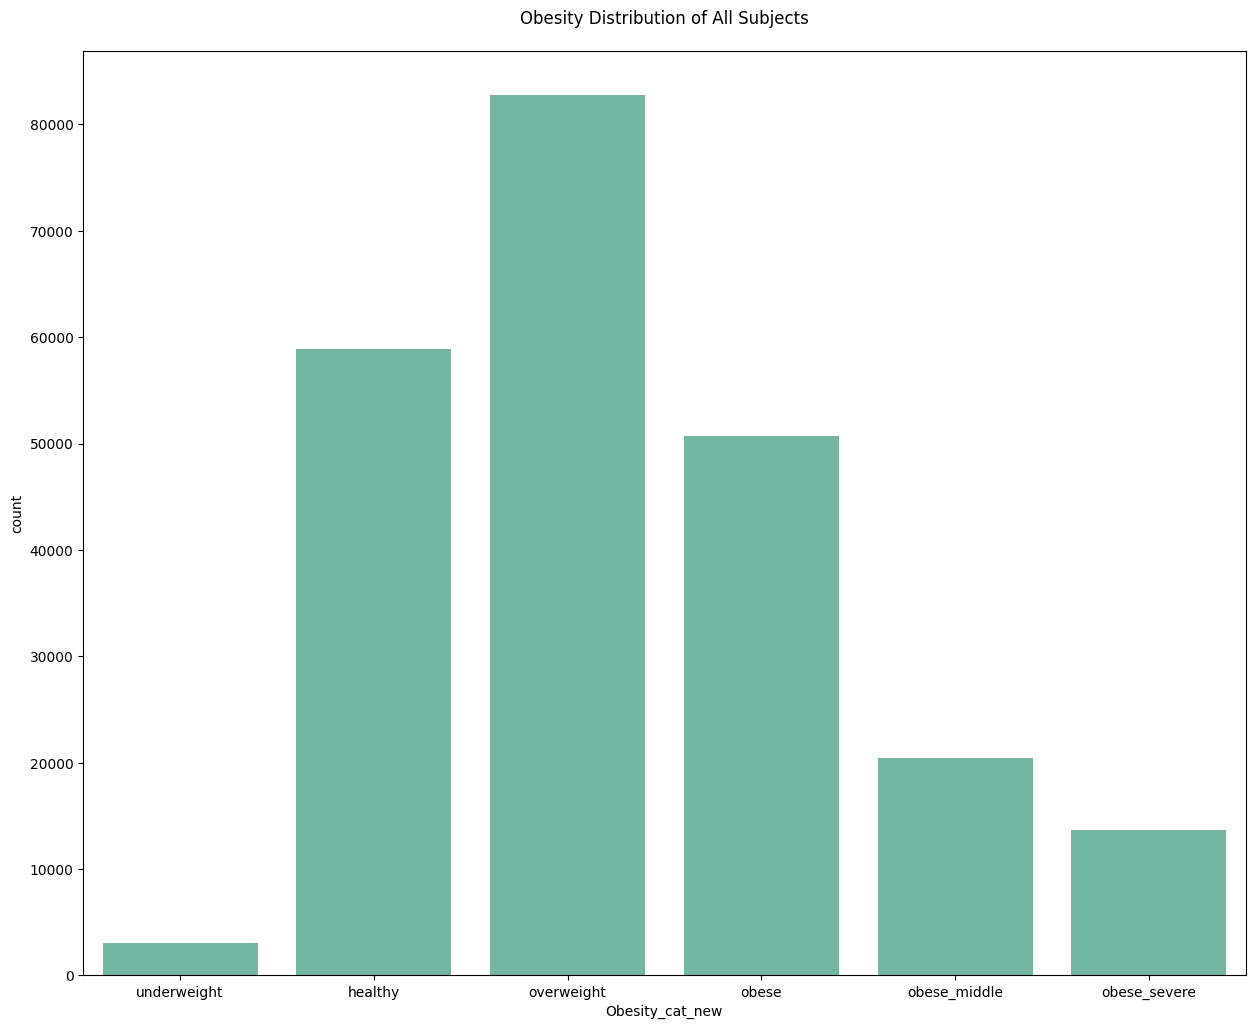

In [715]:
plt.figure(figsize=(15, 12))
sns.countplot(df_diabetes_binary, x='Obesity_cat_new', order=obese_order_list)
plt.title('Obesity Distribution of All Subjects', pad=20)

Text(0.5, 1.0, 'Obesity Distribution of Non-Diabetic Subjects')

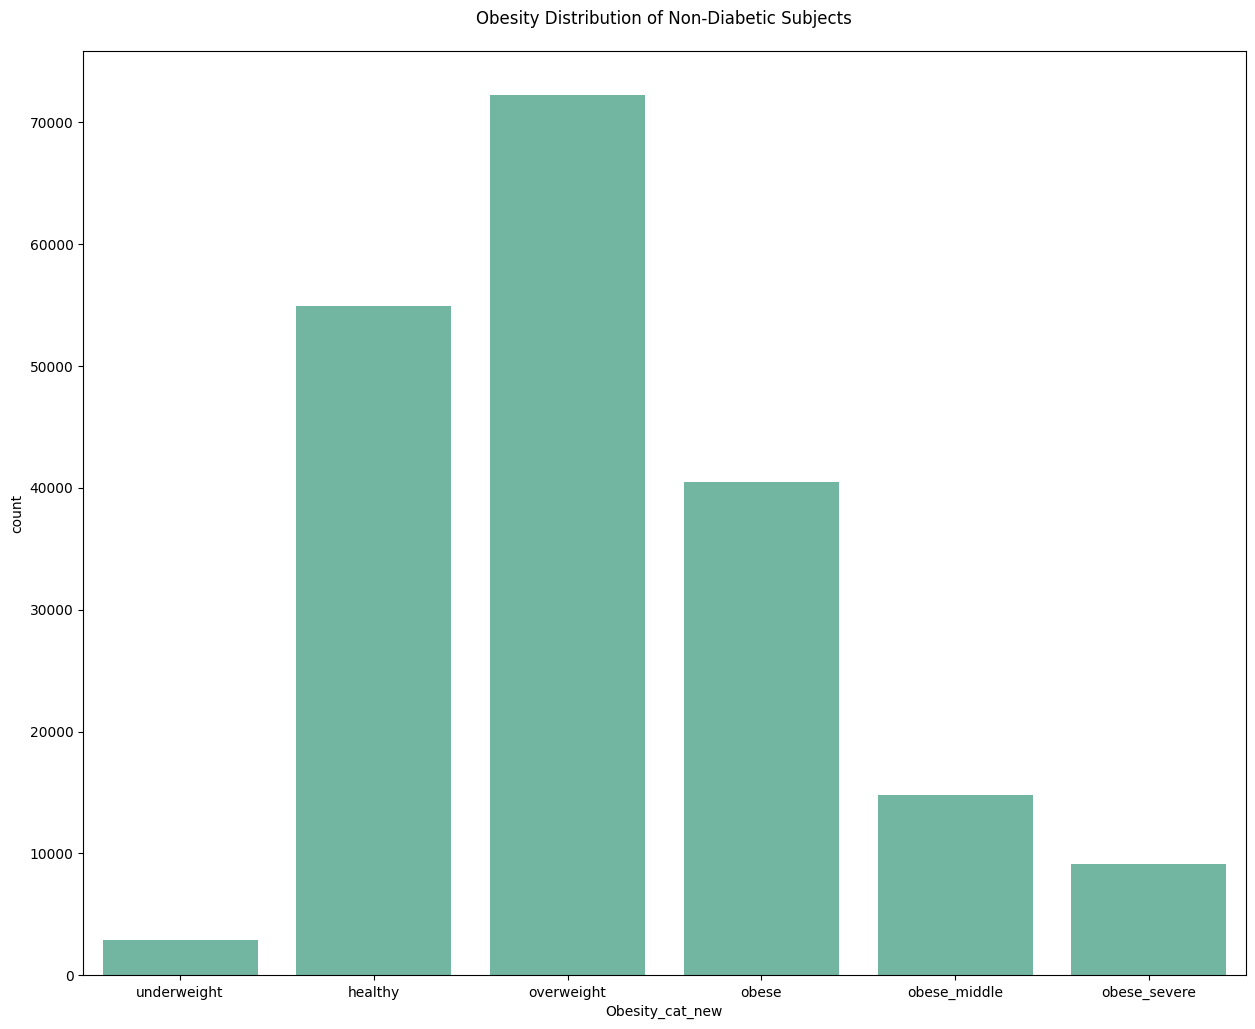

In [716]:
plt.figure(figsize=(15, 12))
sns.countplot(df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0], x='Obesity_cat_new', order=obese_order_list)
plt.title('Obesity Distribution of Non-Diabetic Subjects', pad=20)

Text(0.5, 1.0, 'Obesity Distribution of Diabetic Subjects')

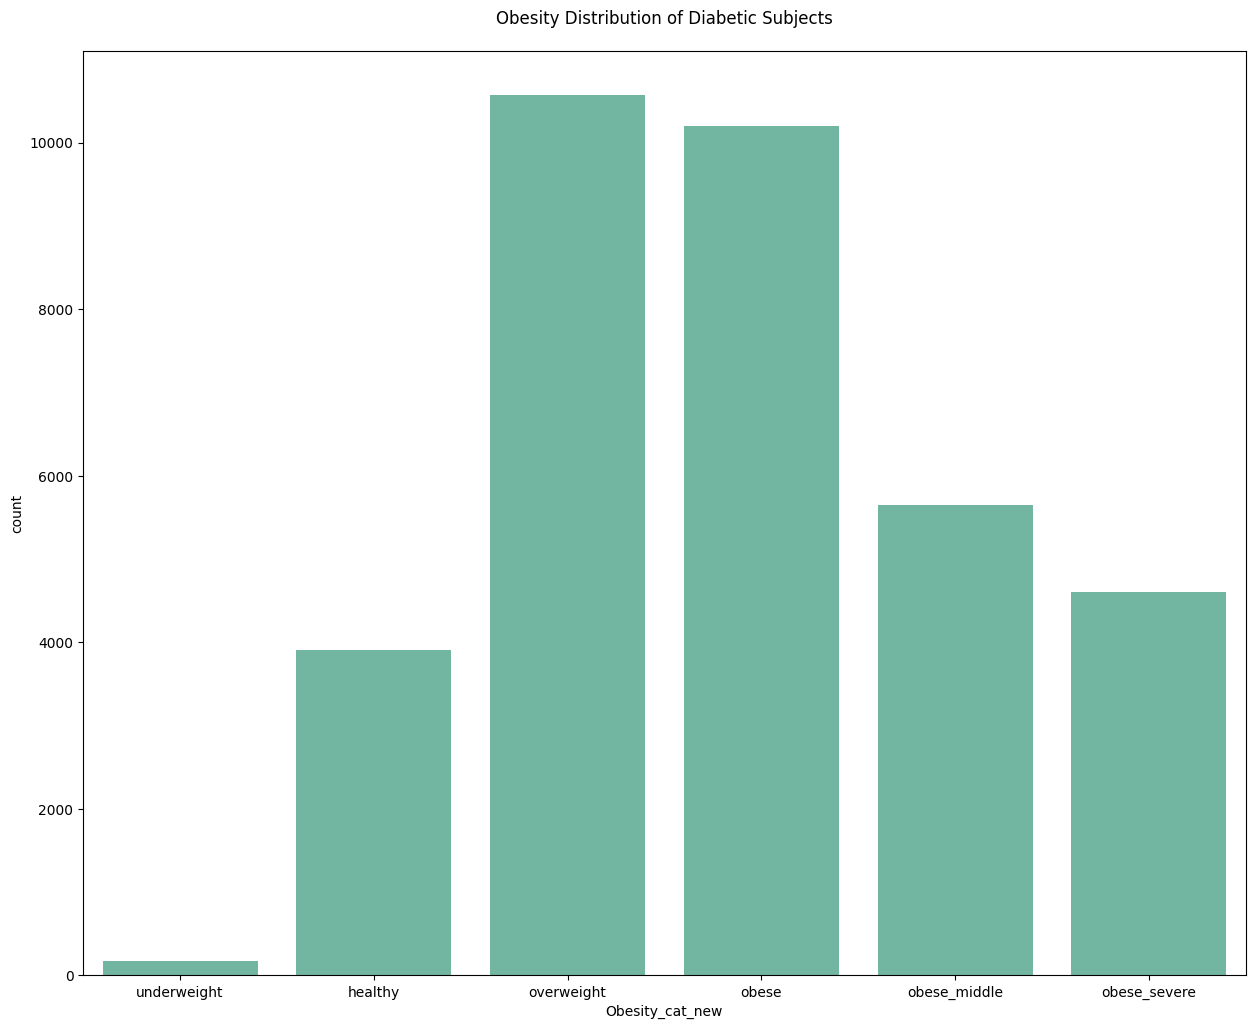

In [717]:
plt.figure(figsize=(15, 12))
sns.countplot(df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1], x='Obesity_cat_new', order=obese_order_list)
plt.title('Obesity Distribution of Diabetic Subjects', pad=20)

Text(0.5, 1.0, 'Ratio of Diabetes by Obesity-Age')

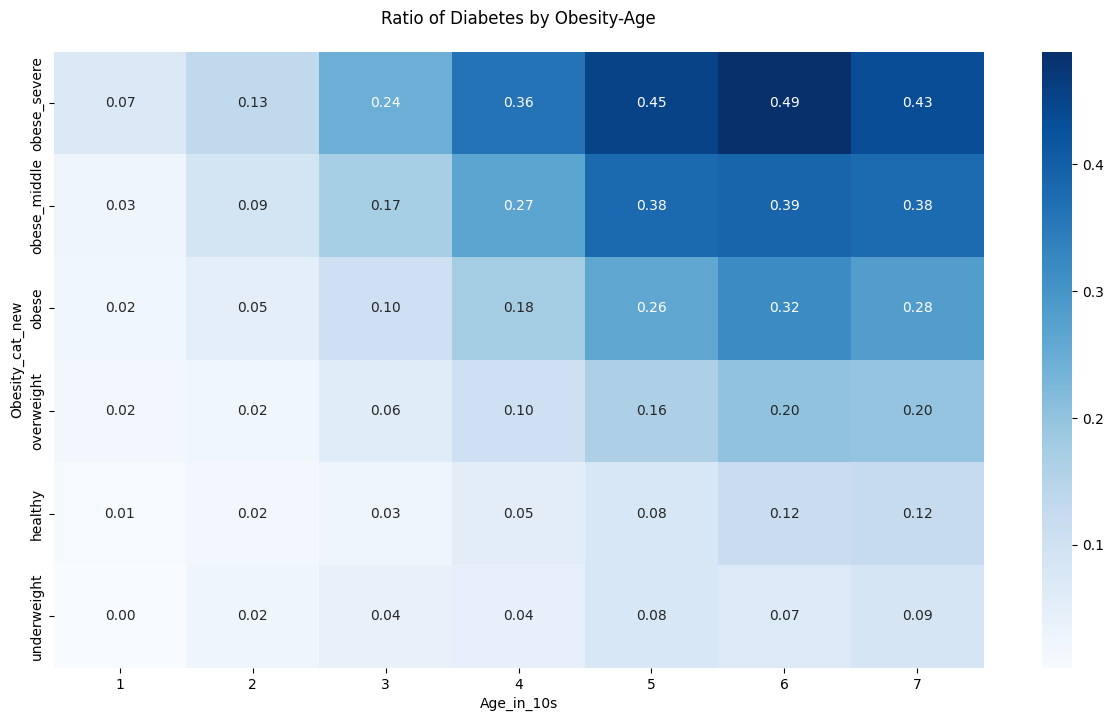

In [719]:
obese_order_list = ['underweight', 'healthy', 'overweight', 'obese', 'obese_middle', 'obese_severe']

plt.figure(figsize=(15,8))
sns.heatmap(pd.pivot_table(df_diabetes_binary, index='Obesity_cat_new', columns=['Age_in_10s'], values='Diabetes_binary')\
    .sort_index(ascending=False, key=lambda x: pd.Categorical(x, categories=obese_order_list)), annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetes by Obesity-Age', pad=20)


Text(0.5, 1.0, 'Ratio of Diabetes by Obesity-Age')

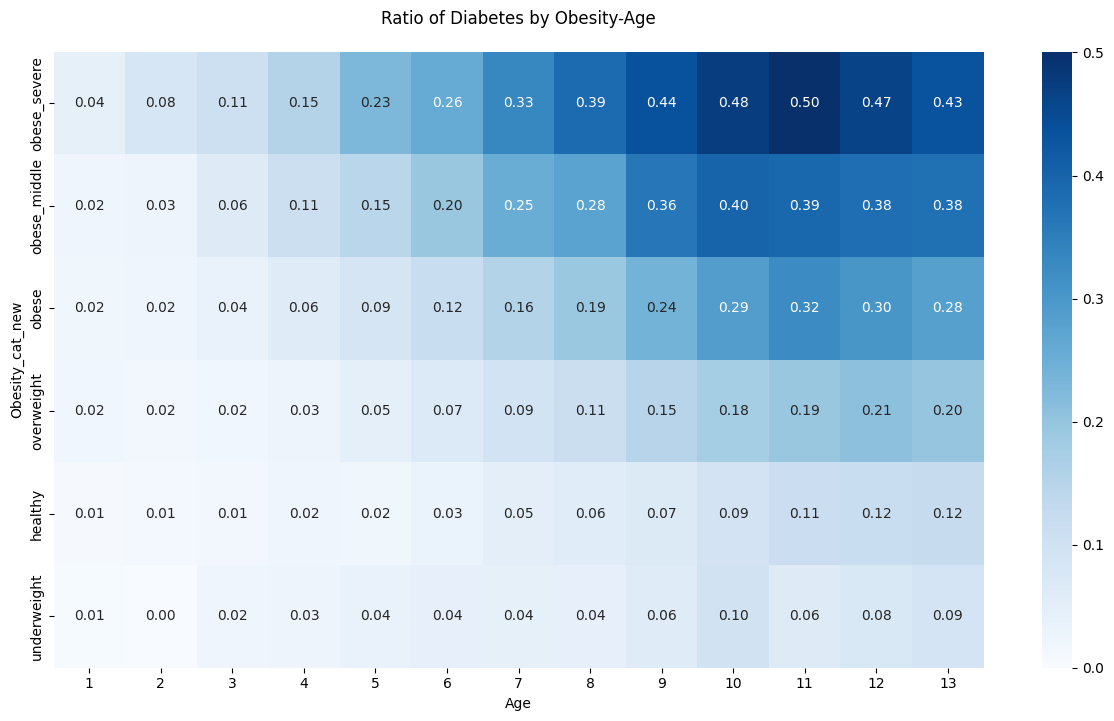

In [720]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.pivot_table(df_diabetes_binary, index='Obesity_cat_new', columns=['Age'], values='Diabetes_binary')\
    .sort_index(ascending=False, key=lambda x: pd.Categorical(x, categories=obese_order_list)), annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetes by Obesity-Age', pad=20)


Text(0.5, 1.0, 'Ratio of Diabetes by Obesity-Age')

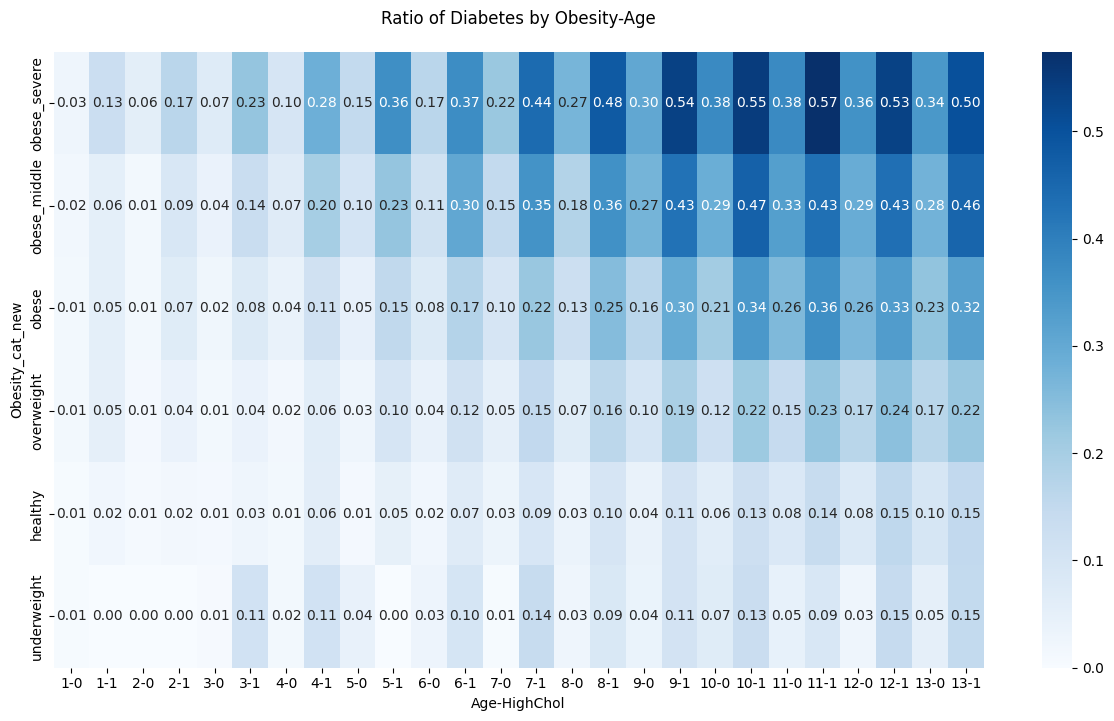

In [721]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.pivot_table(df_diabetes_binary, index='Obesity_cat_new', columns=['Age', 'HighChol'], values='Diabetes_binary')\
    .sort_index(ascending=False, key=lambda x: pd.Categorical(x, categories=obese_order_list)), annot=True, fmt='.2f', cmap='Blues')
plt.title('Ratio of Diabetes by Obesity-Age', pad=20)


<Axes: >

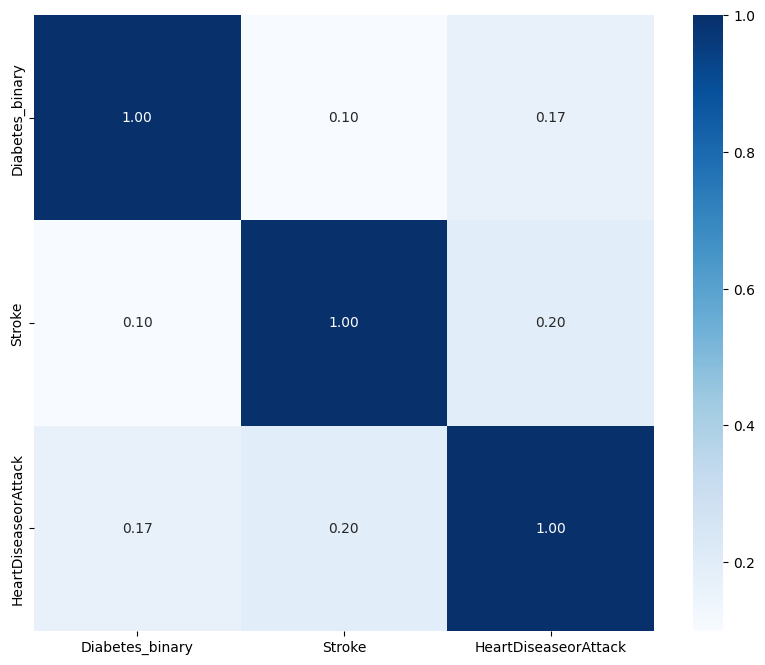

In [723]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_diabetes_binary[['Diabetes_binary', 'Stroke', 'HeartDiseaseorAttack']].corr(), annot=True, fmt='.2f', cmap='Blues')